In [ ]:
# Contains Dynamic Model
# Making Predictions in format of table, Confusion Matrices, and Prediction Graphs and Gifs

# Commented Stuff Data transformation for dynamic model

In [1]:
import fastf1 as f1
from pyergast import pyergast 

import pandas as pd
import numpy as np
import os 

from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder
import tensorflow 
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

from datetime import datetime
import time 

f1.Cache.enable_cache('H:\cache\cache')

In [176]:
# GET THE CURRENT POSITION

# driver_positions = {}
# for year in range(2018,2022):
#     season = pyergast.get_schedule(year)
#     time.sleep(5)
#     driver_positions[year] = {}
#     print("Year: ", year)

#     for index, race in season.iterrows():

#         round_number = int(race["round"])
#         total_laps = int(list(pyergast.get_race_result(year,round_number)["laps"])[0])
#         print("\nCurrent round: ", round_number)
#         print("Current race: ", race["raceName"])
#         time.sleep(5)

#         current_race = f1.get_session(year,round_number,"R")
#         current_laps = current_race.load_laps()
#         time.sleep(5)

#         driver_positions[year][round_number] = {}

#         for lap in range(total_laps+1):

#             df = list(current_laps[current_laps["LapNumber"]==lap]["LapStartTime"].apply(lambda x:x.to_pytimedelta().total_seconds()))
#             drivers = list(current_laps[current_laps["LapNumber"]==lap]["DriverNumber"])



#             sorted_list = sorted(range(len(df)), key=lambda k: df[k])


#             driver_positions[year][round_number][lap] = {}

#             for i in sorted_list:
#                 driver_positions[year][round_number][lap][drivers[sorted_list[i]]] = i+1

    
    
# # def get_current_position(x):
    
# #     year = x["Year"]
# #     round_number = x["Round Number"]
# #     driver_number = str(x["Driver Name"])
# #     current_lap = x["Lap"]
    
# # #     print(year)
# # #     print(round_number)
# # #     print(driver_number)
# # #     print(current_lap)
    
    
# #     try:
# #         current_position = driver_positions[year][round_number][current_lap][driver_number]
# #     except:
# #         return x["Finish Position"]
    
# #     return current_position

Year:  2018

Current round:  1
Current race:  Australian Grand Prix


core           INFO 	Loading laps for Australian Grand Prix - Race [v2.1.13]
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for weather_data
core           INFO 	Loaded data for 20 drivers: ['44', '7', '5', '33', '20', '8', '27', '3', '55', '14', '2', '11', '18', '31', '77', '28', '9', '16', '35', '10']



Current round:  2
Current race:  Bahrain Grand Prix


core           INFO 	Loading laps for Bahrain Grand Prix - Race [v2.1.13]
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for weather_data
core           INFO 	Loaded data for 20 drivers: ['5', '7', '77', '3', '10', '20', '27', '31', '44', '55', '28', '11', '14', '2', '33', '8', '9', '35', '16', '18']



Current round:  3
Current race:  Chinese Grand Prix


core           INFO 	Loading laps for Chinese Grand Prix - Race [v2.1.13]
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for weather_data
core           INFO 	Loaded data for 20 drivers: ['5', '7', '77', '44', '33', '3', '27', '11', '55', '8', '20', '31', '14', '2', '28', '35', '10', '18', '16', '9']



Current round:  4
Current race:  Azerbaijan Grand Prix


core           INFO 	Loading laps for Azerbaijan Grand Prix - Race [v2.1.13]
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
core        WARNING 	Driver 55: Lap timing integrity check failed for 1 lap(s)
api            INFO 	Using cached data for weather_data
core           INFO 	Loaded data for 20 drivers: ['5', '44', '77', '3', '33', '7', '31', '11', '55', '18', '35', '14', '16', '27', '20', '2', '10', '9', '28', '8']



Current round:  5
Current race:  Spanish Grand Prix


core           INFO 	Loading laps for Spanish Grand Prix - Race [v2.1.13]
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for weather_data
core           INFO 	Loaded data for 20 drivers: ['44', '77', '5', '7', '33', '3', '20', '14', '55', '8', '2', '10', '31', '16', '11', '27', '9', '18', '35', '28']



Current round:  6
Current race:  Monaco Grand Prix


core           INFO 	Loading laps for Monaco Grand Prix - Race [v2.1.13]
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for weather_data
core           INFO 	Loaded data for 20 drivers: ['3', '5', '44', '7', '77', '31', '14', '55', '11', '10', '27', '2', '35', '16', '28', '9', '18', '8', '20', '33']



Current round:  7
Current race:  Canadian Grand Prix


core           INFO 	Loading laps for Canadian Grand Prix - Race [v2.1.13]
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for weather_data
core           INFO 	Loaded data for 20 drivers: ['5', '77', '33', '44', '7', '3', '27', '31', '55', '11', '20', '28', '16', '14', '2', '18', '35', '9', '10', '8']



Current round:  8
Current race:  French Grand Prix


core           INFO 	Loading laps for French Grand Prix - Race [v2.1.13]
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for weather_data
core           INFO 	Loaded data for 20 drivers: ['44', '77', '5', '33', '3', '7', '55', '16', '20', '8', '31', '27', '11', '10', '9', '14', '2', '35', '18', '28']



Current round:  9
Current race:  Austrian Grand Prix


core           INFO 	Loading laps for Austrian Grand Prix - Race [v2.1.13]
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for weather_data
core           INFO 	Loaded data for 20 drivers: ['77', '44', '7', '33', '8', '5', '3', '20', '55', '27', '31', '10', '18', '2', '11', '35', '16', '9', '28', '14']



Current round:  10
Current race:  British Grand Prix


core           INFO 	Loading laps for British Grand Prix - Race [v2.1.13]
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
core        WARNING 	Driver  2: Lap timing integrity check failed for 1 lap(s)
api            INFO 	Using cached data for weather_data
core           INFO 	Loaded data for 20 drivers: ['44', '5', '7', '77', '33', '3', '20', '8', '16', '31', '27', '11', '14', '10', '9', '55', '2', '35', '18', '28']



Current round:  11
Current race:  German Grand Prix


core           INFO 	Loading laps for German Grand Prix - Race [v2.1.13]
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for weather_data
core           INFO 	Loaded data for 20 drivers: ['5', '77', '7', '33', '20', '8', '27', '55', '16', '11', '14', '35', '9', '44', '31', '28', '18', '2', '3', '10']



Current round:  12
Current race:  Hungarian Grand Prix


core           INFO 	Loading laps for Hungarian Grand Prix - Race [v2.1.13]
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for weather_data
core           INFO 	Loaded data for 20 drivers: ['44', '77', '7', '5', '55', '10', '33', '28', '20', '8', '14', '3', '27', '9', '2', '16', '31', '11', '35', '18']



Current round:  13
Current race:  Belgian Grand Prix


core           INFO 	Loading laps for Belgian Grand Prix - Race [v2.1.13]
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for weather_data
core           INFO 	Loaded data for 20 drivers: ['44', '5', '31', '11', '8', '7', '33', '3', '20', '10', '28', '16', '9', '14', '35', '18', '77', '27', '55', '2']



Current round:  14
Current race:  Italian Grand Prix


core           INFO 	Loading laps for Italian Grand Prix - Race [v2.1.13]
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for weather_data
core           INFO 	Loaded data for 20 drivers: ['7', '5', '44', '77', '33', '8', '55', '31', '10', '18', '20', '35', '14', '11', '16', '28', '2', '9', '3', '27']



Current round:  15
Current race:  Singapore Grand Prix


core           INFO 	Loading laps for Singapore Grand Prix - Race [v2.1.13]
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for weather_data
core           INFO 	Loaded data for 20 drivers: ['44', '33', '5', '77', '7', '3', '11', '8', '31', '27', '14', '55', '16', '9', '10', '20', '28', '2', '35', '18']



Current round:  16
Current race:  Russian Grand Prix


core           INFO 	Loading laps for Russian Grand Prix - Race [v2.1.13]
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for weather_data
core           INFO 	Loaded data for 20 drivers: ['77', '44', '5', '7', '20', '31', '16', '11', '8', '9', '55', '27', '35', '18', '2', '14', '10', '3', '33', '28']



Current round:  17
Current race:  Japanese Grand Prix


core           INFO 	Loading laps for Japanese Grand Prix - Race [v2.1.13]
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for weather_data
core           INFO 	Loaded data for 20 drivers: ['44', '77', '33', '7', '8', '28', '10', '5', '11', '16', '31', '20', '55', '18', '3', '27', '35', '14', '2', '9']



Current round:  18
Current race:  United States Grand Prix


core           INFO 	Loading laps for United States Grand Prix - Race [v2.1.13]
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for weather_data
core           INFO 	Loaded data for 20 drivers: ['44', '7', '77', '3', '5', '31', '27', '8', '16', '11', '55', '20', '14', '35', '18', '9', '2', '33', '10', '28']



Current round:  19
Current race:  Mexican Grand Prix


core           INFO 	Loading laps for Mexican Grand Prix - Race [v2.1.13]
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for weather_data
core           INFO 	Loaded data for 20 drivers: ['3', '33', '44', '5', '77', '7', '27', '55', '16', '9', '31', '14', '11', '28', '2', '20', '18', '8', '35', '10']



Current round:  20
Current race:  Brazilian Grand Prix


core           INFO 	Loading laps for Brazilian Grand Prix - Race [v2.1.13]
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for weather_data
core           INFO 	Loaded data for 20 drivers: ['44', '5', '77', '7', '33', '9', '16', '8', '10', '20', '3', '11', '27', '35', '55', '28', '14', '31', '18', '2']



Current round:  21
Current race:  Abu Dhabi Grand Prix


core           INFO 	Loading laps for Abu Dhabi Grand Prix - Race [v2.1.13]
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for weather_data
core           INFO 	Loaded data for 20 drivers: ['44', '77', '5', '7', '3', '33', '8', '16', '31', '27', '55', '9', '20', '11', '14', '28', '10', '2', '35', '18']


Year:  2019

Current round:  1
Current race:  Australian Grand Prix


core           INFO 	Loading laps for Australian Grand Prix - Race [v2.1.13]
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for weather_data
core           INFO 	Loaded data for 20 drivers: ['44', '77', '5', '33', '16', '8', '20', '4', '7', '11', '27', '3', '23', '99', '26', '18', '10', '55', '63', '88']



Current round:  2
Current race:  Bahrain Grand Prix


core           INFO 	Loading laps for Bahrain Grand Prix - Race [v2.1.13]
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for weather_data
core           INFO 	Loaded data for 20 drivers: ['16', '5', '44', '77', '33', '20', '55', '7', '4', '3', '8', '23', '10', '11', '26', '99', '27', '18', '63', '88']



Current round:  3
Current race:  Chinese Grand Prix


core           INFO 	Loading laps for Chinese Grand Prix - Race [v2.1.13]
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for weather_data
core           INFO 	Loaded data for 20 drivers: ['77', '44', '5', '16', '33', '10', '3', '27', '20', '8', '26', '11', '7', '55', '4', '18', '63', '88', '99', '23']



Current round:  4
Current race:  Azerbaijan Grand Prix


core           INFO 	Loading laps for Azerbaijan Grand Prix - Race [v2.1.13]
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for weather_data
core           INFO 	Loaded data for 20 drivers: ['77', '44', '5', '33', '11', '26', '4', '16', '55', '3', '23', '20', '18', '8', '27', '63', '99', '88', '7', '10']



Current round:  5
Current race:  Spanish Grand Prix


core           INFO 	Loading laps for Spanish Grand Prix - Race [v2.1.13]
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for weather_data
core           INFO 	Loaded data for 20 drivers: ['77', '44', '5', '33', '16', '10', '8', '20', '26', '4', '23', '55', '3', '7', '11', '18', '88', '99', '63', '27']



Current round:  6
Current race:  Monaco Grand Prix


core           INFO 	Loading laps for Monaco Grand Prix - Race [v2.1.13]
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for weather_data
core           INFO 	Loaded data for 20 drivers: ['44', '77', '33', '5', '20', '3', '26', '10', '55', '23', '27', '4', '8', '7', '16', '11', '18', '99', '63', '88']



Current round:  7
Current race:  Canadian Grand Prix


core           INFO 	Loading laps for Canadian Grand Prix - Race [v2.1.13]
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for weather_data
core           INFO 	Loaded data for 20 drivers: ['5', '44', '16', '3', '10', '77', '27', '4', '33', '26', '55', '99', '23', '8', '11', '7', '18', '63', '88', '20']



Current round:  8
Current race:  French Grand Prix


core           INFO 	Loading laps for French Grand Prix - Race [v2.1.13]
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for weather_data
core           INFO 	Loaded data for 20 drivers: ['44', '77', '16', '33', '4', '55', '5', '3', '10', '99', '23', '7', '27', '11', '20', '8', '18', '88', '26', '63']



Current round:  9
Current race:  Austrian Grand Prix


core           INFO 	Loading laps for Austrian Grand Prix - Race [v2.1.13]
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for weather_data
core           INFO 	Loaded data for 20 drivers: ['16', '33', '77', '44', '4', '7', '99', '10', '5', '20', '8', '3', '11', '18', '27', '26', '88', '23', '55', '63']



Current round:  10
Current race:  British Grand Prix


core           INFO 	Loading laps for British Grand Prix - Race [v2.1.13]
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for weather_data
core           INFO 	Loaded data for 20 drivers: ['77', '44', '16', '33', '10', '5', '3', '4', '23', '27', '99', '7', '55', '8', '11', '20', '26', '18', '63', '88']



Current round:  11
Current race:  German Grand Prix


core           INFO 	Loading laps for German Grand Prix - Race [v2.1.13]
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for weather_data
core           INFO 	Loaded data for 20 drivers: ['44', '33', '77', '10', '7', '8', '55', '11', '27', '16', '99', '20', '3', '26', '18', '23', '63', '88', '4', '5']



Current round:  12
Current race:  Hungarian Grand Prix


core           INFO 	Loading laps for Hungarian Grand Prix - Race [v2.1.13]
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for weather_data
core           INFO 	Loaded data for 20 drivers: ['33', '77', '44', '16', '5', '10', '4', '55', '8', '7', '27', '23', '26', '20', '63', '11', '99', '18', '88', '3']



Current round:  13
Current race:  Belgian Grand Prix


core           INFO 	Loading laps for Belgian Grand Prix - Race [v2.1.13]
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for weather_data
core           INFO 	Loaded data for 20 drivers: ['16', '5', '44', '77', '33', '7', '11', '20', '8', '3', '4', '27', '10', '63', '55', '18', '23', '99', '26', '88']



Current round:  14
Current race:  Italian Grand Prix


core           INFO 	Loading laps for Italian Grand Prix - Race [v2.1.13]
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for weather_data
core           INFO 	Loaded data for 20 drivers: ['16', '44', '77', '5', '3', '27', '55', '23', '18', '99', '20', '26', '8', '63', '88', '4', '10', '11', '33', '7']



Current round:  15
Current race:  Singapore Grand Prix


core           INFO 	Loading laps for Singapore Grand Prix - Race [v2.1.13]
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for weather_data
core           INFO 	Loaded data for 20 drivers: ['16', '44', '5', '33', '77', '23', '55', '27', '4', '99', '10', '7', '20', '26', '11', '18', '8', '63', '88', '3']



Current round:  16
Current race:  Russian Grand Prix


core           INFO 	Loading laps for Russian Grand Prix - Race [v2.1.13]
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for weather_data
core           INFO 	Loaded data for 20 drivers: ['16', '44', '5', '77', '55', '27', '4', '8', '33', '3', '11', '99', '20', '18', '7', '10', '63', '88', '26', '23']



Current round:  17
Current race:  Japanese Grand Prix


core           INFO 	Loading laps for Japanese Grand Prix - Race [v2.1.13]
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for weather_data
core           INFO 	Loaded data for 20 drivers: ['5', '16', '77', '44', '33', '23', '55', '4', '10', '8', '99', '18', '7', '26', '27', '3', '11', '63', '20', '88']



Current round:  18
Current race:  Mexican Grand Prix


core           INFO 	Loading laps for Mexican Grand Prix - Race [v2.1.13]
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for weather_data
core           INFO 	Loaded data for 20 drivers: ['16', '5', '44', '33', '23', '77', '55', '4', '26', '10', '11', '27', '3', '7', '99', '18', '20', '8', '63', '88']



Current round:  19
Current race:  United States Grand Prix


core           INFO 	Loading laps for United States Grand Prix - Race [v2.1.13]
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for weather_data
core           INFO 	Loaded data for 20 drivers: ['77', '5', '33', '16', '44', '23', '55', '4', '3', '10', '27', '20', '26', '18', '8', '99', '7', '63', '88', '11']



Current round:  20
Current race:  Brazilian Grand Prix


core           INFO 	Loading laps for Brazilian Grand Prix - Race [v2.1.13]
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for weather_data
core           INFO 	Loaded data for 20 drivers: ['33', '5', '44', '77', '23', '10', '8', '7', '20', '4', '3', '99', '27', '16', '11', '26', '18', '63', '88', '55']



Current round:  21
Current race:  Abu Dhabi Grand Prix


core           INFO 	Loading laps for Abu Dhabi Grand Prix - Race [v2.1.13]
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for weather_data
core           INFO 	Loaded data for 20 drivers: ['44', '33', '16', '5', '23', '4', '3', '55', '27', '11', '10', '18', '26', '20', '8', '99', '7', '63', '88', '77']


Year:  2020

Current round:  1
Current race:  Austrian Grand Prix


core           INFO 	Loading laps for Austrian Grand Prix - Race [v2.1.13]
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
core        WARNING 	Driver  8: Lap timing integrity check failed for 1 lap(s)
core        WARNING 	Driver 63: Lap timing integrity check failed for 1 lap(s)
core        WARNING 	Driver  7: Lap timing integrity check failed for 1 lap(s)
api            INFO 	Using cached data for weather_data
core           INFO 	Loaded data for 20 drivers: ['77', '33', '4', '23', '44', '11', '16', '55', '18', '3', '5', '10', '26', '31', '8', '20', '63', '99', '7', '6']



Current round:  2
Current race:  Styrian Grand Prix


core           INFO 	Loading laps for Styrian Grand Prix - Race [v2.1.13]
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for weather_data
core           INFO 	Loaded data for 1 drivers: ['7']



Current round:  3
Current race:  Hungarian Grand Prix


core           INFO 	Loading laps for Hungarian Grand Prix - Race [v2.1.13]
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for weather_data
core           INFO 	Loaded data for 1 drivers: ['31']



Current round:  4
Current race:  British Grand Prix


core           INFO 	Loading laps for British Grand Prix - Race [v2.1.13]
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for weather_data
core           INFO 	Loaded data for 20 drivers: ['44', '77', '33', '16', '4', '18', '55', '3', '31', '5', '10', '23', '27', '20', '99', '7', '8', '6', '26', '63']



Current round:  5
Current race:  70th Anniversary Grand Prix


core           INFO 	Loading laps for 70th Anniversary Grand Prix - Race [v2.1.13]
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for weather_data
core           INFO 	Loaded data for 20 drivers: ['77', '44', '27', '33', '3', '18', '10', '16', '23', '4', '5', '55', '8', '31', '63', '26', '20', '6', '99', '7']



Current round:  6
Current race:  Spanish Grand Prix


core           INFO 	Loading laps for Spanish Grand Prix - Race [v2.1.13]
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for weather_data
core           INFO 	Loaded data for 20 drivers: ['44', '77', '33', '11', '18', '23', '55', '4', '16', '10', '5', '26', '3', '7', '31', '20', '8', '63', '6', '99']



Current round:  7
Current race:  Belgian Grand Prix


core           INFO 	Loading laps for Belgian Grand Prix - Race [v2.1.13]
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for weather_data
core           INFO 	Loaded data for 20 drivers: ['44', '77', '33', '3', '23', '31', '55', '11', '18', '4', '26', '10', '16', '5', '63', '7', '8', '99', '6', '20']



Current round:  8
Current race:  Italian Grand Prix


core           INFO 	Loading laps for Italian Grand Prix - Race [v2.1.13]
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for weather_data
core           INFO 	Loaded data for 20 drivers: ['44', '77', '55', '11', '33', '4', '3', '18', '23', '10', '26', '31', '16', '7', '20', '8', '5', '99', '63', '6']



Current round:  9
Current race:  Tuscan Grand Prix


core           INFO 	Loading laps for Tuscan Grand Prix - Race [v2.1.13]
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for weather_data
core           INFO 	Loaded data for 20 drivers: ['44', '77', '33', '23', '16', '18', '11', '3', '55', '31', '4', '26', '7', '5', '8', '10', '99', '63', '6', '20']



Current round:  10
Current race:  Russian Grand Prix


core           INFO 	Loading laps for Russian Grand Prix - Race [v2.1.13]
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for weather_data
core           INFO 	Loaded data for 20 drivers: ['44', '33', '77', '11', '3', '55', '31', '4', '10', '16', '26', '18', '63', '5', '23', '8', '99', '20', '7', '6']



Current round:  11
Current race:  Eifel Grand Prix


core           INFO 	Loading laps for Eifel Grand Prix - Race [v2.1.13]
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for weather_data
core           INFO 	Loaded data for 20 drivers: ['77', '44', '33', '16', '23', '3', '31', '4', '11', '55', '5', '10', '26', '99', '20', '8', '63', '6', '7', '27']



Current round:  12
Current race:  Portuguese Grand Prix


core           INFO 	Loading laps for Portuguese Grand Prix - Race [v2.1.13]
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for weather_data
core           INFO 	Loaded data for 20 drivers: ['44', '77', '33', '16', '11', '23', '55', '4', '10', '3', '31', '18', '26', '63', '5', '7', '99', '8', '20', '6']



Current round:  13
Current race:  Emilia Romagna Grand Prix


core           INFO 	Loading laps for Emilia Romagna Grand Prix - Race [v2.1.13]
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for weather_data
core           INFO 	Loaded data for 20 drivers: ['77', '44', '33', '10', '3', '23', '16', '26', '4', '55', '11', '31', '63', '5', '18', '8', '20', '7', '6', '99']



Current round:  14
Current race:  Turkish Grand Prix


core           INFO 	Loading laps for Turkish Grand Prix - Race [v2.1.13]
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for weather_data
core           INFO 	Loaded data for 20 drivers: ['18', '33', '11', '23', '3', '44', '31', '7', '77', '99', '5', '16', '20', '4', '55', '26', '8', '6', '10', '63']



Current round:  15
Current race:  Bahrain Grand Prix


core           INFO 	Loading laps for Bahrain Grand Prix - Race [v2.1.13]
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
core        WARNING 	Driver 55: Lap timing integrity check failed for 1 lap(s)
api            INFO 	Using cached data for weather_data
core           INFO 	Loaded data for 20 drivers: ['44', '77', '33', '23', '11', '3', '31', '10', '4', '26', '5', '16', '18', '63', '55', '99', '7', '20', '8', '6']



Current round:  16
Current race:  Sakhir Grand Prix


core           INFO 	Loading laps for Sakhir Grand Prix - Race [v2.1.13]
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for weather_data
core           INFO 	Loaded data for 20 drivers: ['77', '63', '33', '16', '11', '26', '3', '55', '10', '18', '31', '23', '5', '99', '20', '6', '89', '7', '4', '51']



Current round:  17
Current race:  Abu Dhabi Grand Prix


core           INFO 	Loading laps for Abu Dhabi Grand Prix - Race [v2.1.13]
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for weather_data
core           INFO 	Loaded data for 20 drivers: ['33', '77', '44', '4', '23', '55', '26', '18', '10', '31', '3', '16', '5', '99', '7', '63', '51', '6', '11', '20']


Year:  2021

Current round:  1
Current race:  Bahrain Grand Prix


core           INFO 	Loading laps for Bahrain Grand Prix - Race [v2.1.13]
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for weather_data
core           INFO 	Loaded data for 20 drivers: ['33', '44', '77', '16', '10', '3', '4', '55', '14', '18', '11', '99', '22', '7', '63', '31', '6', '47', '9', '5']



Current round:  2
Current race:  Emilia Romagna Grand Prix


core           INFO 	Loading laps for Emilia Romagna Grand Prix - Race [v2.1.13]
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for weather_data
core           INFO 	Loaded data for 20 drivers: ['44', '11', '33', '16', '10', '3', '4', '77', '31', '18', '55', '63', '5', '6', '14', '7', '99', '47', '9', '22']



Current round:  3
Current race:  Portuguese Grand Prix


core           INFO 	Loading laps for Portuguese Grand Prix - Race [v2.1.13]
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for weather_data
core           INFO 	Loaded data for 20 drivers: ['77', '44', '33', '11', '55', '31', '4', '16', '10', '5', '63', '99', '14', '22', '7', '3', '18', '6', '47', '9']



Current round:  4
Current race:  Spanish Grand Prix


core           INFO 	Loading laps for Spanish Grand Prix - Race [v2.1.13]
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for weather_data
core           INFO 	Loaded data for 20 drivers: ['44', '33', '77', '16', '31', '55', '3', '11', '4', '14', '18', '10', '5', '99', '63', '22', '7', '47', '6', '9']



Current round:  5
Current race:  Monaco Grand Prix


core           INFO 	Loading laps for Monaco Grand Prix - Race [v2.1.13]
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for weather_data
core           INFO 	Loaded data for 20 drivers: ['16', '33', '77', '55', '4', '10', '44', '5', '11', '99', '31', '3', '18', '7', '63', '22', '14', '6', '9', '47']



Current round:  6
Current race:  Azerbaijan Grand Prix


core           INFO 	Loading laps for Azerbaijan Grand Prix - Race [v2.1.13]
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for weather_data
core           INFO 	Loaded data for 20 drivers: ['16', '44', '33', '10', '55', '11', '22', '14', '4', '77', '5', '31', '3', '7', '63', '6', '47', '9', '18', '99']



Current round:  7
Current race:  French Grand Prix


core           INFO 	Loading laps for French Grand Prix - Race [v2.1.13]
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for weather_data
core           INFO 	Loaded data for 20 drivers: ['33', '44', '77', '11', '55', '10', '16', '4', '14', '3', '31', '5', '99', '63', '47', '6', '7', '9', '18', '22']



Current round:  8
Current race:  Styrian Grand Prix


core           INFO 	Loading laps for Styrian Grand Prix - Race [v2.1.13]
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
core        WARNING 	Driver 18: Lap timing integrity check failed for 1 lap(s)
api            INFO 	Using cached data for weather_data
core           INFO 	Loaded data for 20 drivers: ['33', '44', '4', '11', '77', '10', '16', '14', '18', '63', '22', '55', '3', '5', '99', '6', '31', '7', '47', '9']



Current round:  9
Current race:  Austrian Grand Prix


core           INFO 	Loading laps for Austrian Grand Prix - Race [v2.1.13]
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for weather_data
core           INFO 	Loaded data for 20 drivers: ['33', '4', '11', '44', '77', '10', '22', '63', '18', '55', '5', '16', '3', '14', '99', '7', '31', '6', '47', '9']



Current round:  10
Current race:  British Grand Prix


core           INFO 	Loading laps for British Grand Prix - Race [v2.1.13]
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for weather_data
core           INFO 	Loaded data for 20 drivers: ['33', '44', '77', '16', '4', '3', '14', '5', '31', '55', '10', '63', '7', '18', '99', '22', '6', '47', '9', '11']



Current round:  11
Current race:  Hungarian Grand Prix


core           INFO 	Loading laps for Hungarian Grand Prix - Race [v2.1.13]
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for weather_data
core           INFO 	Loaded data for 20 drivers: ['44', '77', '33', '11', '10', '4', '16', '31', '14', '5', '3', '18', '7', '99', '55', '22', '63', '6', '9', '47']



Current round:  12
Current race:  Belgian Grand Prix


core           INFO 	Loading laps for Belgian Grand Prix - Race [v2.1.13]
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for weather_data
core           INFO 	Loaded data for 20 drivers: ['33', '63', '44', '3', '5', '10', '11', '31', '16', '6', '55', '14', '77', '99', '4', '22', '47', '9', '18', '7']



Current round:  13
Current race:  Dutch Grand Prix


core           INFO 	Loading laps for Dutch Grand Prix - Race [v2.1.13]
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for weather_data
core           INFO 	Loaded data for 20 drivers: ['33', '44', '77', '10', '16', '55', '99', '31', '14', '3', '63', '18', '4', '22', '5', '88', '47', '9', '6', '11']



Current round:  14
Current race:  Italian Grand Prix


core           INFO 	Loading laps for Italian Grand Prix - Race [v2.1.13]
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for weather_data
core           INFO 	Loaded data for 20 drivers: ['33', '3', '4', '44', '16', '55', '99', '11', '18', '14', '5', '31', '6', '63', '22', '9', '88', '47', '77', '10']



Current round:  15
Current race:  Russian Grand Prix


core           INFO 	Loading laps for Russian Grand Prix - Race [v2.1.13]
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for weather_data
core           INFO 	Loaded data for 20 drivers: ['4', '55', '63', '44', '3', '14', '18', '11', '31', '5', '10', '22', '7', '47', '9', '77', '99', '6', '16', '33']



Current round:  16
Current race:  Turkish Grand Prix


core           INFO 	Loading laps for Turkish Grand Prix - Race [v2.1.13]
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for weather_data
core           INFO 	Loaded data for 20 drivers: ['77', '33', '16', '10', '14', '11', '4', '18', '22', '5', '44', '31', '63', '47', '6', '99', '7', '9', '55', '3']



Current round:  17
Current race:  United States Grand Prix


core           INFO 	Loading laps for United States Grand Prix - Race [v2.1.13]
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for weather_data
core           INFO 	Loaded data for 20 drivers: ['33', '44', '11', '16', '55', '3', '4', '10', '77', '22', '31', '99', '18', '6', '7', '47', '9', '5', '14', '63']



Current round:  18
Current race:  Mexico City Grand Prix


core           INFO 	Loading laps for Mexico City Grand Prix - Race [v2.1.13]
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for weather_data
core           INFO 	Loaded data for 20 drivers: ['77', '44', '33', '11', '10', '55', '3', '16', '5', '7', '99', '14', '6', '47', '9', '63', '22', '4', '31', '18']



Current round:  19
Current race:  São Paulo Grand Prix


core           INFO 	Loading laps for São Paulo Grand Prix - Race [v2.1.13]
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for weather_data
core           INFO 	Loaded data for 20 drivers: ['77', '33', '55', '11', '4', '16', '10', '31', '5', '44', '3', '14', '99', '18', '22', '6', '63', '47', '9', '7']



Current round:  20
Current race:  Qatar Grand Prix


core           INFO 	Loading laps for Qatar Grand Prix - Race [v2.1.13]
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for weather_data
core           INFO 	Loaded data for 20 drivers: ['44', '10', '14', '4', '77', '55', '33', '22', '31', '5', '11', '18', '16', '3', '63', '7', '6', '99', '47', '9']



Current round:  21
Current race:  Saudi Arabian Grand Prix


core           INFO 	Loading laps for Saudi Arabian Grand Prix - Race [v2.1.13]
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for weather_data
core           INFO 	Loaded data for 20 drivers: ['44', '77', '33', '16', '11', '10', '4', '22', '31', '99', '3', '7', '14', '63', '55', '6', '5', '18', '47', '9']



Current round:  22
Current race:  Abu Dhabi Grand Prix


core           INFO 	Loading laps for Abu Dhabi Grand Prix - Race [v2.1.13]
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for weather_data
core           INFO 	Loaded data for 19 drivers: ['33', '44', '4', '11', '55', '77', '16', '22', '31', '3', '14', '10', '18', '99', '5', '6', '63', '7', '47']


In [339]:
# dynamic_X_features.to_csv("dynamic_X_features_final.csv",index=False)

In [16]:
# # GET THE PITSTOPS

# rounds = [1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
# year = 2021
# season = pyergast.get_schedule(year)
# counter = 0

# for round_number in rounds:
#     race = f1.get_session(year,round_number,"R")
#     laps = race.load_laps()
    
#     current_laps = laps[["DriverNumber","LapNumber","Stint"]]

#     current_laps["GP_name"] = season["raceName"].iloc[round_number-1]
#     current_laps["year"] = year
#     current_laps["round"] = round_number
#     current_laps["pitstop"] = 0

#     current_number = current_laps.iloc[0]["DriverNumber"]
#     current_stint = current_laps.iloc[0]["Stint"]

#     for index, row in current_laps.iterrows():

#         if (row["DriverNumber"] != current_number):
#             current_number = row["DriverNumber"]
#             current_stint = row["Stint"]

#         if(row["Stint"] != current_stint):
#             current_stint = row["Stint"]
#             current_laps.at[index-1,"pitstop"] = 1
    
#     if(counter > 0):
#         current_laps = pd.concat([prev_laps,current_laps],ignore_index=True)
    
#     counter+=1
#     prev_laps = current_laps
        
# season_2018 = pd.read_csv("season_2018.csv")
# season_2019 = pd.read_csv("season_2019.csv")
# season_2020 = pd.read_csv("season_2020.csv")
# season_2021 = pd.read_csv("season_2021.csv")
# all_seasons = pd.concat([season_2018,season_2019,season_2020,season_2021],ignore_index=True)

core           INFO 	Loading laps for Bahrain Grand Prix - Race [v2.1.13]
api            INFO 	Fetching timing data...
api            INFO 	Parsing timing data...
api            INFO 	Fetching timing app data...
core           INFO 	Processing timing data...
api            INFO 	Fetching driver list...
api            INFO 	Fetching session status data...
api            INFO 	Fetching track status data...
api            INFO 	Fetching weather data...
core           INFO 	Loaded data for 20 drivers: ['33', '44', '77', '16', '10', '3', '4', '55', '14', '18', '11', '99', '22', '7', '63', '31', '6', '47', '9', '5']
<ipython-input-16-e71e4f3f98dc>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  current_laps["GP_name"] = season["raceName"].iloc[round_

core           INFO 	Loading laps for Monaco Grand Prix - Race [v2.1.13]
api            INFO 	Fetching timing data...
api            INFO 	Parsing timing data...
api            INFO 	Fetching timing app data...
core           INFO 	Processing timing data...
api            INFO 	Fetching driver list...
api            INFO 	Fetching session status data...
api            INFO 	Fetching track status data...
api            INFO 	Fetching weather data...
core           INFO 	Loaded data for 20 drivers: ['16', '33', '77', '55', '4', '10', '44', '5', '11', '99', '31', '3', '18', '7', '63', '22', '14', '6', '9', '47']
<ipython-input-16-e71e4f3f98dc>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  current_laps["GP_name"] = season["raceName"].iloc[round_n

core           INFO 	Loading laps for Austrian Grand Prix - Race [v2.1.13]
api            INFO 	Fetching timing data...
api            INFO 	Parsing timing data...
api            INFO 	Fetching timing app data...
core           INFO 	Processing timing data...
api            INFO 	Fetching driver list...
api            INFO 	Fetching session status data...
api            INFO 	Fetching track status data...
api            INFO 	Fetching weather data...
core           INFO 	Loaded data for 20 drivers: ['33', '4', '11', '44', '77', '10', '22', '63', '18', '55', '5', '16', '3', '14', '99', '7', '31', '6', '47', '9']
<ipython-input-16-e71e4f3f98dc>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  current_laps["GP_name"] = season["raceName"].iloc[round

api         WARNING 	Driver 14: Ignoring late data for a previously processed lap.The data may contain errors (previous: 1; current 3)
api         WARNING 	Driver 77: Ignoring late data for a previously processed lap.The data may contain errors (previous: 1; current 3)
api         WARNING 	Driver 99: Ignoring late data for a previously processed lap.The data may contain errors (previous: 1; current 3)
api         WARNING 	Driver  4: Ignoring late data for a previously processed lap.The data may contain errors (previous: 1; current 3)
api         WARNING 	Driver 22: Ignoring late data for a previously processed lap.The data may contain errors (previous: 1; current 3)
api         WARNING 	Driver 47: Ignoring late data for a previously processed lap.The data may contain errors (previous: 1; current 3)
api         WARNING 	Driver  9: Ignoring late data for a previously processed lap.The data may contain errors (previous: 1; current 3)
api         WARNING 	Driver 18: Ignoring late data for 

core           INFO 	Loading laps for Turkish Grand Prix - Race [v2.1.13]
api            INFO 	Fetching timing data...
api            INFO 	Parsing timing data...
api            INFO 	Fetching timing app data...
core           INFO 	Processing timing data...
api            INFO 	Fetching driver list...
api            INFO 	Fetching session status data...
api            INFO 	Fetching track status data...
api            INFO 	Fetching weather data...
core           INFO 	Loaded data for 20 drivers: ['77', '33', '16', '10', '14', '11', '4', '18', '22', '5', '44', '31', '63', '47', '6', '99', '7', '9', '55', '3']
<ipython-input-16-e71e4f3f98dc>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  current_laps["GP_name"] = season["raceName"].iloc[round_

core           INFO 	Loading laps for Qatar Grand Prix - Race [v2.1.13]
api            INFO 	Fetching timing data...
api            INFO 	Parsing timing data...
api            INFO 	Fetching timing app data...
core           INFO 	Processing timing data...
api            INFO 	Fetching driver list...
api            INFO 	Fetching session status data...
api            INFO 	Fetching track status data...
api            INFO 	Fetching weather data...
core           INFO 	Loaded data for 20 drivers: ['44', '10', '14', '4', '77', '55', '33', '22', '31', '5', '11', '18', '16', '3', '63', '7', '6', '99', '47', '9']
<ipython-input-16-e71e4f3f98dc>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  current_laps["GP_name"] = season["raceName"].iloc[round_nu

In [59]:
# def get_pitstop(x):
    
#     year = x["year"]
#     round_number = x["round"]
#     driver_number = x["driver"]
#     lap = x["lap"]
    
#     driver_row = all_seasons[(all_seasons["year"]==year)&
#                (all_seasons["round"]==round_number)&
#                (all_seasons["LapNumber"]==lap)&
#                (all_seasons["DriverNumber"]==driver_number)]
    
#     print("\n current year: ", year)
#     print("current round: ", round_number)
        
#     try:
#         pitstop_value = driver_row["pitstop"].iloc[0]
#     except:
        
#         print("Returned 0")
#         return 0
    
#     print(pitstop_value)
    
#     return pitstop_value
    

In [114]:
# WINS, PODIUMS AND TOP 10S FIX

# drivers_dict_copy = {}
# for year in range(2018,2022):
#     drivers = pyergast.get_drivers(year)
#     time.sleep(5)
    
#     for index, row in drivers.iterrows():

#         driver_number = row["permanentNumber"]
#         driver_name = row["givenName"] + " " + row["familyName"]
        
#         if driver_name not in list(drivers_dict_copy.keys()):
#             drivers_dict_copy[driver_name] = {"wins":0,
#                                         "podiums":0,
#                                         "top10":0}

# for year in range(2018,2022):
#     rounds = list(dynamic_X[dynamic_X["Year"]==year]["Round Number"].unique())
    
#     for round_number in rounds:
#         print("\nYear: ", year)
#         print("Round: ", round_number)
#         drivers = list(dynamic_X[dynamic_X["Year"]==year]["driver_name"].unique())
        
#         for driver in drivers: 
#             laps_idx = (list(dynamic_X[(dynamic_X["Year"]==year)&
#                            (dynamic_X["Round Number"]==round_number)&
#                            (dynamic_X["driver_name"]==driver)].index))
#             try:
#                 end_position = dynamic_X.at[laps_idx[0], "Finish Position"]
#             except:
#                 continue
            
#             current_wins = drivers_dict[driver]["wins"]
#             current_podiums =  drivers_dict[driver]["podiums"]
#             current_top10 =  drivers_dict[driver]["top10"]
            
#             if end_position==1:
#                 drivers_dict[driver]["wins"] += 1
#             if end_position<4:
#                 drivers_dict[driver]["podiums"] += 1
#             if end_position<11:
#                 drivers_dict[driver]["top10"] += 1

#             for lap_idx in laps_idx:
        
#                 dynamic_X.at[lap_idx, "Wins"] = current_wins
#                 dynamic_X.at[lap_idx, "Podiums"] = current_podiums
#                 dynamic_X.at[lap_idx, "Points Finishes"] = current_top10
                
# dynamic_X_features["n_wins"] = dynamic_X["Wins"]
# dynamic_X_features["n_podiums"] = dynamic_X["Podiums"]
# dynamic_X_features["n_points_finishes"] = dynamic_X["Points Finishes"]


Year:  2018
Round:  3
Kevin Magnussen
Sebastian Vettel
Max Verstappen
Stoffel Vandoorne
Brendon Hartley
Romain Grosjean
Marcus Ericsson
Nico Hülkenberg
Carlos Sainz
Lance Stroll
Valtteri Bottas
Fernando Alonso
Pierre Gasly
Sergio Pérez
Charles Leclerc
Kimi Räikkönen
Esteban Ocon
Daniel Ricciardo
Sergey Sirotkin
Lewis Hamilton

Year:  2018
Round:  4
Kevin Magnussen
Sebastian Vettel
Max Verstappen
Stoffel Vandoorne
Brendon Hartley
Romain Grosjean
Marcus Ericsson
Nico Hülkenberg
Carlos Sainz
Lance Stroll
Valtteri Bottas
Fernando Alonso
Pierre Gasly
Sergio Pérez
Charles Leclerc
Kimi Räikkönen
Esteban Ocon
Daniel Ricciardo
Sergey Sirotkin
Lewis Hamilton

Year:  2018
Round:  5
Kevin Magnussen
Sebastian Vettel
Max Verstappen
Stoffel Vandoorne
Brendon Hartley
Romain Grosjean
Marcus Ericsson
Nico Hülkenberg
Carlos Sainz
Lance Stroll
Valtteri Bottas
Fernando Alonso
Pierre Gasly
Sergio Pérez
Charles Leclerc
Kimi Räikkönen
Esteban Ocon
Daniel Ricciardo
Sergey Sirotkin
Lewis Hamilton

Year:  2018


Kevin Magnussen
Antonio Giovinazzi
Sebastian Vettel
Max Verstappen
Romain Grosjean
Robert Kubica
Nico Hülkenberg
Carlos Sainz
Lance Stroll
Valtteri Bottas
Lando Norris
Pierre Gasly
Sergio Pérez
George Russell
Charles Leclerc
Kimi Räikkönen
Alexander Albon
Daniil Kvyat
Daniel Ricciardo
Lewis Hamilton

Year:  2019
Round:  8
Kevin Magnussen
Antonio Giovinazzi
Sebastian Vettel
Max Verstappen
Romain Grosjean
Robert Kubica
Nico Hülkenberg
Carlos Sainz
Lance Stroll
Valtteri Bottas
Lando Norris
Pierre Gasly
Sergio Pérez
George Russell
Charles Leclerc
Kimi Räikkönen
Alexander Albon
Daniil Kvyat
Daniel Ricciardo
Lewis Hamilton

Year:  2019
Round:  9
Kevin Magnussen
Antonio Giovinazzi
Sebastian Vettel
Max Verstappen
Romain Grosjean
Robert Kubica
Nico Hülkenberg
Carlos Sainz
Lance Stroll
Valtteri Bottas
Lando Norris
Pierre Gasly
Sergio Pérez
George Russell
Charles Leclerc
Kimi Räikkönen
Alexander Albon
Daniil Kvyat
Daniel Ricciardo
Lewis Hamilton

Year:  2019
Round:  10
Kevin Magnussen
Antonio Gio

Nicholas Latifi
Carlos Sainz
Lance Stroll
Valtteri Bottas
Lando Norris
Pierre Gasly
Sergio Pérez
George Russell
Charles Leclerc
Kimi Räikkönen
Esteban Ocon
Alexander Albon
Daniil Kvyat
Daniel Ricciardo
Lewis Hamilton
Nico Hülkenberg
Pietro Fittipaldi
Jack Aitken

Year:  2020
Round:  13
Kevin Magnussen
Antonio Giovinazzi
Sebastian Vettel
Max Verstappen
Romain Grosjean
Nicholas Latifi
Carlos Sainz
Lance Stroll
Valtteri Bottas
Lando Norris
Pierre Gasly
Sergio Pérez
George Russell
Charles Leclerc
Kimi Räikkönen
Esteban Ocon
Alexander Albon
Daniil Kvyat
Daniel Ricciardo
Lewis Hamilton
Nico Hülkenberg
Pietro Fittipaldi
Jack Aitken

Year:  2020
Round:  14
Kevin Magnussen
Antonio Giovinazzi
Sebastian Vettel
Max Verstappen
Romain Grosjean
Nicholas Latifi
Carlos Sainz
Lance Stroll
Valtteri Bottas
Lando Norris
Pierre Gasly
Sergio Pérez
George Russell
Charles Leclerc
Kimi Räikkönen
Esteban Ocon
Alexander Albon
Daniil Kvyat
Daniel Ricciardo
Lewis Hamilton
Nico Hülkenberg
Pietro Fittipaldi
Jack Aitk

Nikita Mazepin
Carlos Sainz
Lance Stroll
Valtteri Bottas
Lando Norris
Fernando Alonso
Pierre Gasly
Sergio Pérez
George Russell
Charles Leclerc
Kimi Räikkönen
Esteban Ocon
Daniel Ricciardo
Lewis Hamilton
Robert Kubica

Year:  2021
Round:  20
Antonio Giovinazzi
Sebastian Vettel
Max Verstappen
Mick Schumacher
Yuki Tsunoda
Nicholas Latifi
Nikita Mazepin
Carlos Sainz
Lance Stroll
Valtteri Bottas
Lando Norris
Fernando Alonso
Pierre Gasly
Sergio Pérez
George Russell
Charles Leclerc
Kimi Räikkönen
Esteban Ocon
Daniel Ricciardo
Lewis Hamilton
Robert Kubica

Year:  2021
Round:  21
Antonio Giovinazzi
Sebastian Vettel
Max Verstappen
Mick Schumacher
Yuki Tsunoda
Nicholas Latifi
Nikita Mazepin
Carlos Sainz
Lance Stroll
Valtteri Bottas
Lando Norris
Fernando Alonso
Pierre Gasly
Sergio Pérez
George Russell
Charles Leclerc
Kimi Räikkönen
Esteban Ocon
Daniel Ricciardo
Lewis Hamilton
Robert Kubica

Year:  2021
Round:  22
Antonio Giovinazzi
Sebastian Vettel
Max Verstappen
Mick Schumacher
Yuki Tsunoda
Nicho

In [16]:
# COMPOUND FIX

# import math
# def fix_compound(x):
    
#     if (isinstance(x["compound"], str)):
#         return x["compound"]
    
#     year = x["year"]
#     gp_name = x["GP_name"]
#     round_number = x["round"]
#     driver_name = x["driver_name"]
#     lap = x["lap"]
# #     print("\ncurrent lap: ", lap)
    
#     next_lap = dynamic_X_features[(dynamic_X_features["year"]==year)&
#                          (dynamic_X_features["GP_name"]==gp_name)&
#                          (dynamic_X_features["round"]==round_number)&
#                          (dynamic_X_features["driver_name"]==driver_name)&
#                         (dynamic_X_features["lap"]==(lap+2))]
    
# #     print("next lap: {}".format(next_lap["lap"].iloc[0]))
# #     print("Compound: ",(next_lap["compound"].iloc[0]))
#     return (next_lap["compound"].iloc[0])

# # dynamic_X_features["compound"] = 
# dynamic_X_features["compound"] = dynamic_X_features.apply(fix_compound,1)

In [87]:
# # TYRE LIFE FIX 

# for index, row in dynamic_X_features.iterrows():
    
#     print("\nyear: ", row["year"])
#     print("round: ", row["round"])
    
#     if ((row["lap"]==0) & (row["tyre_life"]<0)):
#         dynamic_X_features.at[index,"tyre_life"] = 0
#         continue
        
#     if (row["pitstop"] == 1):
#         dynamic_X_features.at[index,"tyre_life"] = 0
#         continue
    
#     if (row["lap"]==0) & (row["tyre_life"]>=0):
#         continue
    
#     prev_tyre_life = dynamic_X_features.iloc[index-1]["tyre_life"]
#     dynamic_X_features.at[index,"tyre_life"] = prev_tyre_life + 1


year:  2018
round:  3

year:  2018
round:  3

year:  2018
round:  3

year:  2018
round:  3

year:  2018
round:  3

year:  2018
round:  3

year:  2018
round:  3

year:  2018
round:  3

year:  2018
round:  3

year:  2018
round:  3

year:  2018
round:  3

year:  2018
round:  3

year:  2018
round:  3

year:  2018
round:  3

year:  2018
round:  3

year:  2018
round:  3

year:  2018
round:  3

year:  2018
round:  3

year:  2018
round:  3

year:  2018
round:  3

year:  2018
round:  3

year:  2018
round:  3

year:  2018
round:  3

year:  2018
round:  3

year:  2018
round:  3

year:  2018
round:  3

year:  2018
round:  3

year:  2018
round:  3

year:  2018
round:  3

year:  2018
round:  3

year:  2018
round:  3

year:  2018
round:  3

year:  2018
round:  3

year:  2018
round:  3

year:  2018
round:  3

year:  2018
round:  3

year:  2018
round:  3

year:  2018
round:  3

year:  2018
round:  3

year:  2018
round:  3

year:  2018
round:  3

year:  2018
round:  3

year:  2018
round:  3

year:  201

year:  2018
round:  3

year:  2018
round:  3

year:  2018
round:  3

year:  2018
round:  3

year:  2018
round:  3

year:  2018
round:  3

year:  2018
round:  3

year:  2018
round:  3

year:  2018
round:  3

year:  2018
round:  3

year:  2018
round:  3

year:  2018
round:  3

year:  2018
round:  3

year:  2018
round:  3

year:  2018
round:  3

year:  2018
round:  3

year:  2018
round:  3

year:  2018
round:  3

year:  2018
round:  3

year:  2018
round:  3

year:  2018
round:  3

year:  2018
round:  3

year:  2018
round:  3

year:  2018
round:  3

year:  2018
round:  3

year:  2018
round:  3

year:  2018
round:  3

year:  2018
round:  3

year:  2018
round:  3

year:  2018
round:  3

year:  2018
round:  3

year:  2018
round:  3

year:  2018
round:  3

year:  2018
round:  3

year:  2018
round:  3

year:  2018
round:  3

year:  2018
round:  3

year:  2018
round:  3

year:  2018
round:  3

year:  2018
round:  3

year:  2018
round:  3

year:  2018
round:  3

year:  2018
round:  3

year:  2018

year:  2018
round:  4

year:  2018
round:  4

year:  2018
round:  4

year:  2018
round:  4

year:  2018
round:  4

year:  2018
round:  4

year:  2018
round:  4

year:  2018
round:  4

year:  2018
round:  4

year:  2018
round:  4

year:  2018
round:  4

year:  2018
round:  4

year:  2018
round:  4

year:  2018
round:  4

year:  2018
round:  4

year:  2018
round:  4

year:  2018
round:  4

year:  2018
round:  4

year:  2018
round:  4

year:  2018
round:  4

year:  2018
round:  4

year:  2018
round:  4

year:  2018
round:  4

year:  2018
round:  4

year:  2018
round:  4

year:  2018
round:  4

year:  2018
round:  4

year:  2018
round:  4

year:  2018
round:  4

year:  2018
round:  4

year:  2018
round:  4

year:  2018
round:  4

year:  2018
round:  4

year:  2018
round:  4

year:  2018
round:  4

year:  2018
round:  4

year:  2018
round:  4

year:  2018
round:  4

year:  2018
round:  4

year:  2018
round:  4

year:  2018
round:  4

year:  2018
round:  4

year:  2018
round:  4

year:  2018

round:  4

year:  2018
round:  4

year:  2018
round:  4

year:  2018
round:  4

year:  2018
round:  4

year:  2018
round:  4

year:  2018
round:  4

year:  2018
round:  4

year:  2018
round:  4

year:  2018
round:  4

year:  2018
round:  4

year:  2018
round:  4

year:  2018
round:  4

year:  2018
round:  4

year:  2018
round:  4

year:  2018
round:  4

year:  2018
round:  4

year:  2018
round:  4

year:  2018
round:  4

year:  2018
round:  4

year:  2018
round:  4

year:  2018
round:  4

year:  2018
round:  4

year:  2018
round:  4

year:  2018
round:  4

year:  2018
round:  4

year:  2018
round:  4

year:  2018
round:  4

year:  2018
round:  4

year:  2018
round:  4

year:  2018
round:  4

year:  2018
round:  4

year:  2018
round:  4

year:  2018
round:  4

year:  2018
round:  4

year:  2018
round:  4

year:  2018
round:  4

year:  2018
round:  4

year:  2018
round:  4

year:  2018
round:  4

year:  2018
round:  4

year:  2018
round:  4

year:  2018
round:  4

year:  2018
round:  4



year:  2018
round:  5

year:  2018
round:  5

year:  2018
round:  5

year:  2018
round:  5

year:  2018
round:  5

year:  2018
round:  5

year:  2018
round:  5

year:  2018
round:  5

year:  2018
round:  5

year:  2018
round:  5

year:  2018
round:  5

year:  2018
round:  5

year:  2018
round:  5

year:  2018
round:  5

year:  2018
round:  5

year:  2018
round:  5

year:  2018
round:  5

year:  2018
round:  5

year:  2018
round:  5

year:  2018
round:  5

year:  2018
round:  5

year:  2018
round:  5

year:  2018
round:  5

year:  2018
round:  5

year:  2018
round:  5

year:  2018
round:  5

year:  2018
round:  5

year:  2018
round:  5

year:  2018
round:  5

year:  2018
round:  5

year:  2018
round:  5

year:  2018
round:  5

year:  2018
round:  5

year:  2018
round:  5

year:  2018
round:  5

year:  2018
round:  5

year:  2018
round:  5

year:  2018
round:  5

year:  2018
round:  5

year:  2018
round:  5

year:  2018
round:  5

year:  2018
round:  5

year:  2018
round:  5

year:  2018

year:  2018
round:  5

year:  2018
round:  5

year:  2018
round:  5

year:  2018
round:  5

year:  2018
round:  5

year:  2018
round:  5

year:  2018
round:  5

year:  2018
round:  5

year:  2018
round:  5

year:  2018
round:  5

year:  2018
round:  5

year:  2018
round:  5

year:  2018
round:  5

year:  2018
round:  5

year:  2018
round:  5

year:  2018
round:  5

year:  2018
round:  5

year:  2018
round:  5

year:  2018
round:  5

year:  2018
round:  5

year:  2018
round:  5

year:  2018
round:  5

year:  2018
round:  5

year:  2018
round:  5

year:  2018
round:  5

year:  2018
round:  5

year:  2018
round:  5

year:  2018
round:  5

year:  2018
round:  5

year:  2018
round:  5

year:  2018
round:  5

year:  2018
round:  5

year:  2018
round:  5

year:  2018
round:  5

year:  2018
round:  5

year:  2018
round:  5

year:  2018
round:  5

year:  2018
round:  5

year:  2018
round:  5

year:  2018
round:  5

year:  2018
round:  5

year:  2018
round:  5

year:  2018
round:  5

year:  2018

year:  2018
round:  6

year:  2018
round:  6

year:  2018
round:  6

year:  2018
round:  6

year:  2018
round:  6

year:  2018
round:  6

year:  2018
round:  6

year:  2018
round:  6

year:  2018
round:  6

year:  2018
round:  6

year:  2018
round:  6

year:  2018
round:  6

year:  2018
round:  6

year:  2018
round:  6

year:  2018
round:  6

year:  2018
round:  6

year:  2018
round:  6

year:  2018
round:  6

year:  2018
round:  6

year:  2018
round:  6

year:  2018
round:  6

year:  2018
round:  6

year:  2018
round:  6

year:  2018
round:  6

year:  2018
round:  6

year:  2018
round:  6

year:  2018
round:  6

year:  2018
round:  6

year:  2018
round:  6

year:  2018
round:  6

year:  2018
round:  6

year:  2018
round:  6

year:  2018
round:  6

year:  2018
round:  6

year:  2018
round:  6

year:  2018
round:  6

year:  2018
round:  6

year:  2018
round:  6

year:  2018
round:  6

year:  2018
round:  6

year:  2018
round:  6

year:  2018
round:  6

year:  2018
round:  6

year:  2018

year:  2018
round:  6

year:  2018
round:  6

year:  2018
round:  6

year:  2018
round:  6

year:  2018
round:  6

year:  2018
round:  6

year:  2018
round:  6

year:  2018
round:  6

year:  2018
round:  6

year:  2018
round:  6

year:  2018
round:  6

year:  2018
round:  6

year:  2018
round:  6

year:  2018
round:  6

year:  2018
round:  6

year:  2018
round:  6

year:  2018
round:  6

year:  2018
round:  6

year:  2018
round:  6

year:  2018
round:  6

year:  2018
round:  6

year:  2018
round:  6

year:  2018
round:  6

year:  2018
round:  6

year:  2018
round:  6

year:  2018
round:  6

year:  2018
round:  6

year:  2018
round:  6

year:  2018
round:  6

year:  2018
round:  6

year:  2018
round:  6

year:  2018
round:  6

year:  2018
round:  6

year:  2018
round:  6

year:  2018
round:  6

year:  2018
round:  6

year:  2018
round:  6

year:  2018
round:  6

year:  2018
round:  6

year:  2018
round:  6

year:  2018
round:  6

year:  2018
round:  6

year:  2018
round:  6

year:  2018

round:  6

year:  2018
round:  6

year:  2018
round:  6

year:  2018
round:  6

year:  2018
round:  6

year:  2018
round:  6

year:  2018
round:  6

year:  2018
round:  6

year:  2018
round:  6

year:  2018
round:  6

year:  2018
round:  6

year:  2018
round:  6

year:  2018
round:  6

year:  2018
round:  6

year:  2018
round:  6

year:  2018
round:  6

year:  2018
round:  6

year:  2018
round:  6

year:  2018
round:  6

year:  2018
round:  6

year:  2018
round:  6

year:  2018
round:  6

year:  2018
round:  6

year:  2018
round:  6

year:  2018
round:  6

year:  2018
round:  6

year:  2018
round:  6

year:  2018
round:  6

year:  2018
round:  6

year:  2018
round:  6

year:  2018
round:  6

year:  2018
round:  6

year:  2018
round:  6

year:  2018
round:  6

year:  2018
round:  6

year:  2018
round:  6

year:  2018
round:  6

year:  2018
round:  6

year:  2018
round:  6

year:  2018
round:  6

year:  2018
round:  6

year:  2018
round:  6

year:  2018
round:  6

year:  2018
round:  6



year:  2018
round:  7

year:  2018
round:  7

year:  2018
round:  7

year:  2018
round:  7

year:  2018
round:  7

year:  2018
round:  7

year:  2018
round:  7

year:  2018
round:  7

year:  2018
round:  7

year:  2018
round:  7

year:  2018
round:  7

year:  2018
round:  7

year:  2018
round:  7

year:  2018
round:  7

year:  2018
round:  7

year:  2018
round:  7

year:  2018
round:  7

year:  2018
round:  7

year:  2018
round:  7

year:  2018
round:  7

year:  2018
round:  7

year:  2018
round:  7

year:  2018
round:  7

year:  2018
round:  7

year:  2018
round:  7

year:  2018
round:  7

year:  2018
round:  7

year:  2018
round:  7

year:  2018
round:  7

year:  2018
round:  7

year:  2018
round:  7

year:  2018
round:  7

year:  2018
round:  7

year:  2018
round:  7

year:  2018
round:  7

year:  2018
round:  7

year:  2018
round:  7

year:  2018
round:  7

year:  2018
round:  7

year:  2018
round:  7

year:  2018
round:  7

year:  2018
round:  7

year:  2018
round:  7

year:  2018


year:  2018
round:  7

year:  2018
round:  7

year:  2018
round:  7

year:  2018
round:  7

year:  2018
round:  7

year:  2018
round:  7

year:  2018
round:  7

year:  2018
round:  7

year:  2018
round:  7

year:  2018
round:  7

year:  2018
round:  7

year:  2018
round:  7

year:  2018
round:  7

year:  2018
round:  7

year:  2018
round:  7

year:  2018
round:  7

year:  2018
round:  7

year:  2018
round:  7

year:  2018
round:  7

year:  2018
round:  7

year:  2018
round:  7

year:  2018
round:  7

year:  2018
round:  7

year:  2018
round:  7

year:  2018
round:  7

year:  2018
round:  7

year:  2018
round:  7

year:  2018
round:  7

year:  2018
round:  7

year:  2018
round:  7

year:  2018
round:  7

year:  2018
round:  7

year:  2018
round:  7

year:  2018
round:  7

year:  2018
round:  7

year:  2018
round:  7

year:  2018
round:  7

year:  2018
round:  7

year:  2018
round:  7

year:  2018
round:  7

year:  2018
round:  7

year:  2018
round:  7

year:  2018
round:  7

year:  201

year:  2018
round:  7

year:  2018
round:  7

year:  2018
round:  7

year:  2018
round:  7

year:  2018
round:  7

year:  2018
round:  7

year:  2018
round:  7

year:  2018
round:  7

year:  2018
round:  7

year:  2018
round:  7

year:  2018
round:  7

year:  2018
round:  7

year:  2018
round:  7

year:  2018
round:  7

year:  2018
round:  7

year:  2018
round:  7

year:  2018
round:  7

year:  2018
round:  7

year:  2018
round:  7

year:  2018
round:  7

year:  2018
round:  7

year:  2018
round:  7

year:  2018
round:  7

year:  2018
round:  7

year:  2018
round:  7

year:  2018
round:  7

year:  2018
round:  7

year:  2018
round:  7

year:  2018
round:  7

year:  2018
round:  7

year:  2018
round:  7

year:  2018
round:  7

year:  2018
round:  7

year:  2018
round:  7

year:  2018
round:  7

year:  2018
round:  7

year:  2018
round:  7

year:  2018
round:  7

year:  2018
round:  7

year:  2018
round:  7

year:  2018
round:  7

year:  2018
round:  7

year:  2018
round:  7

year:  2018

year:  2018
round:  8

year:  2018
round:  8

year:  2018
round:  8

year:  2018
round:  8

year:  2018
round:  8

year:  2018
round:  8

year:  2018
round:  8

year:  2018
round:  8

year:  2018
round:  8

year:  2018
round:  8

year:  2018
round:  8

year:  2018
round:  8

year:  2018
round:  8

year:  2018
round:  8

year:  2018
round:  8

year:  2018
round:  8

year:  2018
round:  8

year:  2018
round:  8

year:  2018
round:  8

year:  2018
round:  8

year:  2018
round:  8

year:  2018
round:  8

year:  2018
round:  8

year:  2018
round:  8

year:  2018
round:  8

year:  2018
round:  8

year:  2018
round:  8

year:  2018
round:  8

year:  2018
round:  8

year:  2018
round:  8

year:  2018
round:  8

year:  2018
round:  8

year:  2018
round:  8

year:  2018
round:  8

year:  2018
round:  8

year:  2018
round:  8

year:  2018
round:  8

year:  2018
round:  8

year:  2018
round:  8

year:  2018
round:  8

year:  2018
round:  8

year:  2018
round:  8

year:  2018
round:  8

year:  2018

round:  8

year:  2018
round:  8

year:  2018
round:  8

year:  2018
round:  8

year:  2018
round:  8

year:  2018
round:  8

year:  2018
round:  8

year:  2018
round:  8

year:  2018
round:  8

year:  2018
round:  8

year:  2018
round:  8

year:  2018
round:  8

year:  2018
round:  8

year:  2018
round:  8

year:  2018
round:  8

year:  2018
round:  8

year:  2018
round:  8

year:  2018
round:  8

year:  2018
round:  8

year:  2018
round:  8

year:  2018
round:  8

year:  2018
round:  8

year:  2018
round:  8

year:  2018
round:  8

year:  2018
round:  8

year:  2018
round:  8

year:  2018
round:  8

year:  2018
round:  8

year:  2018
round:  8

year:  2018
round:  8

year:  2018
round:  8

year:  2018
round:  8

year:  2018
round:  8

year:  2018
round:  8

year:  2018
round:  8

year:  2018
round:  8

year:  2018
round:  8

year:  2018
round:  8

year:  2018
round:  8

year:  2018
round:  8

year:  2018
round:  8

year:  2018
round:  8

year:  2018
round:  8

year:  2018
round:  8



year:  2018
round:  9

year:  2018
round:  9

year:  2018
round:  9

year:  2018
round:  9

year:  2018
round:  9

year:  2018
round:  9

year:  2018
round:  9

year:  2018
round:  9

year:  2018
round:  9

year:  2018
round:  9

year:  2018
round:  9

year:  2018
round:  9

year:  2018
round:  9

year:  2018
round:  9

year:  2018
round:  9

year:  2018
round:  9

year:  2018
round:  9

year:  2018
round:  9

year:  2018
round:  9

year:  2018
round:  9

year:  2018
round:  9

year:  2018
round:  9

year:  2018
round:  9

year:  2018
round:  9

year:  2018
round:  9

year:  2018
round:  9

year:  2018
round:  9

year:  2018
round:  9

year:  2018
round:  9

year:  2018
round:  9

year:  2018
round:  9

year:  2018
round:  9

year:  2018
round:  9

year:  2018
round:  9

year:  2018
round:  9

year:  2018
round:  9

year:  2018
round:  9

year:  2018
round:  9

year:  2018
round:  9

year:  2018
round:  9

year:  2018
round:  9

year:  2018
round:  9

year:  2018
round:  9

year:  2018

year:  2018
round:  9

year:  2018
round:  9

year:  2018
round:  9

year:  2018
round:  9

year:  2018
round:  9

year:  2018
round:  9

year:  2018
round:  9

year:  2018
round:  9

year:  2018
round:  9

year:  2018
round:  9

year:  2018
round:  9

year:  2018
round:  9

year:  2018
round:  9

year:  2018
round:  9

year:  2018
round:  9

year:  2018
round:  9

year:  2018
round:  9

year:  2018
round:  9

year:  2018
round:  9

year:  2018
round:  9

year:  2018
round:  9

year:  2018
round:  9

year:  2018
round:  9

year:  2018
round:  9

year:  2018
round:  9

year:  2018
round:  9

year:  2018
round:  9

year:  2018
round:  9

year:  2018
round:  9

year:  2018
round:  9

year:  2018
round:  9

year:  2018
round:  9

year:  2018
round:  9

year:  2018
round:  9

year:  2018
round:  9

year:  2018
round:  9

year:  2018
round:  9

year:  2018
round:  9

year:  2018
round:  9

year:  2018
round:  9

year:  2018
round:  9

year:  2018
round:  9

year:  2018
round:  9

year:  2018

year:  2018
round:  10

year:  2018
round:  10

year:  2018
round:  10

year:  2018
round:  10

year:  2018
round:  10

year:  2018
round:  10

year:  2018
round:  10

year:  2018
round:  10

year:  2018
round:  10

year:  2018
round:  10

year:  2018
round:  10

year:  2018
round:  10

year:  2018
round:  10

year:  2018
round:  10

year:  2018
round:  10

year:  2018
round:  10

year:  2018
round:  10

year:  2018
round:  10

year:  2018
round:  10

year:  2018
round:  10

year:  2018
round:  10

year:  2018
round:  10

year:  2018
round:  10

year:  2018
round:  10

year:  2018
round:  10

year:  2018
round:  10

year:  2018
round:  10

year:  2018
round:  10

year:  2018
round:  10

year:  2018
round:  10

year:  2018
round:  10

year:  2018
round:  10

year:  2018
round:  10

year:  2018
round:  10

year:  2018
round:  10

year:  2018
round:  10

year:  2018
round:  10

year:  2018
round:  10

year:  2018
round:  10

year:  2018
round:  10

year:  2018
round:  10

year:  2018
roun

round:  10

year:  2018
round:  10

year:  2018
round:  10

year:  2018
round:  10

year:  2018
round:  10

year:  2018
round:  10

year:  2018
round:  10

year:  2018
round:  10

year:  2018
round:  10

year:  2018
round:  10

year:  2018
round:  10

year:  2018
round:  10

year:  2018
round:  10

year:  2018
round:  10

year:  2018
round:  10

year:  2018
round:  10

year:  2018
round:  10

year:  2018
round:  10

year:  2018
round:  10

year:  2018
round:  10

year:  2018
round:  10

year:  2018
round:  10

year:  2018
round:  10

year:  2018
round:  10

year:  2018
round:  10

year:  2018
round:  10

year:  2018
round:  10

year:  2018
round:  10

year:  2018
round:  10

year:  2018
round:  10

year:  2018
round:  10

year:  2018
round:  10

year:  2018
round:  10

year:  2018
round:  10

year:  2018
round:  10

year:  2018
round:  10

year:  2018
round:  10

year:  2018
round:  10

year:  2018
round:  10

year:  2018
round:  10

year:  2018
round:  10

year:  2018
round:  10

year

year:  2018
round:  11

year:  2018
round:  11

year:  2018
round:  11

year:  2018
round:  11

year:  2018
round:  11

year:  2018
round:  11

year:  2018
round:  11

year:  2018
round:  11

year:  2018
round:  11

year:  2018
round:  11

year:  2018
round:  11

year:  2018
round:  11

year:  2018
round:  11

year:  2018
round:  11

year:  2018
round:  11

year:  2018
round:  11

year:  2018
round:  11

year:  2018
round:  11

year:  2018
round:  11

year:  2018
round:  11

year:  2018
round:  11

year:  2018
round:  11

year:  2018
round:  11

year:  2018
round:  11

year:  2018
round:  11

year:  2018
round:  11

year:  2018
round:  11

year:  2018
round:  11

year:  2018
round:  11

year:  2018
round:  11

year:  2018
round:  11

year:  2018
round:  11

year:  2018
round:  11

year:  2018
round:  11

year:  2018
round:  11

year:  2018
round:  11

year:  2018
round:  11

year:  2018
round:  11

year:  2018
round:  11

year:  2018
round:  11

year:  2018
round:  11

year:  2018
roun

year:  2018
round:  11

year:  2018
round:  11

year:  2018
round:  11

year:  2018
round:  11

year:  2018
round:  11

year:  2018
round:  11

year:  2018
round:  11

year:  2018
round:  11

year:  2018
round:  11

year:  2018
round:  11

year:  2018
round:  11

year:  2018
round:  11

year:  2018
round:  11

year:  2018
round:  11

year:  2018
round:  11

year:  2018
round:  11

year:  2018
round:  11

year:  2018
round:  11

year:  2018
round:  11

year:  2018
round:  11

year:  2018
round:  11

year:  2018
round:  11

year:  2018
round:  11

year:  2018
round:  11

year:  2018
round:  11

year:  2018
round:  11

year:  2018
round:  11

year:  2018
round:  11

year:  2018
round:  11

year:  2018
round:  11

year:  2018
round:  11

year:  2018
round:  11

year:  2018
round:  11

year:  2018
round:  11

year:  2018
round:  11

year:  2018
round:  11

year:  2018
round:  11

year:  2018
round:  11

year:  2018
round:  11

year:  2018
round:  11

year:  2018
round:  11

year:  2018
roun

round:  12

year:  2018
round:  12

year:  2018
round:  12

year:  2018
round:  12

year:  2018
round:  12

year:  2018
round:  12

year:  2018
round:  12

year:  2018
round:  12

year:  2018
round:  12

year:  2018
round:  12

year:  2018
round:  12

year:  2018
round:  12

year:  2018
round:  12

year:  2018
round:  12

year:  2018
round:  12

year:  2018
round:  12

year:  2018
round:  12

year:  2018
round:  12

year:  2018
round:  12

year:  2018
round:  12

year:  2018
round:  12

year:  2018
round:  12

year:  2018
round:  12

year:  2018
round:  12

year:  2018
round:  12

year:  2018
round:  12

year:  2018
round:  12

year:  2018
round:  12

year:  2018
round:  12

year:  2018
round:  12

year:  2018
round:  12

year:  2018
round:  12

year:  2018
round:  12

year:  2018
round:  12

year:  2018
round:  12

year:  2018
round:  12

year:  2018
round:  12

year:  2018
round:  12

year:  2018
round:  12

year:  2018
round:  12

year:  2018
round:  12

year:  2018
round:  12

year

year:  2018
round:  12

year:  2018
round:  12

year:  2018
round:  12

year:  2018
round:  12

year:  2018
round:  12

year:  2018
round:  12

year:  2018
round:  12

year:  2018
round:  12

year:  2018
round:  12

year:  2018
round:  12

year:  2018
round:  12

year:  2018
round:  12

year:  2018
round:  12

year:  2018
round:  12

year:  2018
round:  12

year:  2018
round:  12

year:  2018
round:  12

year:  2018
round:  12

year:  2018
round:  12

year:  2018
round:  12

year:  2018
round:  12

year:  2018
round:  12

year:  2018
round:  12

year:  2018
round:  12

year:  2018
round:  12

year:  2018
round:  12

year:  2018
round:  12

year:  2018
round:  12

year:  2018
round:  12

year:  2018
round:  12

year:  2018
round:  12

year:  2018
round:  12

year:  2018
round:  12

year:  2018
round:  12

year:  2018
round:  12

year:  2018
round:  12

year:  2018
round:  12

year:  2018
round:  12

year:  2018
round:  12

year:  2018
round:  12

year:  2018
round:  12

year:  2018
roun

round:  12

year:  2018
round:  12

year:  2018
round:  12

year:  2018
round:  12

year:  2018
round:  12

year:  2018
round:  12

year:  2018
round:  12

year:  2018
round:  12

year:  2018
round:  12

year:  2018
round:  12

year:  2018
round:  12

year:  2018
round:  12

year:  2018
round:  12

year:  2018
round:  12

year:  2018
round:  12

year:  2018
round:  12

year:  2018
round:  12

year:  2018
round:  12

year:  2018
round:  12

year:  2018
round:  12

year:  2018
round:  12

year:  2018
round:  12

year:  2018
round:  12

year:  2018
round:  12

year:  2018
round:  12

year:  2018
round:  12

year:  2018
round:  12

year:  2018
round:  12

year:  2018
round:  12

year:  2018
round:  12

year:  2018
round:  12

year:  2018
round:  12

year:  2018
round:  12

year:  2018
round:  12

year:  2018
round:  12

year:  2018
round:  12

year:  2018
round:  12

year:  2018
round:  12

year:  2018
round:  12

year:  2018
round:  12

year:  2018
round:  12

year:  2018
round:  12

year

year:  2018
round:  13

year:  2018
round:  13

year:  2018
round:  13

year:  2018
round:  13

year:  2018
round:  13

year:  2018
round:  13

year:  2018
round:  13

year:  2018
round:  13

year:  2018
round:  13

year:  2018
round:  13

year:  2018
round:  13

year:  2018
round:  13

year:  2018
round:  13

year:  2018
round:  13

year:  2018
round:  13

year:  2018
round:  13

year:  2018
round:  13

year:  2018
round:  13

year:  2018
round:  13

year:  2018
round:  13

year:  2018
round:  13

year:  2018
round:  13

year:  2018
round:  13

year:  2018
round:  13

year:  2018
round:  13

year:  2018
round:  13

year:  2018
round:  13

year:  2018
round:  13

year:  2018
round:  13

year:  2018
round:  13

year:  2018
round:  13

year:  2018
round:  13

year:  2018
round:  13

year:  2018
round:  13

year:  2018
round:  13

year:  2018
round:  13

year:  2018
round:  13

year:  2018
round:  13

year:  2018
round:  13

year:  2018
round:  13

year:  2018
round:  13

year:  2018
roun

year:  2018
round:  14

year:  2018
round:  14

year:  2018
round:  14

year:  2018
round:  14

year:  2018
round:  14

year:  2018
round:  14

year:  2018
round:  14

year:  2018
round:  14

year:  2018
round:  14

year:  2018
round:  14

year:  2018
round:  14

year:  2018
round:  14

year:  2018
round:  14

year:  2018
round:  14

year:  2018
round:  14

year:  2018
round:  14

year:  2018
round:  14

year:  2018
round:  14

year:  2018
round:  14

year:  2018
round:  14

year:  2018
round:  14

year:  2018
round:  14

year:  2018
round:  14

year:  2018
round:  14

year:  2018
round:  14

year:  2018
round:  14

year:  2018
round:  14

year:  2018
round:  14

year:  2018
round:  14

year:  2018
round:  14

year:  2018
round:  14

year:  2018
round:  14

year:  2018
round:  14

year:  2018
round:  14

year:  2018
round:  14

year:  2018
round:  14

year:  2018
round:  14

year:  2018
round:  14

year:  2018
round:  14

year:  2018
round:  14

year:  2018
round:  14

year:  2018
roun

year:  2018
round:  14

year:  2018
round:  14

year:  2018
round:  14

year:  2018
round:  14

year:  2018
round:  14

year:  2018
round:  14

year:  2018
round:  14

year:  2018
round:  14

year:  2018
round:  14

year:  2018
round:  14

year:  2018
round:  14

year:  2018
round:  14

year:  2018
round:  14

year:  2018
round:  14

year:  2018
round:  14

year:  2018
round:  14

year:  2018
round:  14

year:  2018
round:  14

year:  2018
round:  14

year:  2018
round:  14

year:  2018
round:  14

year:  2018
round:  14

year:  2018
round:  14

year:  2018
round:  14

year:  2018
round:  14

year:  2018
round:  14

year:  2018
round:  14

year:  2018
round:  14

year:  2018
round:  14

year:  2018
round:  14

year:  2018
round:  14

year:  2018
round:  14

year:  2018
round:  14

year:  2018
round:  14

year:  2018
round:  14

year:  2018
round:  14

year:  2018
round:  14

year:  2018
round:  14

year:  2018
round:  14

year:  2018
round:  14

year:  2018
round:  14

year:  2018
roun

year:  2018
round:  15

year:  2018
round:  15

year:  2018
round:  15

year:  2018
round:  15

year:  2018
round:  15

year:  2018
round:  15

year:  2018
round:  15

year:  2018
round:  15

year:  2018
round:  15

year:  2018
round:  15

year:  2018
round:  15

year:  2018
round:  15

year:  2018
round:  15

year:  2018
round:  15

year:  2018
round:  15

year:  2018
round:  15

year:  2018
round:  15

year:  2018
round:  15

year:  2018
round:  15

year:  2018
round:  15

year:  2018
round:  15

year:  2018
round:  15

year:  2018
round:  15

year:  2018
round:  15

year:  2018
round:  15

year:  2018
round:  15

year:  2018
round:  15

year:  2018
round:  15

year:  2018
round:  15

year:  2018
round:  15

year:  2018
round:  15

year:  2018
round:  15

year:  2018
round:  15

year:  2018
round:  15

year:  2018
round:  15

year:  2018
round:  15

year:  2018
round:  15

year:  2018
round:  15

year:  2018
round:  15

year:  2018
round:  15

year:  2018
round:  15

year:  2018
roun

year:  2018
round:  15

year:  2018
round:  15

year:  2018
round:  15

year:  2018
round:  15

year:  2018
round:  15

year:  2018
round:  15

year:  2018
round:  15

year:  2018
round:  15

year:  2018
round:  15

year:  2018
round:  15

year:  2018
round:  15

year:  2018
round:  15

year:  2018
round:  15

year:  2018
round:  15

year:  2018
round:  15

year:  2018
round:  15

year:  2018
round:  15

year:  2018
round:  15

year:  2018
round:  15

year:  2018
round:  15

year:  2018
round:  15

year:  2018
round:  15

year:  2018
round:  15

year:  2018
round:  15

year:  2018
round:  15

year:  2018
round:  15

year:  2018
round:  15

year:  2018
round:  15

year:  2018
round:  15

year:  2018
round:  15

year:  2018
round:  15

year:  2018
round:  15

year:  2018
round:  15

year:  2018
round:  15

year:  2018
round:  15

year:  2018
round:  15

year:  2018
round:  15

year:  2018
round:  15

year:  2018
round:  15

year:  2018
round:  15

year:  2018
round:  15

year:  2018
roun

year:  2018
round:  16

year:  2018
round:  16

year:  2018
round:  16

year:  2018
round:  16

year:  2018
round:  16

year:  2018
round:  16

year:  2018
round:  16

year:  2018
round:  16

year:  2018
round:  16

year:  2018
round:  16

year:  2018
round:  16

year:  2018
round:  16

year:  2018
round:  16

year:  2018
round:  16

year:  2018
round:  16

year:  2018
round:  16

year:  2018
round:  16

year:  2018
round:  16

year:  2018
round:  16

year:  2018
round:  16

year:  2018
round:  16

year:  2018
round:  16

year:  2018
round:  16

year:  2018
round:  16

year:  2018
round:  16

year:  2018
round:  16

year:  2018
round:  16

year:  2018
round:  16

year:  2018
round:  16

year:  2018
round:  16

year:  2018
round:  16

year:  2018
round:  16

year:  2018
round:  16

year:  2018
round:  16

year:  2018
round:  16

year:  2018
round:  16

year:  2018
round:  16

year:  2018
round:  16

year:  2018
round:  16

year:  2018
round:  16

year:  2018
round:  16

year:  2018
roun

year:  2018
round:  16

year:  2018
round:  16

year:  2018
round:  16

year:  2018
round:  16

year:  2018
round:  16

year:  2018
round:  16

year:  2018
round:  16

year:  2018
round:  16

year:  2018
round:  16

year:  2018
round:  16

year:  2018
round:  16

year:  2018
round:  16

year:  2018
round:  16

year:  2018
round:  16

year:  2018
round:  16

year:  2018
round:  16

year:  2018
round:  16

year:  2018
round:  16

year:  2018
round:  16

year:  2018
round:  16

year:  2018
round:  16

year:  2018
round:  16

year:  2018
round:  16

year:  2018
round:  16

year:  2018
round:  16

year:  2018
round:  16

year:  2018
round:  16

year:  2018
round:  16

year:  2018
round:  16

year:  2018
round:  16

year:  2018
round:  16

year:  2018
round:  16

year:  2018
round:  16

year:  2018
round:  16

year:  2018
round:  16

year:  2018
round:  16

year:  2018
round:  16

year:  2018
round:  16

year:  2018
round:  16

year:  2018
round:  16

year:  2018
round:  16

year:  2018
roun

round:  17

year:  2018
round:  17

year:  2018
round:  17

year:  2018
round:  17

year:  2018
round:  17

year:  2018
round:  17

year:  2018
round:  17

year:  2018
round:  17

year:  2018
round:  17

year:  2018
round:  17

year:  2018
round:  17

year:  2018
round:  17

year:  2018
round:  17

year:  2018
round:  17

year:  2018
round:  17

year:  2018
round:  17

year:  2018
round:  17

year:  2018
round:  17

year:  2018
round:  17

year:  2018
round:  17

year:  2018
round:  17

year:  2018
round:  17

year:  2018
round:  17

year:  2018
round:  17

year:  2018
round:  17

year:  2018
round:  17

year:  2018
round:  17

year:  2018
round:  17

year:  2018
round:  17

year:  2018
round:  17

year:  2018
round:  17

year:  2018
round:  17

year:  2018
round:  17

year:  2018
round:  17

year:  2018
round:  17

year:  2018
round:  17

year:  2018
round:  17

year:  2018
round:  17

year:  2018
round:  17

year:  2018
round:  17

year:  2018
round:  17

year:  2018
round:  17

year

year:  2018
round:  17

year:  2018
round:  17

year:  2018
round:  17

year:  2018
round:  17

year:  2018
round:  17

year:  2018
round:  17

year:  2018
round:  17

year:  2018
round:  17

year:  2018
round:  17

year:  2018
round:  17

year:  2018
round:  17

year:  2018
round:  17

year:  2018
round:  17

year:  2018
round:  17

year:  2018
round:  17

year:  2018
round:  17

year:  2018
round:  17

year:  2018
round:  17

year:  2018
round:  17

year:  2018
round:  17

year:  2018
round:  17

year:  2018
round:  17

year:  2018
round:  17

year:  2018
round:  17

year:  2018
round:  17

year:  2018
round:  17

year:  2018
round:  17

year:  2018
round:  17

year:  2018
round:  17

year:  2018
round:  17

year:  2018
round:  17

year:  2018
round:  17

year:  2018
round:  17

year:  2018
round:  17

year:  2018
round:  17

year:  2018
round:  17

year:  2018
round:  17

year:  2018
round:  17

year:  2018
round:  17

year:  2018
round:  17

year:  2018
round:  17

year:  2018
roun

year:  2018
round:  18

year:  2018
round:  18

year:  2018
round:  18

year:  2018
round:  18

year:  2018
round:  18

year:  2018
round:  18

year:  2018
round:  18

year:  2018
round:  18

year:  2018
round:  18

year:  2018
round:  18

year:  2018
round:  18

year:  2018
round:  18

year:  2018
round:  18

year:  2018
round:  18

year:  2018
round:  18

year:  2018
round:  18

year:  2018
round:  18

year:  2018
round:  18

year:  2018
round:  18

year:  2018
round:  18

year:  2018
round:  18

year:  2018
round:  18

year:  2018
round:  18

year:  2018
round:  18

year:  2018
round:  18

year:  2018
round:  18

year:  2018
round:  18

year:  2018
round:  18

year:  2018
round:  18

year:  2018
round:  18

year:  2018
round:  18

year:  2018
round:  18

year:  2018
round:  18

year:  2018
round:  18

year:  2018
round:  18

year:  2018
round:  18

year:  2018
round:  18

year:  2018
round:  18

year:  2018
round:  18

year:  2018
round:  18

year:  2018
round:  18

year:  2018
roun

year:  2018
round:  18

year:  2018
round:  18

year:  2018
round:  18

year:  2018
round:  18

year:  2018
round:  18

year:  2018
round:  18

year:  2018
round:  18

year:  2018
round:  18

year:  2018
round:  18

year:  2018
round:  18

year:  2018
round:  18

year:  2018
round:  18

year:  2018
round:  18

year:  2018
round:  18

year:  2018
round:  18

year:  2018
round:  18

year:  2018
round:  18

year:  2018
round:  18

year:  2018
round:  18

year:  2018
round:  18

year:  2018
round:  18

year:  2018
round:  18

year:  2018
round:  18

year:  2018
round:  18

year:  2018
round:  18

year:  2018
round:  18

year:  2018
round:  18

year:  2018
round:  18

year:  2018
round:  18

year:  2018
round:  18

year:  2018
round:  18

year:  2018
round:  18

year:  2018
round:  18

year:  2018
round:  18

year:  2018
round:  18

year:  2018
round:  18

year:  2018
round:  18

year:  2018
round:  18

year:  2018
round:  18

year:  2018
round:  18

year:  2018
round:  18

year:  2018
roun

year:  2018
round:  18

year:  2018
round:  18

year:  2018
round:  18

year:  2018
round:  18

year:  2018
round:  18

year:  2018
round:  18

year:  2018
round:  18

year:  2018
round:  18

year:  2018
round:  18

year:  2018
round:  18

year:  2018
round:  18

year:  2018
round:  18

year:  2018
round:  18

year:  2018
round:  18

year:  2018
round:  18

year:  2018
round:  18

year:  2018
round:  18

year:  2018
round:  18

year:  2018
round:  18

year:  2018
round:  18

year:  2018
round:  18

year:  2018
round:  18

year:  2018
round:  18

year:  2018
round:  18

year:  2018
round:  18

year:  2018
round:  18

year:  2018
round:  18

year:  2018
round:  18

year:  2018
round:  18

year:  2018
round:  18

year:  2018
round:  18

year:  2018
round:  18

year:  2018
round:  18

year:  2018
round:  18

year:  2018
round:  18

year:  2018
round:  18

year:  2018
round:  18

year:  2018
round:  19

year:  2018
round:  19

year:  2018
round:  19

year:  2018
round:  19

year:  2018
roun

year:  2018
round:  19

year:  2018
round:  19

year:  2018
round:  19

year:  2018
round:  19

year:  2018
round:  19

year:  2018
round:  19

year:  2018
round:  19

year:  2018
round:  19

year:  2018
round:  19

year:  2018
round:  19

year:  2018
round:  19

year:  2018
round:  19

year:  2018
round:  19

year:  2018
round:  19

year:  2018
round:  19

year:  2018
round:  19

year:  2018
round:  19

year:  2018
round:  19

year:  2018
round:  19

year:  2018
round:  19

year:  2018
round:  19

year:  2018
round:  19

year:  2018
round:  19

year:  2018
round:  19

year:  2018
round:  19

year:  2018
round:  19

year:  2018
round:  19

year:  2018
round:  19

year:  2018
round:  19

year:  2018
round:  19

year:  2018
round:  19

year:  2018
round:  19

year:  2018
round:  19

year:  2018
round:  19

year:  2018
round:  19

year:  2018
round:  19

year:  2018
round:  19

year:  2018
round:  19

year:  2018
round:  19

year:  2018
round:  19

year:  2018
round:  19

year:  2018
roun

year:  2018
round:  19

year:  2018
round:  19

year:  2018
round:  19

year:  2018
round:  19

year:  2018
round:  19

year:  2018
round:  19

year:  2018
round:  19

year:  2018
round:  19

year:  2018
round:  19

year:  2018
round:  19

year:  2018
round:  19

year:  2018
round:  19

year:  2018
round:  19

year:  2018
round:  19

year:  2018
round:  19

year:  2018
round:  19

year:  2018
round:  19

year:  2018
round:  19

year:  2018
round:  19

year:  2018
round:  19

year:  2018
round:  19

year:  2018
round:  19

year:  2018
round:  19

year:  2018
round:  19

year:  2018
round:  19

year:  2018
round:  19

year:  2018
round:  19

year:  2018
round:  19

year:  2018
round:  19

year:  2018
round:  19

year:  2018
round:  19

year:  2018
round:  19

year:  2018
round:  19

year:  2018
round:  19

year:  2018
round:  19

year:  2018
round:  19

year:  2018
round:  19

year:  2018
round:  19

year:  2018
round:  19

year:  2018
round:  19

year:  2018
round:  19

year:  2018
roun

year:  2018
round:  19

year:  2018
round:  19

year:  2018
round:  19

year:  2018
round:  19

year:  2018
round:  19

year:  2018
round:  19

year:  2018
round:  19

year:  2018
round:  19

year:  2018
round:  19

year:  2018
round:  19

year:  2018
round:  19

year:  2018
round:  19

year:  2018
round:  19

year:  2018
round:  19

year:  2018
round:  19

year:  2018
round:  19

year:  2018
round:  19

year:  2018
round:  19

year:  2018
round:  19

year:  2018
round:  19

year:  2018
round:  19

year:  2018
round:  19

year:  2018
round:  19

year:  2018
round:  19

year:  2018
round:  19

year:  2018
round:  19

year:  2018
round:  19

year:  2018
round:  19

year:  2018
round:  19

year:  2018
round:  19

year:  2018
round:  19

year:  2018
round:  19

year:  2018
round:  19

year:  2018
round:  19

year:  2018
round:  19

year:  2018
round:  19

year:  2018
round:  19

year:  2018
round:  19

year:  2018
round:  19

year:  2018
round:  19

year:  2018
round:  19

year:  2018
roun

year:  2018
round:  20

year:  2018
round:  20

year:  2018
round:  20

year:  2018
round:  20

year:  2018
round:  20

year:  2018
round:  20

year:  2018
round:  20

year:  2018
round:  20

year:  2018
round:  20

year:  2018
round:  20

year:  2018
round:  20

year:  2018
round:  20

year:  2018
round:  20

year:  2018
round:  20

year:  2018
round:  20

year:  2018
round:  20

year:  2018
round:  20

year:  2018
round:  20

year:  2018
round:  20

year:  2018
round:  20

year:  2018
round:  20

year:  2018
round:  20

year:  2018
round:  20

year:  2018
round:  20

year:  2018
round:  20

year:  2018
round:  20

year:  2018
round:  20

year:  2018
round:  20

year:  2018
round:  20

year:  2018
round:  20

year:  2018
round:  20

year:  2018
round:  20

year:  2018
round:  20

year:  2018
round:  20

year:  2018
round:  20

year:  2018
round:  20

year:  2018
round:  20

year:  2018
round:  20

year:  2018
round:  20

year:  2018
round:  20

year:  2018
round:  20

year:  2018
roun

year:  2018
round:  20

year:  2018
round:  20

year:  2018
round:  20

year:  2018
round:  20

year:  2018
round:  20

year:  2018
round:  20

year:  2018
round:  20

year:  2018
round:  20

year:  2018
round:  20

year:  2018
round:  20

year:  2018
round:  20

year:  2018
round:  20

year:  2018
round:  20

year:  2018
round:  20

year:  2018
round:  20

year:  2018
round:  20

year:  2018
round:  20

year:  2018
round:  20

year:  2018
round:  20

year:  2018
round:  20

year:  2018
round:  20

year:  2018
round:  20

year:  2018
round:  20

year:  2018
round:  20

year:  2018
round:  20

year:  2018
round:  20

year:  2018
round:  20

year:  2018
round:  20

year:  2018
round:  20

year:  2018
round:  20

year:  2018
round:  20

year:  2018
round:  20

year:  2018
round:  20

year:  2018
round:  20

year:  2018
round:  20

year:  2018
round:  20

year:  2018
round:  20

year:  2018
round:  20

year:  2018
round:  20

year:  2018
round:  20

year:  2018
round:  20

year:  2018
roun

year:  2018
round:  20

year:  2018
round:  20

year:  2018
round:  20

year:  2018
round:  20

year:  2018
round:  20

year:  2018
round:  20

year:  2018
round:  20

year:  2018
round:  20

year:  2018
round:  20

year:  2018
round:  20

year:  2018
round:  20

year:  2018
round:  20

year:  2018
round:  20

year:  2018
round:  20

year:  2018
round:  20

year:  2018
round:  20

year:  2018
round:  20

year:  2018
round:  20

year:  2018
round:  20

year:  2018
round:  20

year:  2018
round:  20

year:  2018
round:  20

year:  2018
round:  20

year:  2018
round:  20

year:  2018
round:  20

year:  2018
round:  20

year:  2018
round:  20

year:  2018
round:  20

year:  2018
round:  20

year:  2018
round:  20

year:  2018
round:  20

year:  2018
round:  20

year:  2018
round:  20

year:  2018
round:  20

year:  2018
round:  20

year:  2018
round:  20

year:  2018
round:  20

year:  2018
round:  20

year:  2018
round:  20

year:  2018
round:  20

year:  2018
round:  20

year:  2018
roun

year:  2018
round:  21

year:  2018
round:  21

year:  2018
round:  21

year:  2018
round:  21

year:  2018
round:  21

year:  2018
round:  21

year:  2018
round:  21

year:  2018
round:  21

year:  2018
round:  21

year:  2018
round:  21

year:  2018
round:  21

year:  2018
round:  21

year:  2018
round:  21

year:  2018
round:  21

year:  2018
round:  21

year:  2018
round:  21

year:  2018
round:  21

year:  2018
round:  21

year:  2018
round:  21

year:  2018
round:  21

year:  2018
round:  21

year:  2018
round:  21

year:  2018
round:  21

year:  2018
round:  21

year:  2018
round:  21

year:  2018
round:  21

year:  2018
round:  21

year:  2018
round:  21

year:  2018
round:  21

year:  2018
round:  21

year:  2018
round:  21

year:  2018
round:  21

year:  2018
round:  21

year:  2018
round:  21

year:  2018
round:  21

year:  2018
round:  21

year:  2018
round:  21

year:  2018
round:  21

year:  2018
round:  21

year:  2018
round:  21

year:  2018
round:  21

year:  2018
roun

year:  2018
round:  21

year:  2018
round:  21

year:  2018
round:  21

year:  2018
round:  21

year:  2018
round:  21

year:  2018
round:  21

year:  2018
round:  21

year:  2018
round:  21

year:  2018
round:  21

year:  2018
round:  21

year:  2018
round:  21

year:  2018
round:  21

year:  2018
round:  21

year:  2018
round:  21

year:  2018
round:  21

year:  2018
round:  21

year:  2018
round:  21

year:  2018
round:  21

year:  2018
round:  21

year:  2018
round:  21

year:  2018
round:  21

year:  2018
round:  21

year:  2018
round:  21

year:  2018
round:  21

year:  2018
round:  21

year:  2018
round:  21

year:  2018
round:  21

year:  2018
round:  21

year:  2018
round:  21

year:  2018
round:  21

year:  2018
round:  21

year:  2018
round:  21

year:  2018
round:  21

year:  2018
round:  21

year:  2018
round:  21

year:  2018
round:  21

year:  2018
round:  21

year:  2018
round:  21

year:  2018
round:  21

year:  2018
round:  21

year:  2018
round:  21

year:  2018
roun

round:  1

year:  2019
round:  1

year:  2019
round:  1

year:  2019
round:  1

year:  2019
round:  1

year:  2019
round:  1

year:  2019
round:  1

year:  2019
round:  1

year:  2019
round:  1

year:  2019
round:  1

year:  2019
round:  1

year:  2019
round:  1

year:  2019
round:  1

year:  2019
round:  1

year:  2019
round:  1

year:  2019
round:  1

year:  2019
round:  1

year:  2019
round:  1

year:  2019
round:  1

year:  2019
round:  1

year:  2019
round:  1

year:  2019
round:  1

year:  2019
round:  1

year:  2019
round:  1

year:  2019
round:  1

year:  2019
round:  1

year:  2019
round:  1

year:  2019
round:  1

year:  2019
round:  1

year:  2019
round:  1

year:  2019
round:  1

year:  2019
round:  1

year:  2019
round:  1

year:  2019
round:  1

year:  2019
round:  1

year:  2019
round:  1

year:  2019
round:  1

year:  2019
round:  1

year:  2019
round:  1

year:  2019
round:  1

year:  2019
round:  1

year:  2019
round:  1

year:  2019
round:  1

year:  2019
round:  1



round:  1

year:  2019
round:  1

year:  2019
round:  1

year:  2019
round:  1

year:  2019
round:  1

year:  2019
round:  1

year:  2019
round:  1

year:  2019
round:  1

year:  2019
round:  1

year:  2019
round:  1

year:  2019
round:  1

year:  2019
round:  1

year:  2019
round:  1

year:  2019
round:  1

year:  2019
round:  1

year:  2019
round:  1

year:  2019
round:  1

year:  2019
round:  1

year:  2019
round:  1

year:  2019
round:  1

year:  2019
round:  1

year:  2019
round:  1

year:  2019
round:  1

year:  2019
round:  1

year:  2019
round:  1

year:  2019
round:  1

year:  2019
round:  1

year:  2019
round:  1

year:  2019
round:  1

year:  2019
round:  1

year:  2019
round:  1

year:  2019
round:  1

year:  2019
round:  1

year:  2019
round:  1

year:  2019
round:  1

year:  2019
round:  1

year:  2019
round:  1

year:  2019
round:  1

year:  2019
round:  1

year:  2019
round:  1

year:  2019
round:  1

year:  2019
round:  1

year:  2019
round:  1

year:  2019
round:  1



year:  2019
round:  1

year:  2019
round:  1

year:  2019
round:  1

year:  2019
round:  1

year:  2019
round:  1

year:  2019
round:  1

year:  2019
round:  1

year:  2019
round:  1

year:  2019
round:  1

year:  2019
round:  1

year:  2019
round:  1

year:  2019
round:  1

year:  2019
round:  1

year:  2019
round:  1

year:  2019
round:  1

year:  2019
round:  1

year:  2019
round:  1

year:  2019
round:  1

year:  2019
round:  1

year:  2019
round:  1

year:  2019
round:  1

year:  2019
round:  1

year:  2019
round:  1

year:  2019
round:  1

year:  2019
round:  1

year:  2019
round:  1

year:  2019
round:  1

year:  2019
round:  1

year:  2019
round:  1

year:  2019
round:  1

year:  2019
round:  1

year:  2019
round:  1

year:  2019
round:  1

year:  2019
round:  1

year:  2019
round:  1

year:  2019
round:  1

year:  2019
round:  1

year:  2019
round:  1

year:  2019
round:  1

year:  2019
round:  1

year:  2019
round:  1

year:  2019
round:  1

year:  2019
round:  1

year:  2019

round:  2

year:  2019
round:  2

year:  2019
round:  2

year:  2019
round:  2

year:  2019
round:  2

year:  2019
round:  2

year:  2019
round:  2

year:  2019
round:  2

year:  2019
round:  2

year:  2019
round:  2

year:  2019
round:  2

year:  2019
round:  2

year:  2019
round:  2

year:  2019
round:  2

year:  2019
round:  2

year:  2019
round:  2

year:  2019
round:  2

year:  2019
round:  2

year:  2019
round:  2

year:  2019
round:  2

year:  2019
round:  2

year:  2019
round:  2

year:  2019
round:  2

year:  2019
round:  2

year:  2019
round:  2

year:  2019
round:  2

year:  2019
round:  2

year:  2019
round:  2

year:  2019
round:  2

year:  2019
round:  2

year:  2019
round:  2

year:  2019
round:  2

year:  2019
round:  2

year:  2019
round:  2

year:  2019
round:  2

year:  2019
round:  2

year:  2019
round:  2

year:  2019
round:  2

year:  2019
round:  2

year:  2019
round:  2

year:  2019
round:  2

year:  2019
round:  2

year:  2019
round:  2

year:  2019
round:  2



year:  2019
round:  2

year:  2019
round:  2

year:  2019
round:  2

year:  2019
round:  2

year:  2019
round:  2

year:  2019
round:  2

year:  2019
round:  2

year:  2019
round:  2

year:  2019
round:  2

year:  2019
round:  2

year:  2019
round:  2

year:  2019
round:  2

year:  2019
round:  2

year:  2019
round:  2

year:  2019
round:  2

year:  2019
round:  2

year:  2019
round:  2

year:  2019
round:  2

year:  2019
round:  2

year:  2019
round:  2

year:  2019
round:  2

year:  2019
round:  2

year:  2019
round:  2

year:  2019
round:  2

year:  2019
round:  2

year:  2019
round:  2

year:  2019
round:  2

year:  2019
round:  2

year:  2019
round:  2

year:  2019
round:  2

year:  2019
round:  2

year:  2019
round:  2

year:  2019
round:  2

year:  2019
round:  2

year:  2019
round:  2

year:  2019
round:  2

year:  2019
round:  2

year:  2019
round:  2

year:  2019
round:  2

year:  2019
round:  2

year:  2019
round:  2

year:  2019
round:  2

year:  2019
round:  2

year:  2019

year:  2019
round:  2

year:  2019
round:  2

year:  2019
round:  2

year:  2019
round:  2

year:  2019
round:  2

year:  2019
round:  2

year:  2019
round:  2

year:  2019
round:  2

year:  2019
round:  2

year:  2019
round:  2

year:  2019
round:  2

year:  2019
round:  2

year:  2019
round:  2

year:  2019
round:  2

year:  2019
round:  2

year:  2019
round:  2

year:  2019
round:  2

year:  2019
round:  2

year:  2019
round:  2

year:  2019
round:  2

year:  2019
round:  2

year:  2019
round:  2

year:  2019
round:  2

year:  2019
round:  2

year:  2019
round:  2

year:  2019
round:  2

year:  2019
round:  2

year:  2019
round:  2

year:  2019
round:  2

year:  2019
round:  2

year:  2019
round:  2

year:  2019
round:  2

year:  2019
round:  2

year:  2019
round:  2

year:  2019
round:  2

year:  2019
round:  2

year:  2019
round:  2

year:  2019
round:  2

year:  2019
round:  2

year:  2019
round:  2

year:  2019
round:  2

year:  2019
round:  2

year:  2019
round:  2

year:  2019

year:  2019
round:  3

year:  2019
round:  3

year:  2019
round:  3

year:  2019
round:  3

year:  2019
round:  3

year:  2019
round:  3

year:  2019
round:  3

year:  2019
round:  3

year:  2019
round:  3

year:  2019
round:  3

year:  2019
round:  3

year:  2019
round:  3

year:  2019
round:  3

year:  2019
round:  3

year:  2019
round:  3

year:  2019
round:  3

year:  2019
round:  3

year:  2019
round:  3

year:  2019
round:  3

year:  2019
round:  3

year:  2019
round:  3

year:  2019
round:  3

year:  2019
round:  3

year:  2019
round:  3

year:  2019
round:  3

year:  2019
round:  3

year:  2019
round:  3

year:  2019
round:  3

year:  2019
round:  3

year:  2019
round:  3

year:  2019
round:  3

year:  2019
round:  3

year:  2019
round:  3

year:  2019
round:  3

year:  2019
round:  3

year:  2019
round:  3

year:  2019
round:  3

year:  2019
round:  3

year:  2019
round:  3

year:  2019
round:  3

year:  2019
round:  3

year:  2019
round:  3

year:  2019
round:  3

year:  2019


year:  2019
round:  3

year:  2019
round:  3

year:  2019
round:  3

year:  2019
round:  3

year:  2019
round:  3

year:  2019
round:  3

year:  2019
round:  3

year:  2019
round:  3

year:  2019
round:  3

year:  2019
round:  3

year:  2019
round:  3

year:  2019
round:  3

year:  2019
round:  3

year:  2019
round:  3

year:  2019
round:  3

year:  2019
round:  3

year:  2019
round:  3

year:  2019
round:  3

year:  2019
round:  3

year:  2019
round:  3

year:  2019
round:  3

year:  2019
round:  3

year:  2019
round:  3

year:  2019
round:  3

year:  2019
round:  3

year:  2019
round:  3

year:  2019
round:  3

year:  2019
round:  3

year:  2019
round:  3

year:  2019
round:  3

year:  2019
round:  3

year:  2019
round:  3

year:  2019
round:  3

year:  2019
round:  3

year:  2019
round:  3

year:  2019
round:  3

year:  2019
round:  3

year:  2019
round:  3

year:  2019
round:  3

year:  2019
round:  3

year:  2019
round:  3

year:  2019
round:  3

year:  2019
round:  3

year:  201

year:  2019
round:  4

year:  2019
round:  4

year:  2019
round:  4

year:  2019
round:  4

year:  2019
round:  4

year:  2019
round:  4

year:  2019
round:  4

year:  2019
round:  4

year:  2019
round:  4

year:  2019
round:  4

year:  2019
round:  4

year:  2019
round:  4

year:  2019
round:  4

year:  2019
round:  4

year:  2019
round:  4

year:  2019
round:  4

year:  2019
round:  4

year:  2019
round:  4

year:  2019
round:  4

year:  2019
round:  4

year:  2019
round:  4

year:  2019
round:  4

year:  2019
round:  4

year:  2019
round:  4

year:  2019
round:  4

year:  2019
round:  4

year:  2019
round:  4

year:  2019
round:  4

year:  2019
round:  4

year:  2019
round:  4

year:  2019
round:  4

year:  2019
round:  4

year:  2019
round:  4

year:  2019
round:  4

year:  2019
round:  4

year:  2019
round:  4

year:  2019
round:  4

year:  2019
round:  4

year:  2019
round:  4

year:  2019
round:  4

year:  2019
round:  4

year:  2019
round:  4

year:  2019
round:  4

year:  2019

year:  2019
round:  4

year:  2019
round:  4

year:  2019
round:  4

year:  2019
round:  4

year:  2019
round:  4

year:  2019
round:  4

year:  2019
round:  4

year:  2019
round:  4

year:  2019
round:  4

year:  2019
round:  4

year:  2019
round:  4

year:  2019
round:  4

year:  2019
round:  4

year:  2019
round:  4

year:  2019
round:  4

year:  2019
round:  4

year:  2019
round:  4

year:  2019
round:  4

year:  2019
round:  4

year:  2019
round:  4

year:  2019
round:  4

year:  2019
round:  4

year:  2019
round:  4

year:  2019
round:  4

year:  2019
round:  4

year:  2019
round:  4

year:  2019
round:  4

year:  2019
round:  4

year:  2019
round:  4

year:  2019
round:  4

year:  2019
round:  4

year:  2019
round:  4

year:  2019
round:  4

year:  2019
round:  4

year:  2019
round:  4

year:  2019
round:  4

year:  2019
round:  4

year:  2019
round:  4

year:  2019
round:  4

year:  2019
round:  4

year:  2019
round:  4

year:  2019
round:  4

year:  2019
round:  4

year:  2019

round:  4

year:  2019
round:  4

year:  2019
round:  4

year:  2019
round:  4

year:  2019
round:  4

year:  2019
round:  4

year:  2019
round:  4

year:  2019
round:  4

year:  2019
round:  4

year:  2019
round:  4

year:  2019
round:  4

year:  2019
round:  4

year:  2019
round:  4

year:  2019
round:  4

year:  2019
round:  4

year:  2019
round:  4

year:  2019
round:  4

year:  2019
round:  4

year:  2019
round:  4

year:  2019
round:  4

year:  2019
round:  4

year:  2019
round:  4

year:  2019
round:  4

year:  2019
round:  4

year:  2019
round:  4

year:  2019
round:  4

year:  2019
round:  4

year:  2019
round:  4

year:  2019
round:  4

year:  2019
round:  4

year:  2019
round:  4

year:  2019
round:  4

year:  2019
round:  4

year:  2019
round:  4

year:  2019
round:  4

year:  2019
round:  4

year:  2019
round:  4

year:  2019
round:  4

year:  2019
round:  4

year:  2019
round:  4

year:  2019
round:  4

year:  2019
round:  4

year:  2019
round:  4

year:  2019
round:  4



year:  2019
round:  5

year:  2019
round:  5

year:  2019
round:  5

year:  2019
round:  5

year:  2019
round:  5

year:  2019
round:  5

year:  2019
round:  5

year:  2019
round:  5

year:  2019
round:  5

year:  2019
round:  5

year:  2019
round:  5

year:  2019
round:  5

year:  2019
round:  5

year:  2019
round:  5

year:  2019
round:  5

year:  2019
round:  5

year:  2019
round:  5

year:  2019
round:  5

year:  2019
round:  5

year:  2019
round:  5

year:  2019
round:  5

year:  2019
round:  5

year:  2019
round:  5

year:  2019
round:  5

year:  2019
round:  5

year:  2019
round:  5

year:  2019
round:  5

year:  2019
round:  5

year:  2019
round:  5

year:  2019
round:  5

year:  2019
round:  5

year:  2019
round:  5

year:  2019
round:  5

year:  2019
round:  5

year:  2019
round:  5

year:  2019
round:  5

year:  2019
round:  5

year:  2019
round:  5

year:  2019
round:  5

year:  2019
round:  5

year:  2019
round:  5

year:  2019
round:  5

year:  2019
round:  5

year:  2019

year:  2019
round:  5

year:  2019
round:  5

year:  2019
round:  5

year:  2019
round:  5

year:  2019
round:  5

year:  2019
round:  5

year:  2019
round:  5

year:  2019
round:  5

year:  2019
round:  5

year:  2019
round:  5

year:  2019
round:  5

year:  2019
round:  5

year:  2019
round:  5

year:  2019
round:  5

year:  2019
round:  5

year:  2019
round:  5

year:  2019
round:  5

year:  2019
round:  5

year:  2019
round:  5

year:  2019
round:  5

year:  2019
round:  5

year:  2019
round:  5

year:  2019
round:  5

year:  2019
round:  5

year:  2019
round:  5

year:  2019
round:  5

year:  2019
round:  5

year:  2019
round:  5

year:  2019
round:  5

year:  2019
round:  5

year:  2019
round:  5

year:  2019
round:  5

year:  2019
round:  5

year:  2019
round:  5

year:  2019
round:  5

year:  2019
round:  5

year:  2019
round:  5

year:  2019
round:  5

year:  2019
round:  5

year:  2019
round:  5

year:  2019
round:  5

year:  2019
round:  5

year:  2019
round:  5

year:  2019

year:  2019
round:  6

year:  2019
round:  6

year:  2019
round:  6

year:  2019
round:  6

year:  2019
round:  6

year:  2019
round:  6

year:  2019
round:  6

year:  2019
round:  6

year:  2019
round:  6

year:  2019
round:  6

year:  2019
round:  6

year:  2019
round:  6

year:  2019
round:  6

year:  2019
round:  6

year:  2019
round:  6

year:  2019
round:  6

year:  2019
round:  6

year:  2019
round:  6

year:  2019
round:  6

year:  2019
round:  6

year:  2019
round:  6

year:  2019
round:  6

year:  2019
round:  6

year:  2019
round:  6

year:  2019
round:  6

year:  2019
round:  6

year:  2019
round:  6

year:  2019
round:  6

year:  2019
round:  6

year:  2019
round:  6

year:  2019
round:  6

year:  2019
round:  6

year:  2019
round:  6

year:  2019
round:  6

year:  2019
round:  6

year:  2019
round:  6

year:  2019
round:  6

year:  2019
round:  6

year:  2019
round:  6

year:  2019
round:  6

year:  2019
round:  6

year:  2019
round:  6

year:  2019
round:  6

year:  2019

year:  2019
round:  6

year:  2019
round:  6

year:  2019
round:  6

year:  2019
round:  6

year:  2019
round:  6

year:  2019
round:  6

year:  2019
round:  6

year:  2019
round:  6

year:  2019
round:  6

year:  2019
round:  6

year:  2019
round:  6

year:  2019
round:  6

year:  2019
round:  6

year:  2019
round:  6

year:  2019
round:  6

year:  2019
round:  6

year:  2019
round:  6

year:  2019
round:  6

year:  2019
round:  6

year:  2019
round:  6

year:  2019
round:  6

year:  2019
round:  6

year:  2019
round:  6

year:  2019
round:  6

year:  2019
round:  6

year:  2019
round:  6

year:  2019
round:  6

year:  2019
round:  6

year:  2019
round:  6

year:  2019
round:  6

year:  2019
round:  6

year:  2019
round:  6

year:  2019
round:  6

year:  2019
round:  6

year:  2019
round:  6

year:  2019
round:  6

year:  2019
round:  6

year:  2019
round:  6

year:  2019
round:  6

year:  2019
round:  6

year:  2019
round:  6

year:  2019
round:  6

year:  2019
round:  6

year:  2019

year:  2019
round:  6

year:  2019
round:  6

year:  2019
round:  6

year:  2019
round:  6

year:  2019
round:  6

year:  2019
round:  6

year:  2019
round:  6

year:  2019
round:  6

year:  2019
round:  6

year:  2019
round:  6

year:  2019
round:  6

year:  2019
round:  6

year:  2019
round:  6

year:  2019
round:  6

year:  2019
round:  6

year:  2019
round:  6

year:  2019
round:  6

year:  2019
round:  6

year:  2019
round:  6

year:  2019
round:  6

year:  2019
round:  6

year:  2019
round:  6

year:  2019
round:  6

year:  2019
round:  6

year:  2019
round:  6

year:  2019
round:  6

year:  2019
round:  6

year:  2019
round:  6

year:  2019
round:  6

year:  2019
round:  6

year:  2019
round:  6

year:  2019
round:  6

year:  2019
round:  6

year:  2019
round:  6

year:  2019
round:  6

year:  2019
round:  6

year:  2019
round:  6

year:  2019
round:  6

year:  2019
round:  6

year:  2019
round:  6

year:  2019
round:  6

year:  2019
round:  6

year:  2019
round:  6

year:  2019

year:  2019
round:  7

year:  2019
round:  7

year:  2019
round:  7

year:  2019
round:  7

year:  2019
round:  7

year:  2019
round:  7

year:  2019
round:  7

year:  2019
round:  7

year:  2019
round:  7

year:  2019
round:  7

year:  2019
round:  7

year:  2019
round:  7

year:  2019
round:  7

year:  2019
round:  7

year:  2019
round:  7

year:  2019
round:  7

year:  2019
round:  7

year:  2019
round:  7

year:  2019
round:  7

year:  2019
round:  7

year:  2019
round:  7

year:  2019
round:  7

year:  2019
round:  7

year:  2019
round:  7

year:  2019
round:  7

year:  2019
round:  7

year:  2019
round:  7

year:  2019
round:  7

year:  2019
round:  7

year:  2019
round:  7

year:  2019
round:  7

year:  2019
round:  7

year:  2019
round:  7

year:  2019
round:  7

year:  2019
round:  7

year:  2019
round:  7

year:  2019
round:  7

year:  2019
round:  7

year:  2019
round:  7

year:  2019
round:  7

year:  2019
round:  7

year:  2019
round:  7

year:  2019
round:  7

year:  2019

year:  2019
round:  7

year:  2019
round:  7

year:  2019
round:  7

year:  2019
round:  7

year:  2019
round:  7

year:  2019
round:  7

year:  2019
round:  7

year:  2019
round:  7

year:  2019
round:  7

year:  2019
round:  7

year:  2019
round:  7

year:  2019
round:  7

year:  2019
round:  7

year:  2019
round:  7

year:  2019
round:  7

year:  2019
round:  7

year:  2019
round:  7

year:  2019
round:  7

year:  2019
round:  7

year:  2019
round:  7

year:  2019
round:  7

year:  2019
round:  7

year:  2019
round:  7

year:  2019
round:  7

year:  2019
round:  7

year:  2019
round:  7

year:  2019
round:  7

year:  2019
round:  7

year:  2019
round:  7

year:  2019
round:  7

year:  2019
round:  7

year:  2019
round:  7

year:  2019
round:  7

year:  2019
round:  7

year:  2019
round:  7

year:  2019
round:  7

year:  2019
round:  7

year:  2019
round:  7

year:  2019
round:  7

year:  2019
round:  7

year:  2019
round:  7

year:  2019
round:  7

year:  2019
round:  7

year:  2019

year:  2019
round:  7

year:  2019
round:  7

year:  2019
round:  7

year:  2019
round:  7

year:  2019
round:  7

year:  2019
round:  7

year:  2019
round:  7

year:  2019
round:  7

year:  2019
round:  7

year:  2019
round:  7

year:  2019
round:  7

year:  2019
round:  7

year:  2019
round:  7

year:  2019
round:  7

year:  2019
round:  7

year:  2019
round:  7

year:  2019
round:  7

year:  2019
round:  7

year:  2019
round:  7

year:  2019
round:  7

year:  2019
round:  7

year:  2019
round:  7

year:  2019
round:  7

year:  2019
round:  7

year:  2019
round:  7

year:  2019
round:  7

year:  2019
round:  7

year:  2019
round:  7

year:  2019
round:  7

year:  2019
round:  7

year:  2019
round:  7

year:  2019
round:  7

year:  2019
round:  7

year:  2019
round:  7

year:  2019
round:  7

year:  2019
round:  7

year:  2019
round:  7

year:  2019
round:  7

year:  2019
round:  7

year:  2019
round:  7

year:  2019
round:  7

year:  2019
round:  7

year:  2019
round:  7

year:  2019

year:  2019
round:  8

year:  2019
round:  8

year:  2019
round:  8

year:  2019
round:  8

year:  2019
round:  8

year:  2019
round:  8

year:  2019
round:  8

year:  2019
round:  8

year:  2019
round:  8

year:  2019
round:  8

year:  2019
round:  8

year:  2019
round:  8

year:  2019
round:  8

year:  2019
round:  8

year:  2019
round:  8

year:  2019
round:  8

year:  2019
round:  8

year:  2019
round:  8

year:  2019
round:  8

year:  2019
round:  8

year:  2019
round:  8

year:  2019
round:  8

year:  2019
round:  8

year:  2019
round:  8

year:  2019
round:  8

year:  2019
round:  8

year:  2019
round:  8

year:  2019
round:  8

year:  2019
round:  8

year:  2019
round:  8

year:  2019
round:  8

year:  2019
round:  8

year:  2019
round:  8

year:  2019
round:  8

year:  2019
round:  8

year:  2019
round:  8

year:  2019
round:  8

year:  2019
round:  8

year:  2019
round:  8

year:  2019
round:  8

year:  2019
round:  8

year:  2019
round:  8

year:  2019
round:  8

year:  2019

year:  2019
round:  8

year:  2019
round:  8

year:  2019
round:  8

year:  2019
round:  8

year:  2019
round:  8

year:  2019
round:  8

year:  2019
round:  8

year:  2019
round:  8

year:  2019
round:  8

year:  2019
round:  8

year:  2019
round:  8

year:  2019
round:  8

year:  2019
round:  8

year:  2019
round:  9

year:  2019
round:  9

year:  2019
round:  9

year:  2019
round:  9

year:  2019
round:  9

year:  2019
round:  9

year:  2019
round:  9

year:  2019
round:  9

year:  2019
round:  9

year:  2019
round:  9

year:  2019
round:  9

year:  2019
round:  9

year:  2019
round:  9

year:  2019
round:  9

year:  2019
round:  9

year:  2019
round:  9

year:  2019
round:  9

year:  2019
round:  9

year:  2019
round:  9

year:  2019
round:  9

year:  2019
round:  9

year:  2019
round:  9

year:  2019
round:  9

year:  2019
round:  9

year:  2019
round:  9

year:  2019
round:  9

year:  2019
round:  9

year:  2019
round:  9

year:  2019
round:  9

year:  2019
round:  9

year:  2019

year:  2019
round:  9

year:  2019
round:  9

year:  2019
round:  9

year:  2019
round:  9

year:  2019
round:  9

year:  2019
round:  9

year:  2019
round:  9

year:  2019
round:  9

year:  2019
round:  9

year:  2019
round:  9

year:  2019
round:  9

year:  2019
round:  9

year:  2019
round:  9

year:  2019
round:  9

year:  2019
round:  9

year:  2019
round:  9

year:  2019
round:  9

year:  2019
round:  9

year:  2019
round:  9

year:  2019
round:  9

year:  2019
round:  9

year:  2019
round:  9

year:  2019
round:  9

year:  2019
round:  9

year:  2019
round:  9

year:  2019
round:  9

year:  2019
round:  9

year:  2019
round:  9

year:  2019
round:  9

year:  2019
round:  9

year:  2019
round:  9

year:  2019
round:  9

year:  2019
round:  9

year:  2019
round:  9

year:  2019
round:  9

year:  2019
round:  9

year:  2019
round:  9

year:  2019
round:  9

year:  2019
round:  9

year:  2019
round:  9

year:  2019
round:  9

year:  2019
round:  9

year:  2019
round:  9

year:  2019

year:  2019
round:  9

year:  2019
round:  9

year:  2019
round:  9

year:  2019
round:  9

year:  2019
round:  9

year:  2019
round:  9

year:  2019
round:  9

year:  2019
round:  9

year:  2019
round:  9

year:  2019
round:  9

year:  2019
round:  9

year:  2019
round:  9

year:  2019
round:  9

year:  2019
round:  9

year:  2019
round:  9

year:  2019
round:  9

year:  2019
round:  9

year:  2019
round:  9

year:  2019
round:  9

year:  2019
round:  9

year:  2019
round:  9

year:  2019
round:  9

year:  2019
round:  9

year:  2019
round:  9

year:  2019
round:  9

year:  2019
round:  9

year:  2019
round:  9

year:  2019
round:  9

year:  2019
round:  9

year:  2019
round:  9

year:  2019
round:  9

year:  2019
round:  9

year:  2019
round:  9

year:  2019
round:  9

year:  2019
round:  9

year:  2019
round:  9

year:  2019
round:  9

year:  2019
round:  9

year:  2019
round:  9

year:  2019
round:  9

year:  2019
round:  9

year:  2019
round:  9

year:  2019
round:  9

year:  2019


year:  2019
round:  10

year:  2019
round:  10

year:  2019
round:  10

year:  2019
round:  10

year:  2019
round:  10

year:  2019
round:  10

year:  2019
round:  10

year:  2019
round:  10

year:  2019
round:  10

year:  2019
round:  10

year:  2019
round:  10

year:  2019
round:  10

year:  2019
round:  10

year:  2019
round:  10

year:  2019
round:  10

year:  2019
round:  10

year:  2019
round:  10

year:  2019
round:  10

year:  2019
round:  10

year:  2019
round:  10

year:  2019
round:  10

year:  2019
round:  10

year:  2019
round:  10

year:  2019
round:  10

year:  2019
round:  10

year:  2019
round:  10

year:  2019
round:  10

year:  2019
round:  10

year:  2019
round:  10

year:  2019
round:  10

year:  2019
round:  10

year:  2019
round:  10

year:  2019
round:  10

year:  2019
round:  10

year:  2019
round:  10

year:  2019
round:  10

year:  2019
round:  10

year:  2019
round:  10

year:  2019
round:  10

year:  2019
round:  10

year:  2019
round:  10

year:  2019
rou


year:  2019
round:  10

year:  2019
round:  10

year:  2019
round:  10

year:  2019
round:  10

year:  2019
round:  10

year:  2019
round:  10

year:  2019
round:  10

year:  2019
round:  10

year:  2019
round:  10

year:  2019
round:  10

year:  2019
round:  10

year:  2019
round:  10

year:  2019
round:  10

year:  2019
round:  10

year:  2019
round:  10

year:  2019
round:  10

year:  2019
round:  10

year:  2019
round:  10

year:  2019
round:  10

year:  2019
round:  10

year:  2019
round:  10

year:  2019
round:  10

year:  2019
round:  10

year:  2019
round:  10

year:  2019
round:  10

year:  2019
round:  10

year:  2019
round:  10

year:  2019
round:  10

year:  2019
round:  10

year:  2019
round:  10

year:  2019
round:  10

year:  2019
round:  10

year:  2019
round:  10

year:  2019
round:  10

year:  2019
round:  10

year:  2019
round:  10

year:  2019
round:  10

year:  2019
round:  10

year:  2019
round:  10

year:  2019
round:  10

year:  2019
round:  10

year:  2019
rou

year:  2019
round:  11

year:  2019
round:  11

year:  2019
round:  11

year:  2019
round:  11

year:  2019
round:  11

year:  2019
round:  11

year:  2019
round:  11

year:  2019
round:  11

year:  2019
round:  11

year:  2019
round:  11

year:  2019
round:  11

year:  2019
round:  11

year:  2019
round:  11

year:  2019
round:  11

year:  2019
round:  11

year:  2019
round:  11

year:  2019
round:  11

year:  2019
round:  11

year:  2019
round:  11

year:  2019
round:  11

year:  2019
round:  11

year:  2019
round:  11

year:  2019
round:  11

year:  2019
round:  11

year:  2019
round:  11

year:  2019
round:  11

year:  2019
round:  11

year:  2019
round:  11

year:  2019
round:  11

year:  2019
round:  11

year:  2019
round:  11

year:  2019
round:  11

year:  2019
round:  11

year:  2019
round:  11

year:  2019
round:  11

year:  2019
round:  11

year:  2019
round:  11

year:  2019
round:  11

year:  2019
round:  11

year:  2019
round:  11

year:  2019
round:  11

year:  2019
roun

year:  2019
round:  11

year:  2019
round:  11

year:  2019
round:  11

year:  2019
round:  11

year:  2019
round:  11

year:  2019
round:  11

year:  2019
round:  11

year:  2019
round:  11

year:  2019
round:  11

year:  2019
round:  11

year:  2019
round:  11

year:  2019
round:  11

year:  2019
round:  11

year:  2019
round:  11

year:  2019
round:  11

year:  2019
round:  11

year:  2019
round:  11

year:  2019
round:  11

year:  2019
round:  11

year:  2019
round:  11

year:  2019
round:  11

year:  2019
round:  11

year:  2019
round:  11

year:  2019
round:  11

year:  2019
round:  11

year:  2019
round:  11

year:  2019
round:  11

year:  2019
round:  11

year:  2019
round:  11

year:  2019
round:  11

year:  2019
round:  11

year:  2019
round:  11

year:  2019
round:  11

year:  2019
round:  11

year:  2019
round:  11

year:  2019
round:  11

year:  2019
round:  11

year:  2019
round:  11

year:  2019
round:  11

year:  2019
round:  11

year:  2019
round:  11

year:  2019
roun

round:  12

year:  2019
round:  12

year:  2019
round:  12

year:  2019
round:  12

year:  2019
round:  12

year:  2019
round:  12

year:  2019
round:  12

year:  2019
round:  12

year:  2019
round:  12

year:  2019
round:  12

year:  2019
round:  12

year:  2019
round:  12

year:  2019
round:  12

year:  2019
round:  12

year:  2019
round:  12

year:  2019
round:  12

year:  2019
round:  12

year:  2019
round:  12

year:  2019
round:  12

year:  2019
round:  12

year:  2019
round:  12

year:  2019
round:  12

year:  2019
round:  12

year:  2019
round:  12

year:  2019
round:  12

year:  2019
round:  12

year:  2019
round:  12

year:  2019
round:  12

year:  2019
round:  12

year:  2019
round:  12

year:  2019
round:  12

year:  2019
round:  12

year:  2019
round:  12

year:  2019
round:  12

year:  2019
round:  12

year:  2019
round:  12

year:  2019
round:  12

year:  2019
round:  12

year:  2019
round:  12

year:  2019
round:  12

year:  2019
round:  12

year:  2019
round:  12

year

year:  2019
round:  12

year:  2019
round:  12

year:  2019
round:  12

year:  2019
round:  12

year:  2019
round:  12

year:  2019
round:  12

year:  2019
round:  12

year:  2019
round:  12

year:  2019
round:  12

year:  2019
round:  12

year:  2019
round:  12

year:  2019
round:  12

year:  2019
round:  12

year:  2019
round:  12

year:  2019
round:  12

year:  2019
round:  12

year:  2019
round:  12

year:  2019
round:  12

year:  2019
round:  12

year:  2019
round:  12

year:  2019
round:  12

year:  2019
round:  12

year:  2019
round:  12

year:  2019
round:  12

year:  2019
round:  12

year:  2019
round:  12

year:  2019
round:  12

year:  2019
round:  12

year:  2019
round:  12

year:  2019
round:  12

year:  2019
round:  12

year:  2019
round:  12

year:  2019
round:  12

year:  2019
round:  12

year:  2019
round:  12

year:  2019
round:  12

year:  2019
round:  12

year:  2019
round:  12

year:  2019
round:  12

year:  2019
round:  12

year:  2019
round:  12

year:  2019
roun

year:  2019
round:  13

year:  2019
round:  13

year:  2019
round:  13

year:  2019
round:  13

year:  2019
round:  13

year:  2019
round:  13

year:  2019
round:  13

year:  2019
round:  13

year:  2019
round:  13

year:  2019
round:  13

year:  2019
round:  13

year:  2019
round:  13

year:  2019
round:  13

year:  2019
round:  13

year:  2019
round:  13

year:  2019
round:  13

year:  2019
round:  13

year:  2019
round:  13

year:  2019
round:  13

year:  2019
round:  13

year:  2019
round:  13

year:  2019
round:  13

year:  2019
round:  13

year:  2019
round:  13

year:  2019
round:  13

year:  2019
round:  13

year:  2019
round:  13

year:  2019
round:  13

year:  2019
round:  13

year:  2019
round:  13

year:  2019
round:  13

year:  2019
round:  13

year:  2019
round:  13

year:  2019
round:  13

year:  2019
round:  13

year:  2019
round:  13

year:  2019
round:  13

year:  2019
round:  13

year:  2019
round:  13

year:  2019
round:  13

year:  2019
round:  13

year:  2019
roun

round:  13

year:  2019
round:  13

year:  2019
round:  13

year:  2019
round:  13

year:  2019
round:  13

year:  2019
round:  13

year:  2019
round:  13

year:  2019
round:  13

year:  2019
round:  13

year:  2019
round:  13

year:  2019
round:  13

year:  2019
round:  13

year:  2019
round:  13

year:  2019
round:  13

year:  2019
round:  13

year:  2019
round:  13

year:  2019
round:  13

year:  2019
round:  13

year:  2019
round:  13

year:  2019
round:  13

year:  2019
round:  13

year:  2019
round:  13

year:  2019
round:  13

year:  2019
round:  13

year:  2019
round:  13

year:  2019
round:  13

year:  2019
round:  13

year:  2019
round:  13

year:  2019
round:  13

year:  2019
round:  13

year:  2019
round:  13

year:  2019
round:  13

year:  2019
round:  13

year:  2019
round:  13

year:  2019
round:  13

year:  2019
round:  13

year:  2019
round:  13

year:  2019
round:  13

year:  2019
round:  13

year:  2019
round:  13

year:  2019
round:  13

year:  2019
round:  13

year

year:  2019
round:  14

year:  2019
round:  14

year:  2019
round:  14

year:  2019
round:  14

year:  2019
round:  14

year:  2019
round:  14

year:  2019
round:  14

year:  2019
round:  14

year:  2019
round:  14

year:  2019
round:  14

year:  2019
round:  14

year:  2019
round:  14

year:  2019
round:  14

year:  2019
round:  14

year:  2019
round:  14

year:  2019
round:  14

year:  2019
round:  14

year:  2019
round:  14

year:  2019
round:  14

year:  2019
round:  14

year:  2019
round:  14

year:  2019
round:  14

year:  2019
round:  14

year:  2019
round:  14

year:  2019
round:  14

year:  2019
round:  14

year:  2019
round:  14

year:  2019
round:  14

year:  2019
round:  14

year:  2019
round:  14

year:  2019
round:  14

year:  2019
round:  14

year:  2019
round:  14

year:  2019
round:  14

year:  2019
round:  14

year:  2019
round:  14

year:  2019
round:  14

year:  2019
round:  14

year:  2019
round:  14

year:  2019
round:  14

year:  2019
round:  14

year:  2019
roun

year:  2019
round:  14

year:  2019
round:  14

year:  2019
round:  14

year:  2019
round:  14

year:  2019
round:  14

year:  2019
round:  14

year:  2019
round:  14

year:  2019
round:  14

year:  2019
round:  14

year:  2019
round:  14

year:  2019
round:  14

year:  2019
round:  14

year:  2019
round:  14

year:  2019
round:  14

year:  2019
round:  14

year:  2019
round:  14

year:  2019
round:  14

year:  2019
round:  14

year:  2019
round:  14

year:  2019
round:  14

year:  2019
round:  14

year:  2019
round:  14

year:  2019
round:  14

year:  2019
round:  14

year:  2019
round:  14

year:  2019
round:  14

year:  2019
round:  14

year:  2019
round:  14

year:  2019
round:  14

year:  2019
round:  14

year:  2019
round:  14

year:  2019
round:  14

year:  2019
round:  14

year:  2019
round:  14

year:  2019
round:  14

year:  2019
round:  14

year:  2019
round:  14

year:  2019
round:  14

year:  2019
round:  14

year:  2019
round:  14

year:  2019
round:  14

year:  2019
roun

round:  15

year:  2019
round:  15

year:  2019
round:  15

year:  2019
round:  15

year:  2019
round:  15

year:  2019
round:  15

year:  2019
round:  15

year:  2019
round:  15

year:  2019
round:  15

year:  2019
round:  15

year:  2019
round:  15

year:  2019
round:  15

year:  2019
round:  15

year:  2019
round:  15

year:  2019
round:  15

year:  2019
round:  15

year:  2019
round:  15

year:  2019
round:  15

year:  2019
round:  15

year:  2019
round:  15

year:  2019
round:  15

year:  2019
round:  15

year:  2019
round:  15

year:  2019
round:  15

year:  2019
round:  15

year:  2019
round:  15

year:  2019
round:  15

year:  2019
round:  15

year:  2019
round:  15

year:  2019
round:  15

year:  2019
round:  15

year:  2019
round:  15

year:  2019
round:  15

year:  2019
round:  15

year:  2019
round:  15

year:  2019
round:  15

year:  2019
round:  15

year:  2019
round:  15

year:  2019
round:  15

year:  2019
round:  15

year:  2019
round:  15

year:  2019
round:  15

year

year:  2019
round:  15

year:  2019
round:  15

year:  2019
round:  15

year:  2019
round:  15

year:  2019
round:  15

year:  2019
round:  15

year:  2019
round:  15

year:  2019
round:  15

year:  2019
round:  15

year:  2019
round:  15

year:  2019
round:  15

year:  2019
round:  15

year:  2019
round:  15

year:  2019
round:  15

year:  2019
round:  15

year:  2019
round:  15

year:  2019
round:  15

year:  2019
round:  15

year:  2019
round:  15

year:  2019
round:  15

year:  2019
round:  15

year:  2019
round:  15

year:  2019
round:  15

year:  2019
round:  15

year:  2019
round:  15

year:  2019
round:  15

year:  2019
round:  15

year:  2019
round:  15

year:  2019
round:  15

year:  2019
round:  15

year:  2019
round:  15

year:  2019
round:  15

year:  2019
round:  15

year:  2019
round:  15

year:  2019
round:  15

year:  2019
round:  15

year:  2019
round:  15

year:  2019
round:  15

year:  2019
round:  15

year:  2019
round:  15

year:  2019
round:  15

year:  2019
roun

year:  2019
round:  16

year:  2019
round:  16

year:  2019
round:  16

year:  2019
round:  16

year:  2019
round:  16

year:  2019
round:  16

year:  2019
round:  16

year:  2019
round:  16

year:  2019
round:  16

year:  2019
round:  16

year:  2019
round:  16

year:  2019
round:  16

year:  2019
round:  16

year:  2019
round:  16

year:  2019
round:  16

year:  2019
round:  16

year:  2019
round:  16

year:  2019
round:  16

year:  2019
round:  16

year:  2019
round:  16

year:  2019
round:  16

year:  2019
round:  16

year:  2019
round:  16

year:  2019
round:  16

year:  2019
round:  16

year:  2019
round:  16

year:  2019
round:  16

year:  2019
round:  16

year:  2019
round:  16

year:  2019
round:  16

year:  2019
round:  16

year:  2019
round:  16

year:  2019
round:  16

year:  2019
round:  16

year:  2019
round:  16

year:  2019
round:  16

year:  2019
round:  16

year:  2019
round:  16

year:  2019
round:  16

year:  2019
round:  16

year:  2019
round:  16

year:  2019
roun

year:  2019
round:  16

year:  2019
round:  16

year:  2019
round:  16

year:  2019
round:  16

year:  2019
round:  16

year:  2019
round:  16

year:  2019
round:  16

year:  2019
round:  16

year:  2019
round:  16

year:  2019
round:  16

year:  2019
round:  16

year:  2019
round:  16

year:  2019
round:  16

year:  2019
round:  16

year:  2019
round:  16

year:  2019
round:  16

year:  2019
round:  16

year:  2019
round:  16

year:  2019
round:  16

year:  2019
round:  16

year:  2019
round:  16

year:  2019
round:  16

year:  2019
round:  16

year:  2019
round:  16

year:  2019
round:  16

year:  2019
round:  16

year:  2019
round:  16

year:  2019
round:  16

year:  2019
round:  16

year:  2019
round:  16

year:  2019
round:  16

year:  2019
round:  16

year:  2019
round:  16

year:  2019
round:  16

year:  2019
round:  16

year:  2019
round:  16

year:  2019
round:  16

year:  2019
round:  16

year:  2019
round:  16

year:  2019
round:  16

year:  2019
round:  16

year:  2019
roun

year:  2019
round:  17

year:  2019
round:  17

year:  2019
round:  17

year:  2019
round:  17

year:  2019
round:  17

year:  2019
round:  17

year:  2019
round:  17

year:  2019
round:  17

year:  2019
round:  17

year:  2019
round:  17

year:  2019
round:  17

year:  2019
round:  17

year:  2019
round:  17

year:  2019
round:  17

year:  2019
round:  17

year:  2019
round:  17

year:  2019
round:  17

year:  2019
round:  17

year:  2019
round:  17

year:  2019
round:  17

year:  2019
round:  17

year:  2019
round:  17

year:  2019
round:  17

year:  2019
round:  17

year:  2019
round:  17

year:  2019
round:  17

year:  2019
round:  17

year:  2019
round:  17

year:  2019
round:  17

year:  2019
round:  17

year:  2019
round:  17

year:  2019
round:  17

year:  2019
round:  17

year:  2019
round:  17

year:  2019
round:  17

year:  2019
round:  17

year:  2019
round:  17

year:  2019
round:  17

year:  2019
round:  17

year:  2019
round:  17

year:  2019
round:  17

year:  2019
roun

round:  17

year:  2019
round:  17

year:  2019
round:  17

year:  2019
round:  17

year:  2019
round:  17

year:  2019
round:  17

year:  2019
round:  17

year:  2019
round:  17

year:  2019
round:  17

year:  2019
round:  17

year:  2019
round:  17

year:  2019
round:  17

year:  2019
round:  17

year:  2019
round:  17

year:  2019
round:  17

year:  2019
round:  17

year:  2019
round:  17

year:  2019
round:  17

year:  2019
round:  17

year:  2019
round:  17

year:  2019
round:  17

year:  2019
round:  17

year:  2019
round:  17

year:  2019
round:  17

year:  2019
round:  17

year:  2019
round:  17

year:  2019
round:  17

year:  2019
round:  17

year:  2019
round:  17

year:  2019
round:  17

year:  2019
round:  17

year:  2019
round:  17

year:  2019
round:  17

year:  2019
round:  17

year:  2019
round:  17

year:  2019
round:  17

year:  2019
round:  17

year:  2019
round:  17

year:  2019
round:  17

year:  2019
round:  17

year:  2019
round:  17

year:  2019
round:  17

year

year:  2019
round:  18

year:  2019
round:  18

year:  2019
round:  18

year:  2019
round:  18

year:  2019
round:  18

year:  2019
round:  18

year:  2019
round:  18

year:  2019
round:  18

year:  2019
round:  18

year:  2019
round:  18

year:  2019
round:  18

year:  2019
round:  18

year:  2019
round:  18

year:  2019
round:  18

year:  2019
round:  18

year:  2019
round:  18

year:  2019
round:  18

year:  2019
round:  18

year:  2019
round:  18

year:  2019
round:  18

year:  2019
round:  18

year:  2019
round:  18

year:  2019
round:  18

year:  2019
round:  18

year:  2019
round:  18

year:  2019
round:  18

year:  2019
round:  18

year:  2019
round:  18

year:  2019
round:  18

year:  2019
round:  18

year:  2019
round:  18

year:  2019
round:  18

year:  2019
round:  18

year:  2019
round:  18

year:  2019
round:  18

year:  2019
round:  18

year:  2019
round:  18

year:  2019
round:  18

year:  2019
round:  18

year:  2019
round:  18

year:  2019
round:  18

year:  2019
roun

year:  2019
round:  18

year:  2019
round:  18

year:  2019
round:  18

year:  2019
round:  18

year:  2019
round:  18

year:  2019
round:  18

year:  2019
round:  18

year:  2019
round:  18

year:  2019
round:  18

year:  2019
round:  18

year:  2019
round:  18

year:  2019
round:  18

year:  2019
round:  18

year:  2019
round:  18

year:  2019
round:  18

year:  2019
round:  18

year:  2019
round:  18

year:  2019
round:  18

year:  2019
round:  18

year:  2019
round:  18

year:  2019
round:  18

year:  2019
round:  18

year:  2019
round:  18

year:  2019
round:  18

year:  2019
round:  18

year:  2019
round:  18

year:  2019
round:  18

year:  2019
round:  18

year:  2019
round:  18

year:  2019
round:  18

year:  2019
round:  18

year:  2019
round:  18

year:  2019
round:  18

year:  2019
round:  18

year:  2019
round:  18

year:  2019
round:  18

year:  2019
round:  18

year:  2019
round:  18

year:  2019
round:  18

year:  2019
round:  18

year:  2019
round:  18

year:  2019
roun

year:  2019
round:  19

year:  2019
round:  19

year:  2019
round:  19

year:  2019
round:  19

year:  2019
round:  19

year:  2019
round:  19

year:  2019
round:  19

year:  2019
round:  19

year:  2019
round:  19

year:  2019
round:  19

year:  2019
round:  19

year:  2019
round:  19

year:  2019
round:  19

year:  2019
round:  19

year:  2019
round:  19

year:  2019
round:  19

year:  2019
round:  19

year:  2019
round:  19

year:  2019
round:  19

year:  2019
round:  19

year:  2019
round:  19

year:  2019
round:  19

year:  2019
round:  19

year:  2019
round:  19

year:  2019
round:  19

year:  2019
round:  19

year:  2019
round:  19

year:  2019
round:  19

year:  2019
round:  19

year:  2019
round:  19

year:  2019
round:  19

year:  2019
round:  19

year:  2019
round:  19

year:  2019
round:  19

year:  2019
round:  19

year:  2019
round:  19

year:  2019
round:  19

year:  2019
round:  19

year:  2019
round:  19

year:  2019
round:  19

year:  2019
round:  19

year:  2019
roun

year:  2019
round:  19

year:  2019
round:  19

year:  2019
round:  19

year:  2019
round:  19

year:  2019
round:  19

year:  2019
round:  19

year:  2019
round:  19

year:  2019
round:  19

year:  2019
round:  19

year:  2019
round:  19

year:  2019
round:  19

year:  2019
round:  19

year:  2019
round:  19

year:  2019
round:  19

year:  2019
round:  19

year:  2019
round:  19

year:  2019
round:  19

year:  2019
round:  19

year:  2019
round:  19

year:  2019
round:  19

year:  2019
round:  19

year:  2019
round:  19

year:  2019
round:  19

year:  2019
round:  19

year:  2019
round:  19

year:  2019
round:  19

year:  2019
round:  19

year:  2019
round:  19

year:  2019
round:  19

year:  2019
round:  19

year:  2019
round:  19

year:  2019
round:  19

year:  2019
round:  19

year:  2019
round:  19

year:  2019
round:  19

year:  2019
round:  19

year:  2019
round:  19

year:  2019
round:  19

year:  2019
round:  19

year:  2019
round:  19

year:  2019
round:  19

year:  2019
roun

year:  2019
round:  20

year:  2019
round:  20

year:  2019
round:  20

year:  2019
round:  20

year:  2019
round:  20

year:  2019
round:  20

year:  2019
round:  20

year:  2019
round:  20

year:  2019
round:  20

year:  2019
round:  20

year:  2019
round:  20

year:  2019
round:  20

year:  2019
round:  20

year:  2019
round:  20

year:  2019
round:  20

year:  2019
round:  20

year:  2019
round:  20

year:  2019
round:  20

year:  2019
round:  20

year:  2019
round:  20

year:  2019
round:  20

year:  2019
round:  20

year:  2019
round:  20

year:  2019
round:  20

year:  2019
round:  20

year:  2019
round:  20

year:  2019
round:  20

year:  2019
round:  20

year:  2019
round:  20

year:  2019
round:  20

year:  2019
round:  20

year:  2019
round:  20

year:  2019
round:  20

year:  2019
round:  20

year:  2019
round:  20

year:  2019
round:  20

year:  2019
round:  20

year:  2019
round:  20

year:  2019
round:  20

year:  2019
round:  20

year:  2019
round:  20

year:  2019
roun

round:  20

year:  2019
round:  20

year:  2019
round:  20

year:  2019
round:  20

year:  2019
round:  20

year:  2019
round:  20

year:  2019
round:  20

year:  2019
round:  20

year:  2019
round:  20

year:  2019
round:  20

year:  2019
round:  20

year:  2019
round:  20

year:  2019
round:  20

year:  2019
round:  20

year:  2019
round:  20

year:  2019
round:  20

year:  2019
round:  20

year:  2019
round:  20

year:  2019
round:  20

year:  2019
round:  20

year:  2019
round:  20

year:  2019
round:  20

year:  2019
round:  20

year:  2019
round:  20

year:  2019
round:  20

year:  2019
round:  20

year:  2019
round:  20

year:  2019
round:  20

year:  2019
round:  20

year:  2019
round:  20

year:  2019
round:  20

year:  2019
round:  20

year:  2019
round:  20

year:  2019
round:  20

year:  2019
round:  20

year:  2019
round:  20

year:  2019
round:  20

year:  2019
round:  20

year:  2019
round:  20

year:  2019
round:  20

year:  2019
round:  20

year:  2019
round:  20

year

round:  21

year:  2019
round:  21

year:  2019
round:  21

year:  2019
round:  21

year:  2019
round:  21

year:  2019
round:  21

year:  2019
round:  21

year:  2019
round:  21

year:  2019
round:  21

year:  2019
round:  21

year:  2019
round:  21

year:  2019
round:  21

year:  2019
round:  21

year:  2019
round:  21

year:  2019
round:  21

year:  2019
round:  21

year:  2019
round:  21

year:  2019
round:  21

year:  2019
round:  21

year:  2019
round:  21

year:  2019
round:  21

year:  2019
round:  21

year:  2019
round:  21

year:  2019
round:  21

year:  2019
round:  21

year:  2019
round:  21

year:  2019
round:  21

year:  2019
round:  21

year:  2019
round:  21

year:  2019
round:  21

year:  2019
round:  21

year:  2019
round:  21

year:  2019
round:  21

year:  2019
round:  21

year:  2019
round:  21

year:  2019
round:  21

year:  2019
round:  21

year:  2019
round:  21

year:  2019
round:  21

year:  2019
round:  21

year:  2019
round:  21

year:  2019
round:  21

year

year:  2019
round:  21

year:  2019
round:  21

year:  2019
round:  21

year:  2019
round:  21

year:  2019
round:  21

year:  2019
round:  21

year:  2019
round:  21

year:  2019
round:  21

year:  2019
round:  21

year:  2019
round:  21

year:  2019
round:  21

year:  2019
round:  21

year:  2019
round:  21

year:  2019
round:  21

year:  2019
round:  21

year:  2019
round:  21

year:  2019
round:  21

year:  2019
round:  21

year:  2019
round:  21

year:  2019
round:  21

year:  2019
round:  21

year:  2019
round:  21

year:  2019
round:  21

year:  2019
round:  21

year:  2019
round:  21

year:  2019
round:  21

year:  2019
round:  21

year:  2019
round:  21

year:  2019
round:  21

year:  2019
round:  21

year:  2019
round:  21

year:  2019
round:  21

year:  2019
round:  21

year:  2019
round:  21

year:  2019
round:  21

year:  2019
round:  21

year:  2019
round:  21

year:  2019
round:  21

year:  2019
round:  21

year:  2019
round:  21

year:  2019
round:  21

year:  2019
roun

round:  1

year:  2020
round:  1

year:  2020
round:  1

year:  2020
round:  1

year:  2020
round:  1

year:  2020
round:  1

year:  2020
round:  1

year:  2020
round:  1

year:  2020
round:  1

year:  2020
round:  1

year:  2020
round:  1

year:  2020
round:  1

year:  2020
round:  1

year:  2020
round:  1

year:  2020
round:  1

year:  2020
round:  1

year:  2020
round:  1

year:  2020
round:  1

year:  2020
round:  1

year:  2020
round:  1

year:  2020
round:  1

year:  2020
round:  1

year:  2020
round:  1

year:  2020
round:  1

year:  2020
round:  1

year:  2020
round:  1

year:  2020
round:  1

year:  2020
round:  1

year:  2020
round:  1

year:  2020
round:  1

year:  2020
round:  1

year:  2020
round:  1

year:  2020
round:  1

year:  2020
round:  1

year:  2020
round:  1

year:  2020
round:  1

year:  2020
round:  1

year:  2020
round:  1

year:  2020
round:  1

year:  2020
round:  1

year:  2020
round:  1

year:  2020
round:  1

year:  2020
round:  1

year:  2020
round:  1



year:  2020
round:  1

year:  2020
round:  1

year:  2020
round:  1

year:  2020
round:  1

year:  2020
round:  1

year:  2020
round:  1

year:  2020
round:  1

year:  2020
round:  1

year:  2020
round:  1

year:  2020
round:  1

year:  2020
round:  1

year:  2020
round:  1

year:  2020
round:  1

year:  2020
round:  1

year:  2020
round:  1

year:  2020
round:  1

year:  2020
round:  1

year:  2020
round:  1

year:  2020
round:  1

year:  2020
round:  1

year:  2020
round:  1

year:  2020
round:  1

year:  2020
round:  1

year:  2020
round:  1

year:  2020
round:  1

year:  2020
round:  1

year:  2020
round:  1

year:  2020
round:  1

year:  2020
round:  1

year:  2020
round:  1

year:  2020
round:  1

year:  2020
round:  1

year:  2020
round:  1

year:  2020
round:  1

year:  2020
round:  1

year:  2020
round:  1

year:  2020
round:  1

year:  2020
round:  1

year:  2020
round:  1

year:  2020
round:  1

year:  2020
round:  1

year:  2020
round:  1

year:  2020
round:  1

year:  2020

year:  2020
round:  1

year:  2020
round:  1

year:  2020
round:  1

year:  2020
round:  1

year:  2020
round:  1

year:  2020
round:  1

year:  2020
round:  1

year:  2020
round:  1

year:  2020
round:  1

year:  2020
round:  1

year:  2020
round:  1

year:  2020
round:  1

year:  2020
round:  1

year:  2020
round:  1

year:  2020
round:  1

year:  2020
round:  1

year:  2020
round:  1

year:  2020
round:  1

year:  2020
round:  1

year:  2020
round:  1

year:  2020
round:  1

year:  2020
round:  1

year:  2020
round:  1

year:  2020
round:  1

year:  2020
round:  1

year:  2020
round:  1

year:  2020
round:  1

year:  2020
round:  1

year:  2020
round:  1

year:  2020
round:  1

year:  2020
round:  1

year:  2020
round:  1

year:  2020
round:  1

year:  2020
round:  1

year:  2020
round:  1

year:  2020
round:  1

year:  2020
round:  1

year:  2020
round:  1

year:  2020
round:  1

year:  2020
round:  1

year:  2020
round:  1

year:  2020
round:  1

year:  2020
round:  1

year:  2020

year:  2020
round:  4

year:  2020
round:  4

year:  2020
round:  4

year:  2020
round:  4

year:  2020
round:  4

year:  2020
round:  4

year:  2020
round:  4

year:  2020
round:  4

year:  2020
round:  4

year:  2020
round:  4

year:  2020
round:  4

year:  2020
round:  4

year:  2020
round:  4

year:  2020
round:  4

year:  2020
round:  4

year:  2020
round:  4

year:  2020
round:  4

year:  2020
round:  4

year:  2020
round:  4

year:  2020
round:  4

year:  2020
round:  4

year:  2020
round:  4

year:  2020
round:  4

year:  2020
round:  4

year:  2020
round:  4

year:  2020
round:  4

year:  2020
round:  4

year:  2020
round:  4

year:  2020
round:  4

year:  2020
round:  4

year:  2020
round:  4

year:  2020
round:  4

year:  2020
round:  4

year:  2020
round:  4

year:  2020
round:  4

year:  2020
round:  4

year:  2020
round:  4

year:  2020
round:  4

year:  2020
round:  4

year:  2020
round:  4

year:  2020
round:  4

year:  2020
round:  4

year:  2020
round:  4

year:  2020

year:  2020
round:  5

year:  2020
round:  5

year:  2020
round:  5

year:  2020
round:  5

year:  2020
round:  5

year:  2020
round:  5

year:  2020
round:  5

year:  2020
round:  5

year:  2020
round:  5

year:  2020
round:  5

year:  2020
round:  5

year:  2020
round:  5

year:  2020
round:  5

year:  2020
round:  5

year:  2020
round:  5

year:  2020
round:  5

year:  2020
round:  5

year:  2020
round:  5

year:  2020
round:  5

year:  2020
round:  5

year:  2020
round:  5

year:  2020
round:  5

year:  2020
round:  5

year:  2020
round:  5

year:  2020
round:  5

year:  2020
round:  5

year:  2020
round:  5

year:  2020
round:  5

year:  2020
round:  5

year:  2020
round:  5

year:  2020
round:  5

year:  2020
round:  5

year:  2020
round:  5

year:  2020
round:  5

year:  2020
round:  5

year:  2020
round:  5

year:  2020
round:  5

year:  2020
round:  5

year:  2020
round:  5

year:  2020
round:  5

year:  2020
round:  5

year:  2020
round:  5

year:  2020
round:  5

year:  2020

year:  2020
round:  5

year:  2020
round:  5

year:  2020
round:  5

year:  2020
round:  5

year:  2020
round:  5

year:  2020
round:  5

year:  2020
round:  5

year:  2020
round:  5

year:  2020
round:  5

year:  2020
round:  5

year:  2020
round:  5

year:  2020
round:  5

year:  2020
round:  5

year:  2020
round:  5

year:  2020
round:  5

year:  2020
round:  5

year:  2020
round:  5

year:  2020
round:  5

year:  2020
round:  5

year:  2020
round:  5

year:  2020
round:  5

year:  2020
round:  5

year:  2020
round:  5

year:  2020
round:  5

year:  2020
round:  5

year:  2020
round:  5

year:  2020
round:  5

year:  2020
round:  5

year:  2020
round:  5

year:  2020
round:  5

year:  2020
round:  5

year:  2020
round:  5

year:  2020
round:  5

year:  2020
round:  5

year:  2020
round:  5

year:  2020
round:  5

year:  2020
round:  5

year:  2020
round:  5

year:  2020
round:  5

year:  2020
round:  5

year:  2020
round:  5

year:  2020
round:  5

year:  2020
round:  5

year:  2020

year:  2020
round:  6

year:  2020
round:  6

year:  2020
round:  6

year:  2020
round:  6

year:  2020
round:  6

year:  2020
round:  6

year:  2020
round:  6

year:  2020
round:  6

year:  2020
round:  6

year:  2020
round:  6

year:  2020
round:  6

year:  2020
round:  6

year:  2020
round:  6

year:  2020
round:  6

year:  2020
round:  6

year:  2020
round:  6

year:  2020
round:  6

year:  2020
round:  6

year:  2020
round:  6

year:  2020
round:  6

year:  2020
round:  6

year:  2020
round:  6

year:  2020
round:  6

year:  2020
round:  6

year:  2020
round:  6

year:  2020
round:  6

year:  2020
round:  6

year:  2020
round:  6

year:  2020
round:  6

year:  2020
round:  6

year:  2020
round:  6

year:  2020
round:  6

year:  2020
round:  6

year:  2020
round:  6

year:  2020
round:  6

year:  2020
round:  6

year:  2020
round:  6

year:  2020
round:  6

year:  2020
round:  6

year:  2020
round:  6

year:  2020
round:  6

year:  2020
round:  6

year:  2020
round:  6

year:  2020

round:  6

year:  2020
round:  6

year:  2020
round:  6

year:  2020
round:  6

year:  2020
round:  6

year:  2020
round:  6

year:  2020
round:  6

year:  2020
round:  6

year:  2020
round:  6

year:  2020
round:  6

year:  2020
round:  6

year:  2020
round:  6

year:  2020
round:  6

year:  2020
round:  6

year:  2020
round:  6

year:  2020
round:  6

year:  2020
round:  6

year:  2020
round:  6

year:  2020
round:  6

year:  2020
round:  6

year:  2020
round:  6

year:  2020
round:  6

year:  2020
round:  6

year:  2020
round:  6

year:  2020
round:  6

year:  2020
round:  6

year:  2020
round:  6

year:  2020
round:  6

year:  2020
round:  6

year:  2020
round:  6

year:  2020
round:  6

year:  2020
round:  6

year:  2020
round:  6

year:  2020
round:  6

year:  2020
round:  6

year:  2020
round:  6

year:  2020
round:  6

year:  2020
round:  6

year:  2020
round:  6

year:  2020
round:  6

year:  2020
round:  6

year:  2020
round:  6

year:  2020
round:  6

year:  2020
round:  6



round:  7

year:  2020
round:  7

year:  2020
round:  7

year:  2020
round:  7

year:  2020
round:  7

year:  2020
round:  7

year:  2020
round:  7

year:  2020
round:  7

year:  2020
round:  7

year:  2020
round:  7

year:  2020
round:  7

year:  2020
round:  7

year:  2020
round:  7

year:  2020
round:  7

year:  2020
round:  7

year:  2020
round:  7

year:  2020
round:  7

year:  2020
round:  7

year:  2020
round:  7

year:  2020
round:  7

year:  2020
round:  7

year:  2020
round:  7

year:  2020
round:  7

year:  2020
round:  7

year:  2020
round:  7

year:  2020
round:  7

year:  2020
round:  7

year:  2020
round:  7

year:  2020
round:  7

year:  2020
round:  7

year:  2020
round:  7

year:  2020
round:  7

year:  2020
round:  7

year:  2020
round:  7

year:  2020
round:  7

year:  2020
round:  7

year:  2020
round:  7

year:  2020
round:  7

year:  2020
round:  7

year:  2020
round:  7

year:  2020
round:  7

year:  2020
round:  7

year:  2020
round:  7

year:  2020
round:  7



year:  2020
round:  7

year:  2020
round:  7

year:  2020
round:  7

year:  2020
round:  7

year:  2020
round:  7

year:  2020
round:  7

year:  2020
round:  7

year:  2020
round:  7

year:  2020
round:  7

year:  2020
round:  7

year:  2020
round:  7

year:  2020
round:  7

year:  2020
round:  7

year:  2020
round:  7

year:  2020
round:  7

year:  2020
round:  7

year:  2020
round:  7

year:  2020
round:  7

year:  2020
round:  7

year:  2020
round:  7

year:  2020
round:  7

year:  2020
round:  7

year:  2020
round:  7

year:  2020
round:  7

year:  2020
round:  7

year:  2020
round:  7

year:  2020
round:  7

year:  2020
round:  7

year:  2020
round:  7

year:  2020
round:  7

year:  2020
round:  7

year:  2020
round:  7

year:  2020
round:  7

year:  2020
round:  7

year:  2020
round:  7

year:  2020
round:  7

year:  2020
round:  7

year:  2020
round:  7

year:  2020
round:  7

year:  2020
round:  7

year:  2020
round:  7

year:  2020
round:  7

year:  2020
round:  7

year:  2020

round:  8

year:  2020
round:  8

year:  2020
round:  8

year:  2020
round:  8

year:  2020
round:  8

year:  2020
round:  8

year:  2020
round:  8

year:  2020
round:  8

year:  2020
round:  8

year:  2020
round:  8

year:  2020
round:  8

year:  2020
round:  8

year:  2020
round:  8

year:  2020
round:  8

year:  2020
round:  8

year:  2020
round:  8

year:  2020
round:  8

year:  2020
round:  8

year:  2020
round:  8

year:  2020
round:  8

year:  2020
round:  8

year:  2020
round:  8

year:  2020
round:  8

year:  2020
round:  8

year:  2020
round:  8

year:  2020
round:  8

year:  2020
round:  8

year:  2020
round:  8

year:  2020
round:  8

year:  2020
round:  8

year:  2020
round:  8

year:  2020
round:  8

year:  2020
round:  8

year:  2020
round:  8

year:  2020
round:  8

year:  2020
round:  8

year:  2020
round:  8

year:  2020
round:  8

year:  2020
round:  8

year:  2020
round:  8

year:  2020
round:  8

year:  2020
round:  8

year:  2020
round:  8

year:  2020
round:  8



year:  2020
round:  8

year:  2020
round:  8

year:  2020
round:  8

year:  2020
round:  8

year:  2020
round:  8

year:  2020
round:  8

year:  2020
round:  8

year:  2020
round:  8

year:  2020
round:  8

year:  2020
round:  8

year:  2020
round:  8

year:  2020
round:  8

year:  2020
round:  8

year:  2020
round:  8

year:  2020
round:  8

year:  2020
round:  8

year:  2020
round:  8

year:  2020
round:  8

year:  2020
round:  8

year:  2020
round:  8

year:  2020
round:  8

year:  2020
round:  8

year:  2020
round:  8

year:  2020
round:  8

year:  2020
round:  8

year:  2020
round:  8

year:  2020
round:  8

year:  2020
round:  8

year:  2020
round:  8

year:  2020
round:  8

year:  2020
round:  8

year:  2020
round:  8

year:  2020
round:  8

year:  2020
round:  8

year:  2020
round:  8

year:  2020
round:  8

year:  2020
round:  8

year:  2020
round:  8

year:  2020
round:  8

year:  2020
round:  8

year:  2020
round:  8

year:  2020
round:  8

year:  2020
round:  8

year:  2020

year:  2020
round:  9

year:  2020
round:  9

year:  2020
round:  9

year:  2020
round:  9

year:  2020
round:  9

year:  2020
round:  9

year:  2020
round:  9

year:  2020
round:  9

year:  2020
round:  9

year:  2020
round:  9

year:  2020
round:  9

year:  2020
round:  9

year:  2020
round:  9

year:  2020
round:  9

year:  2020
round:  9

year:  2020
round:  9

year:  2020
round:  9

year:  2020
round:  9

year:  2020
round:  9

year:  2020
round:  9

year:  2020
round:  9

year:  2020
round:  9

year:  2020
round:  9

year:  2020
round:  9

year:  2020
round:  9

year:  2020
round:  9

year:  2020
round:  9

year:  2020
round:  9

year:  2020
round:  9

year:  2020
round:  9

year:  2020
round:  9

year:  2020
round:  9

year:  2020
round:  9

year:  2020
round:  9

year:  2020
round:  9

year:  2020
round:  9

year:  2020
round:  9

year:  2020
round:  9

year:  2020
round:  9

year:  2020
round:  9

year:  2020
round:  9

year:  2020
round:  9

year:  2020
round:  9

year:  2020

year:  2020
round:  9

year:  2020
round:  9

year:  2020
round:  9

year:  2020
round:  9

year:  2020
round:  9

year:  2020
round:  9

year:  2020
round:  9

year:  2020
round:  9

year:  2020
round:  9

year:  2020
round:  9

year:  2020
round:  9

year:  2020
round:  9

year:  2020
round:  9

year:  2020
round:  9

year:  2020
round:  9

year:  2020
round:  9

year:  2020
round:  9

year:  2020
round:  9

year:  2020
round:  9

year:  2020
round:  9

year:  2020
round:  9

year:  2020
round:  9

year:  2020
round:  9

year:  2020
round:  9

year:  2020
round:  9

year:  2020
round:  9

year:  2020
round:  9

year:  2020
round:  9

year:  2020
round:  9

year:  2020
round:  9

year:  2020
round:  9

year:  2020
round:  9

year:  2020
round:  9

year:  2020
round:  9

year:  2020
round:  9

year:  2020
round:  9

year:  2020
round:  9

year:  2020
round:  9

year:  2020
round:  9

year:  2020
round:  9

year:  2020
round:  9

year:  2020
round:  9

year:  2020
round:  9

year:  2020

year:  2020
round:  10

year:  2020
round:  10

year:  2020
round:  10

year:  2020
round:  10

year:  2020
round:  10

year:  2020
round:  10

year:  2020
round:  10

year:  2020
round:  10

year:  2020
round:  10

year:  2020
round:  10

year:  2020
round:  10

year:  2020
round:  10

year:  2020
round:  10

year:  2020
round:  10

year:  2020
round:  10

year:  2020
round:  10

year:  2020
round:  10

year:  2020
round:  10

year:  2020
round:  10

year:  2020
round:  10

year:  2020
round:  10

year:  2020
round:  10

year:  2020
round:  10

year:  2020
round:  10

year:  2020
round:  10

year:  2020
round:  10

year:  2020
round:  10

year:  2020
round:  10

year:  2020
round:  10

year:  2020
round:  10

year:  2020
round:  10

year:  2020
round:  10

year:  2020
round:  10

year:  2020
round:  10

year:  2020
round:  10

year:  2020
round:  10

year:  2020
round:  10

year:  2020
round:  10

year:  2020
round:  10

year:  2020
round:  10

year:  2020
round:  10

year:  2020
roun

year:  2020
round:  10

year:  2020
round:  10

year:  2020
round:  10

year:  2020
round:  10

year:  2020
round:  10

year:  2020
round:  10

year:  2020
round:  10

year:  2020
round:  10

year:  2020
round:  10

year:  2020
round:  10

year:  2020
round:  10

year:  2020
round:  10

year:  2020
round:  10

year:  2020
round:  10

year:  2020
round:  10

year:  2020
round:  10

year:  2020
round:  10

year:  2020
round:  10

year:  2020
round:  10

year:  2020
round:  10

year:  2020
round:  10

year:  2020
round:  10

year:  2020
round:  10

year:  2020
round:  10

year:  2020
round:  10

year:  2020
round:  10

year:  2020
round:  10

year:  2020
round:  10

year:  2020
round:  10

year:  2020
round:  10

year:  2020
round:  10

year:  2020
round:  10

year:  2020
round:  10

year:  2020
round:  10

year:  2020
round:  10

year:  2020
round:  10

year:  2020
round:  10

year:  2020
round:  10

year:  2020
round:  10

year:  2020
round:  10

year:  2020
round:  10

year:  2020
roun

year:  2020
round:  11

year:  2020
round:  11

year:  2020
round:  11

year:  2020
round:  11

year:  2020
round:  11

year:  2020
round:  11

year:  2020
round:  11

year:  2020
round:  11

year:  2020
round:  11

year:  2020
round:  11

year:  2020
round:  11

year:  2020
round:  11

year:  2020
round:  11

year:  2020
round:  11

year:  2020
round:  11

year:  2020
round:  11

year:  2020
round:  11

year:  2020
round:  11

year:  2020
round:  11

year:  2020
round:  11

year:  2020
round:  11

year:  2020
round:  11

year:  2020
round:  11

year:  2020
round:  11

year:  2020
round:  11

year:  2020
round:  11

year:  2020
round:  11

year:  2020
round:  11

year:  2020
round:  11

year:  2020
round:  11

year:  2020
round:  11

year:  2020
round:  11

year:  2020
round:  11

year:  2020
round:  11

year:  2020
round:  11

year:  2020
round:  11

year:  2020
round:  11

year:  2020
round:  11

year:  2020
round:  11

year:  2020
round:  11

year:  2020
round:  11

year:  2020
roun

year:  2020
round:  11

year:  2020
round:  11

year:  2020
round:  11

year:  2020
round:  11

year:  2020
round:  11

year:  2020
round:  11

year:  2020
round:  11

year:  2020
round:  11

year:  2020
round:  11

year:  2020
round:  11

year:  2020
round:  11

year:  2020
round:  11

year:  2020
round:  11

year:  2020
round:  11

year:  2020
round:  11

year:  2020
round:  11

year:  2020
round:  11

year:  2020
round:  11

year:  2020
round:  11

year:  2020
round:  11

year:  2020
round:  11

year:  2020
round:  11

year:  2020
round:  11

year:  2020
round:  11

year:  2020
round:  11

year:  2020
round:  11

year:  2020
round:  11

year:  2020
round:  11

year:  2020
round:  11

year:  2020
round:  11

year:  2020
round:  11

year:  2020
round:  11

year:  2020
round:  11

year:  2020
round:  11

year:  2020
round:  11

year:  2020
round:  11

year:  2020
round:  11

year:  2020
round:  11

year:  2020
round:  11

year:  2020
round:  11

year:  2020
round:  11

year:  2020
roun

year:  2020
round:  12

year:  2020
round:  12

year:  2020
round:  12

year:  2020
round:  12

year:  2020
round:  12

year:  2020
round:  12

year:  2020
round:  12

year:  2020
round:  12

year:  2020
round:  12

year:  2020
round:  12

year:  2020
round:  12

year:  2020
round:  12

year:  2020
round:  12

year:  2020
round:  12

year:  2020
round:  12

year:  2020
round:  12

year:  2020
round:  12

year:  2020
round:  12

year:  2020
round:  12

year:  2020
round:  12

year:  2020
round:  12

year:  2020
round:  12

year:  2020
round:  12

year:  2020
round:  12

year:  2020
round:  12

year:  2020
round:  12

year:  2020
round:  12

year:  2020
round:  12

year:  2020
round:  12

year:  2020
round:  12

year:  2020
round:  12

year:  2020
round:  12

year:  2020
round:  12

year:  2020
round:  12

year:  2020
round:  12

year:  2020
round:  12

year:  2020
round:  12

year:  2020
round:  12

year:  2020
round:  12

year:  2020
round:  12

year:  2020
round:  12

year:  2020
roun

round:  12

year:  2020
round:  12

year:  2020
round:  12

year:  2020
round:  12

year:  2020
round:  12

year:  2020
round:  12

year:  2020
round:  12

year:  2020
round:  12

year:  2020
round:  12

year:  2020
round:  12

year:  2020
round:  12

year:  2020
round:  12

year:  2020
round:  12

year:  2020
round:  12

year:  2020
round:  12

year:  2020
round:  12

year:  2020
round:  12

year:  2020
round:  12

year:  2020
round:  12

year:  2020
round:  12

year:  2020
round:  12

year:  2020
round:  12

year:  2020
round:  12

year:  2020
round:  12

year:  2020
round:  12

year:  2020
round:  12

year:  2020
round:  12

year:  2020
round:  12

year:  2020
round:  12

year:  2020
round:  12

year:  2020
round:  12

year:  2020
round:  12

year:  2020
round:  12

year:  2020
round:  12

year:  2020
round:  12

year:  2020
round:  12

year:  2020
round:  12

year:  2020
round:  12

year:  2020
round:  12

year:  2020
round:  12

year:  2020
round:  12

year:  2020
round:  12

year

year:  2020
round:  12

year:  2020
round:  12

year:  2020
round:  12

year:  2020
round:  12

year:  2020
round:  12

year:  2020
round:  12

year:  2020
round:  12

year:  2020
round:  12

year:  2020
round:  12

year:  2020
round:  12

year:  2020
round:  12

year:  2020
round:  12

year:  2020
round:  12

year:  2020
round:  12

year:  2020
round:  12

year:  2020
round:  12

year:  2020
round:  12

year:  2020
round:  12

year:  2020
round:  12

year:  2020
round:  12

year:  2020
round:  12

year:  2020
round:  12

year:  2020
round:  12

year:  2020
round:  12

year:  2020
round:  12

year:  2020
round:  12

year:  2020
round:  12

year:  2020
round:  12

year:  2020
round:  12

year:  2020
round:  12

year:  2020
round:  12

year:  2020
round:  12

year:  2020
round:  12

year:  2020
round:  12

year:  2020
round:  12

year:  2020
round:  12

year:  2020
round:  12

year:  2020
round:  12

year:  2020
round:  12

year:  2020
round:  12

year:  2020
round:  12

year:  2020
roun

year:  2020
round:  13

year:  2020
round:  13

year:  2020
round:  13

year:  2020
round:  13

year:  2020
round:  13

year:  2020
round:  13

year:  2020
round:  13

year:  2020
round:  13

year:  2020
round:  13

year:  2020
round:  13

year:  2020
round:  13

year:  2020
round:  13

year:  2020
round:  13

year:  2020
round:  13

year:  2020
round:  13

year:  2020
round:  13

year:  2020
round:  13

year:  2020
round:  13

year:  2020
round:  13

year:  2020
round:  13

year:  2020
round:  13

year:  2020
round:  13

year:  2020
round:  13

year:  2020
round:  13

year:  2020
round:  13

year:  2020
round:  13

year:  2020
round:  13

year:  2020
round:  13

year:  2020
round:  13

year:  2020
round:  13

year:  2020
round:  13

year:  2020
round:  13

year:  2020
round:  13

year:  2020
round:  13

year:  2020
round:  13

year:  2020
round:  13

year:  2020
round:  13

year:  2020
round:  13

year:  2020
round:  13

year:  2020
round:  13

year:  2020
round:  13

year:  2020
roun

year:  2020
round:  13

year:  2020
round:  13

year:  2020
round:  13

year:  2020
round:  13

year:  2020
round:  13

year:  2020
round:  13

year:  2020
round:  13

year:  2020
round:  13

year:  2020
round:  13

year:  2020
round:  13

year:  2020
round:  13

year:  2020
round:  13

year:  2020
round:  13

year:  2020
round:  13

year:  2020
round:  13

year:  2020
round:  13

year:  2020
round:  13

year:  2020
round:  13

year:  2020
round:  13

year:  2020
round:  13

year:  2020
round:  13

year:  2020
round:  13

year:  2020
round:  13

year:  2020
round:  13

year:  2020
round:  13

year:  2020
round:  13

year:  2020
round:  13

year:  2020
round:  13

year:  2020
round:  13

year:  2020
round:  13

year:  2020
round:  13

year:  2020
round:  13

year:  2020
round:  13

year:  2020
round:  13

year:  2020
round:  13

year:  2020
round:  13

year:  2020
round:  13

year:  2020
round:  13

year:  2020
round:  13

year:  2020
round:  13

year:  2020
round:  13

year:  2020
roun

year:  2020
round:  14

year:  2020
round:  14

year:  2020
round:  14

year:  2020
round:  14

year:  2020
round:  14

year:  2020
round:  14

year:  2020
round:  14

year:  2020
round:  14

year:  2020
round:  14

year:  2020
round:  14

year:  2020
round:  14

year:  2020
round:  14

year:  2020
round:  14

year:  2020
round:  14

year:  2020
round:  14

year:  2020
round:  14

year:  2020
round:  14

year:  2020
round:  14

year:  2020
round:  14

year:  2020
round:  14

year:  2020
round:  14

year:  2020
round:  14

year:  2020
round:  14

year:  2020
round:  14

year:  2020
round:  14

year:  2020
round:  14

year:  2020
round:  14

year:  2020
round:  14

year:  2020
round:  14

year:  2020
round:  14

year:  2020
round:  14

year:  2020
round:  14

year:  2020
round:  14

year:  2020
round:  14

year:  2020
round:  14

year:  2020
round:  14

year:  2020
round:  14

year:  2020
round:  14

year:  2020
round:  14

year:  2020
round:  14

year:  2020
round:  14

year:  2020
roun

year:  2020
round:  14

year:  2020
round:  14

year:  2020
round:  14

year:  2020
round:  14

year:  2020
round:  14

year:  2020
round:  14

year:  2020
round:  14

year:  2020
round:  14

year:  2020
round:  14

year:  2020
round:  14

year:  2020
round:  14

year:  2020
round:  14

year:  2020
round:  14

year:  2020
round:  14

year:  2020
round:  14

year:  2020
round:  14

year:  2020
round:  14

year:  2020
round:  14

year:  2020
round:  14

year:  2020
round:  14

year:  2020
round:  14

year:  2020
round:  14

year:  2020
round:  14

year:  2020
round:  14

year:  2020
round:  14

year:  2020
round:  14

year:  2020
round:  14

year:  2020
round:  14

year:  2020
round:  14

year:  2020
round:  14

year:  2020
round:  14

year:  2020
round:  14

year:  2020
round:  14

year:  2020
round:  14

year:  2020
round:  14

year:  2020
round:  14

year:  2020
round:  14

year:  2020
round:  14

year:  2020
round:  14

year:  2020
round:  14

year:  2020
round:  14

year:  2020
roun

year:  2020
round:  15

year:  2020
round:  15

year:  2020
round:  15

year:  2020
round:  15

year:  2020
round:  15

year:  2020
round:  15

year:  2020
round:  15

year:  2020
round:  15

year:  2020
round:  15

year:  2020
round:  15

year:  2020
round:  15

year:  2020
round:  15

year:  2020
round:  15

year:  2020
round:  15

year:  2020
round:  15

year:  2020
round:  15

year:  2020
round:  15

year:  2020
round:  15

year:  2020
round:  15

year:  2020
round:  15

year:  2020
round:  15

year:  2020
round:  15

year:  2020
round:  15

year:  2020
round:  15

year:  2020
round:  15

year:  2020
round:  15

year:  2020
round:  15

year:  2020
round:  15

year:  2020
round:  15

year:  2020
round:  15

year:  2020
round:  15

year:  2020
round:  15

year:  2020
round:  15

year:  2020
round:  15

year:  2020
round:  15

year:  2020
round:  15

year:  2020
round:  15

year:  2020
round:  15

year:  2020
round:  15

year:  2020
round:  15

year:  2020
round:  15

year:  2020
roun

year:  2020
round:  15

year:  2020
round:  15

year:  2020
round:  15

year:  2020
round:  15

year:  2020
round:  15

year:  2020
round:  15

year:  2020
round:  15

year:  2020
round:  15

year:  2020
round:  15

year:  2020
round:  15

year:  2020
round:  15

year:  2020
round:  15

year:  2020
round:  15

year:  2020
round:  15

year:  2020
round:  15

year:  2020
round:  15

year:  2020
round:  15

year:  2020
round:  15

year:  2020
round:  15

year:  2020
round:  15

year:  2020
round:  15

year:  2020
round:  15

year:  2020
round:  15

year:  2020
round:  15

year:  2020
round:  15

year:  2020
round:  15

year:  2020
round:  15

year:  2020
round:  15

year:  2020
round:  15

year:  2020
round:  15

year:  2020
round:  15

year:  2020
round:  15

year:  2020
round:  15

year:  2020
round:  15

year:  2020
round:  15

year:  2020
round:  15

year:  2020
round:  15

year:  2020
round:  15

year:  2020
round:  15

year:  2020
round:  15

year:  2020
round:  15

year:  2020
roun

round:  16

year:  2020
round:  16

year:  2020
round:  16

year:  2020
round:  16

year:  2020
round:  16

year:  2020
round:  16

year:  2020
round:  16

year:  2020
round:  16

year:  2020
round:  16

year:  2020
round:  16

year:  2020
round:  16

year:  2020
round:  16

year:  2020
round:  16

year:  2020
round:  16

year:  2020
round:  16

year:  2020
round:  16

year:  2020
round:  16

year:  2020
round:  16

year:  2020
round:  16

year:  2020
round:  16

year:  2020
round:  16

year:  2020
round:  16

year:  2020
round:  16

year:  2020
round:  16

year:  2020
round:  16

year:  2020
round:  16

year:  2020
round:  16

year:  2020
round:  16

year:  2020
round:  16

year:  2020
round:  16

year:  2020
round:  16

year:  2020
round:  16

year:  2020
round:  16

year:  2020
round:  16

year:  2020
round:  16

year:  2020
round:  16

year:  2020
round:  16

year:  2020
round:  16

year:  2020
round:  16

year:  2020
round:  16

year:  2020
round:  16

year:  2020
round:  16

year

year:  2020
round:  16

year:  2020
round:  16

year:  2020
round:  16

year:  2020
round:  16

year:  2020
round:  16

year:  2020
round:  16

year:  2020
round:  16

year:  2020
round:  16

year:  2020
round:  16

year:  2020
round:  16

year:  2020
round:  16

year:  2020
round:  16

year:  2020
round:  16

year:  2020
round:  16

year:  2020
round:  16

year:  2020
round:  16

year:  2020
round:  16

year:  2020
round:  16

year:  2020
round:  16

year:  2020
round:  16

year:  2020
round:  16

year:  2020
round:  16

year:  2020
round:  16

year:  2020
round:  16

year:  2020
round:  16

year:  2020
round:  16

year:  2020
round:  16

year:  2020
round:  16

year:  2020
round:  16

year:  2020
round:  16

year:  2020
round:  16

year:  2020
round:  16

year:  2020
round:  16

year:  2020
round:  16

year:  2020
round:  16

year:  2020
round:  16

year:  2020
round:  16

year:  2020
round:  16

year:  2020
round:  16

year:  2020
round:  16

year:  2020
round:  16

year:  2020
roun

year:  2020
round:  16

year:  2020
round:  16

year:  2020
round:  16

year:  2020
round:  16

year:  2020
round:  16

year:  2020
round:  16

year:  2020
round:  16

year:  2020
round:  16

year:  2020
round:  16

year:  2020
round:  16

year:  2020
round:  16

year:  2020
round:  16

year:  2020
round:  16

year:  2020
round:  16

year:  2020
round:  16

year:  2020
round:  16

year:  2020
round:  16

year:  2020
round:  16

year:  2020
round:  16

year:  2020
round:  16

year:  2020
round:  16

year:  2020
round:  16

year:  2020
round:  16

year:  2020
round:  16

year:  2020
round:  16

year:  2020
round:  16

year:  2020
round:  16

year:  2020
round:  16

year:  2020
round:  16

year:  2020
round:  16

year:  2020
round:  16

year:  2020
round:  16

year:  2020
round:  16

year:  2020
round:  16

year:  2020
round:  16

year:  2020
round:  16

year:  2020
round:  16

year:  2020
round:  16

year:  2020
round:  16

year:  2020
round:  16

year:  2020
round:  16

year:  2020
roun

year:  2020
round:  16

year:  2020
round:  16

year:  2020
round:  16

year:  2020
round:  16

year:  2020
round:  16

year:  2020
round:  16

year:  2020
round:  16

year:  2020
round:  16

year:  2020
round:  16

year:  2020
round:  16

year:  2020
round:  16

year:  2020
round:  16

year:  2020
round:  16

year:  2020
round:  16

year:  2020
round:  16

year:  2020
round:  16

year:  2020
round:  16

year:  2020
round:  16

year:  2020
round:  16

year:  2020
round:  16

year:  2020
round:  16

year:  2020
round:  16

year:  2020
round:  16

year:  2020
round:  16

year:  2020
round:  16

year:  2020
round:  16

year:  2020
round:  16

year:  2020
round:  16

year:  2020
round:  16

year:  2020
round:  16

year:  2020
round:  16

year:  2020
round:  16

year:  2020
round:  16

year:  2020
round:  16

year:  2020
round:  16

year:  2020
round:  16

year:  2020
round:  16

year:  2020
round:  16

year:  2020
round:  16

year:  2020
round:  16

year:  2020
round:  16

year:  2020
roun

round:  17

year:  2020
round:  17

year:  2020
round:  17

year:  2020
round:  17

year:  2020
round:  17

year:  2020
round:  17

year:  2020
round:  17

year:  2020
round:  17

year:  2020
round:  17

year:  2020
round:  17

year:  2020
round:  17

year:  2020
round:  17

year:  2020
round:  17

year:  2020
round:  17

year:  2020
round:  17

year:  2020
round:  17

year:  2020
round:  17

year:  2020
round:  17

year:  2020
round:  17

year:  2020
round:  17

year:  2020
round:  17

year:  2020
round:  17

year:  2020
round:  17

year:  2020
round:  17

year:  2020
round:  17

year:  2020
round:  17

year:  2020
round:  17

year:  2020
round:  17

year:  2020
round:  17

year:  2020
round:  17

year:  2020
round:  17

year:  2020
round:  17

year:  2020
round:  17

year:  2020
round:  17

year:  2020
round:  17

year:  2020
round:  17

year:  2020
round:  17

year:  2020
round:  17

year:  2020
round:  17

year:  2020
round:  17

year:  2020
round:  17

year:  2020
round:  17

year

year:  2020
round:  17

year:  2020
round:  17

year:  2020
round:  17

year:  2020
round:  17

year:  2020
round:  17

year:  2020
round:  17

year:  2020
round:  17

year:  2020
round:  17

year:  2020
round:  17

year:  2020
round:  17

year:  2020
round:  17

year:  2020
round:  17

year:  2020
round:  17

year:  2020
round:  17

year:  2020
round:  17

year:  2020
round:  17

year:  2020
round:  17

year:  2020
round:  17

year:  2020
round:  17

year:  2020
round:  17

year:  2020
round:  17

year:  2020
round:  17

year:  2020
round:  17

year:  2020
round:  17

year:  2020
round:  17

year:  2020
round:  17

year:  2020
round:  17

year:  2020
round:  17

year:  2020
round:  17

year:  2020
round:  17

year:  2020
round:  17

year:  2020
round:  17

year:  2020
round:  17

year:  2020
round:  17

year:  2020
round:  17

year:  2020
round:  17

year:  2020
round:  17

year:  2020
round:  17

year:  2020
round:  17

year:  2020
round:  17

year:  2020
round:  17

year:  2020
roun

year:  2021
round:  1

year:  2021
round:  1

year:  2021
round:  1

year:  2021
round:  1

year:  2021
round:  1

year:  2021
round:  1

year:  2021
round:  1

year:  2021
round:  1

year:  2021
round:  1

year:  2021
round:  1

year:  2021
round:  1

year:  2021
round:  1

year:  2021
round:  1

year:  2021
round:  1

year:  2021
round:  1

year:  2021
round:  1

year:  2021
round:  1

year:  2021
round:  1

year:  2021
round:  1

year:  2021
round:  1

year:  2021
round:  1

year:  2021
round:  1

year:  2021
round:  1

year:  2021
round:  1

year:  2021
round:  1

year:  2021
round:  1

year:  2021
round:  1

year:  2021
round:  1

year:  2021
round:  1

year:  2021
round:  1

year:  2021
round:  1

year:  2021
round:  1

year:  2021
round:  1

year:  2021
round:  1

year:  2021
round:  1

year:  2021
round:  1

year:  2021
round:  1

year:  2021
round:  1

year:  2021
round:  1

year:  2021
round:  1

year:  2021
round:  1

year:  2021
round:  1

year:  2021
round:  1

year:  2021

round:  1

year:  2021
round:  1

year:  2021
round:  1

year:  2021
round:  1

year:  2021
round:  1

year:  2021
round:  1

year:  2021
round:  1

year:  2021
round:  1

year:  2021
round:  1

year:  2021
round:  1

year:  2021
round:  1

year:  2021
round:  1

year:  2021
round:  1

year:  2021
round:  1

year:  2021
round:  1

year:  2021
round:  1

year:  2021
round:  1

year:  2021
round:  1

year:  2021
round:  1

year:  2021
round:  1

year:  2021
round:  1

year:  2021
round:  1

year:  2021
round:  1

year:  2021
round:  1

year:  2021
round:  1

year:  2021
round:  1

year:  2021
round:  1

year:  2021
round:  1

year:  2021
round:  1

year:  2021
round:  1

year:  2021
round:  1

year:  2021
round:  1

year:  2021
round:  1

year:  2021
round:  1

year:  2021
round:  1

year:  2021
round:  1

year:  2021
round:  1

year:  2021
round:  1

year:  2021
round:  1

year:  2021
round:  1

year:  2021
round:  1

year:  2021
round:  1

year:  2021
round:  2

year:  2021
round:  2



year:  2021
round:  2

year:  2021
round:  2

year:  2021
round:  2

year:  2021
round:  2

year:  2021
round:  2

year:  2021
round:  2

year:  2021
round:  2

year:  2021
round:  2

year:  2021
round:  2

year:  2021
round:  2

year:  2021
round:  2

year:  2021
round:  2

year:  2021
round:  2

year:  2021
round:  2

year:  2021
round:  2

year:  2021
round:  2

year:  2021
round:  2

year:  2021
round:  2

year:  2021
round:  2

year:  2021
round:  2

year:  2021
round:  2

year:  2021
round:  2

year:  2021
round:  2

year:  2021
round:  2

year:  2021
round:  2

year:  2021
round:  2

year:  2021
round:  2

year:  2021
round:  2

year:  2021
round:  2

year:  2021
round:  2

year:  2021
round:  2

year:  2021
round:  2

year:  2021
round:  2

year:  2021
round:  2

year:  2021
round:  2

year:  2021
round:  2

year:  2021
round:  2

year:  2021
round:  2

year:  2021
round:  2

year:  2021
round:  2

year:  2021
round:  2

year:  2021
round:  2

year:  2021
round:  2

year:  2021


year:  2021
round:  2

year:  2021
round:  2

year:  2021
round:  2

year:  2021
round:  2

year:  2021
round:  2

year:  2021
round:  2

year:  2021
round:  2

year:  2021
round:  2

year:  2021
round:  2

year:  2021
round:  2

year:  2021
round:  2

year:  2021
round:  2

year:  2021
round:  2

year:  2021
round:  2

year:  2021
round:  2

year:  2021
round:  2

year:  2021
round:  2

year:  2021
round:  2

year:  2021
round:  2

year:  2021
round:  2

year:  2021
round:  2

year:  2021
round:  2

year:  2021
round:  2

year:  2021
round:  2

year:  2021
round:  2

year:  2021
round:  2

year:  2021
round:  2

year:  2021
round:  2

year:  2021
round:  2

year:  2021
round:  2

year:  2021
round:  2

year:  2021
round:  2

year:  2021
round:  2

year:  2021
round:  2

year:  2021
round:  2

year:  2021
round:  2

year:  2021
round:  2

year:  2021
round:  2

year:  2021
round:  2

year:  2021
round:  2

year:  2021
round:  2

year:  2021
round:  2

year:  2021
round:  2

year:  202

year:  2021
round:  3

year:  2021
round:  3

year:  2021
round:  3

year:  2021
round:  3

year:  2021
round:  3

year:  2021
round:  3

year:  2021
round:  3

year:  2021
round:  3

year:  2021
round:  3

year:  2021
round:  3

year:  2021
round:  3

year:  2021
round:  3

year:  2021
round:  3

year:  2021
round:  3

year:  2021
round:  3

year:  2021
round:  3

year:  2021
round:  3

year:  2021
round:  3

year:  2021
round:  3

year:  2021
round:  3

year:  2021
round:  3

year:  2021
round:  3

year:  2021
round:  3

year:  2021
round:  3

year:  2021
round:  3

year:  2021
round:  3

year:  2021
round:  3

year:  2021
round:  3

year:  2021
round:  3

year:  2021
round:  3

year:  2021
round:  3

year:  2021
round:  3

year:  2021
round:  3

year:  2021
round:  3

year:  2021
round:  3

year:  2021
round:  3

year:  2021
round:  3

year:  2021
round:  3

year:  2021
round:  3

year:  2021
round:  3

year:  2021
round:  3

year:  2021
round:  3

year:  2021
round:  3

year:  2021

year:  2021
round:  3

year:  2021
round:  3

year:  2021
round:  3

year:  2021
round:  3

year:  2021
round:  3

year:  2021
round:  3

year:  2021
round:  3

year:  2021
round:  3

year:  2021
round:  3

year:  2021
round:  3

year:  2021
round:  3

year:  2021
round:  3

year:  2021
round:  3

year:  2021
round:  3

year:  2021
round:  3

year:  2021
round:  3

year:  2021
round:  3

year:  2021
round:  3

year:  2021
round:  3

year:  2021
round:  3

year:  2021
round:  3

year:  2021
round:  3

year:  2021
round:  3

year:  2021
round:  3

year:  2021
round:  3

year:  2021
round:  3

year:  2021
round:  3

year:  2021
round:  3

year:  2021
round:  3

year:  2021
round:  3

year:  2021
round:  3

year:  2021
round:  3

year:  2021
round:  3

year:  2021
round:  3

year:  2021
round:  3

year:  2021
round:  3

year:  2021
round:  3

year:  2021
round:  3

year:  2021
round:  3

year:  2021
round:  3

year:  2021
round:  3

year:  2021
round:  3

year:  2021
round:  3

year:  2021

round:  4

year:  2021
round:  4

year:  2021
round:  4

year:  2021
round:  4

year:  2021
round:  4

year:  2021
round:  4

year:  2021
round:  4

year:  2021
round:  4

year:  2021
round:  4

year:  2021
round:  4

year:  2021
round:  4

year:  2021
round:  4

year:  2021
round:  4

year:  2021
round:  4

year:  2021
round:  4

year:  2021
round:  4

year:  2021
round:  4

year:  2021
round:  4

year:  2021
round:  4

year:  2021
round:  4

year:  2021
round:  4

year:  2021
round:  4

year:  2021
round:  4

year:  2021
round:  4

year:  2021
round:  4

year:  2021
round:  4

year:  2021
round:  4

year:  2021
round:  4

year:  2021
round:  4

year:  2021
round:  4

year:  2021
round:  4

year:  2021
round:  4

year:  2021
round:  4

year:  2021
round:  4

year:  2021
round:  4

year:  2021
round:  4

year:  2021
round:  4

year:  2021
round:  4

year:  2021
round:  4

year:  2021
round:  4

year:  2021
round:  4

year:  2021
round:  4

year:  2021
round:  4

year:  2021
round:  4



year:  2021
round:  4

year:  2021
round:  4

year:  2021
round:  4

year:  2021
round:  4

year:  2021
round:  4

year:  2021
round:  4

year:  2021
round:  4

year:  2021
round:  4

year:  2021
round:  4

year:  2021
round:  4

year:  2021
round:  4

year:  2021
round:  4

year:  2021
round:  4

year:  2021
round:  4

year:  2021
round:  4

year:  2021
round:  4

year:  2021
round:  4

year:  2021
round:  4

year:  2021
round:  4

year:  2021
round:  4

year:  2021
round:  4

year:  2021
round:  4

year:  2021
round:  4

year:  2021
round:  4

year:  2021
round:  4

year:  2021
round:  4

year:  2021
round:  4

year:  2021
round:  4

year:  2021
round:  4

year:  2021
round:  4

year:  2021
round:  4

year:  2021
round:  4

year:  2021
round:  4

year:  2021
round:  4

year:  2021
round:  4

year:  2021
round:  4

year:  2021
round:  4

year:  2021
round:  4

year:  2021
round:  4

year:  2021
round:  4

year:  2021
round:  4

year:  2021
round:  4

year:  2021
round:  4

year:  2021

round:  5

year:  2021
round:  5

year:  2021
round:  5

year:  2021
round:  5

year:  2021
round:  5

year:  2021
round:  5

year:  2021
round:  5

year:  2021
round:  5

year:  2021
round:  5

year:  2021
round:  5

year:  2021
round:  5

year:  2021
round:  5

year:  2021
round:  5

year:  2021
round:  5

year:  2021
round:  5

year:  2021
round:  5

year:  2021
round:  5

year:  2021
round:  5

year:  2021
round:  5

year:  2021
round:  5

year:  2021
round:  5

year:  2021
round:  5

year:  2021
round:  5

year:  2021
round:  5

year:  2021
round:  5

year:  2021
round:  5

year:  2021
round:  5

year:  2021
round:  5

year:  2021
round:  5

year:  2021
round:  5

year:  2021
round:  5

year:  2021
round:  5

year:  2021
round:  5

year:  2021
round:  5

year:  2021
round:  5

year:  2021
round:  5

year:  2021
round:  5

year:  2021
round:  5

year:  2021
round:  5

year:  2021
round:  5

year:  2021
round:  5

year:  2021
round:  5

year:  2021
round:  5

year:  2021
round:  5



round:  5

year:  2021
round:  5

year:  2021
round:  5

year:  2021
round:  5

year:  2021
round:  5

year:  2021
round:  5

year:  2021
round:  5

year:  2021
round:  5

year:  2021
round:  5

year:  2021
round:  5

year:  2021
round:  5

year:  2021
round:  5

year:  2021
round:  5

year:  2021
round:  5

year:  2021
round:  5

year:  2021
round:  5

year:  2021
round:  5

year:  2021
round:  5

year:  2021
round:  5

year:  2021
round:  5

year:  2021
round:  5

year:  2021
round:  5

year:  2021
round:  5

year:  2021
round:  5

year:  2021
round:  5

year:  2021
round:  5

year:  2021
round:  5

year:  2021
round:  5

year:  2021
round:  5

year:  2021
round:  5

year:  2021
round:  5

year:  2021
round:  5

year:  2021
round:  5

year:  2021
round:  5

year:  2021
round:  5

year:  2021
round:  5

year:  2021
round:  5

year:  2021
round:  5

year:  2021
round:  5

year:  2021
round:  5

year:  2021
round:  5

year:  2021
round:  5

year:  2021
round:  5

year:  2021
round:  5



year:  2021
round:  5

year:  2021
round:  5

year:  2021
round:  5

year:  2021
round:  5

year:  2021
round:  5

year:  2021
round:  5

year:  2021
round:  5

year:  2021
round:  5

year:  2021
round:  5

year:  2021
round:  5

year:  2021
round:  5

year:  2021
round:  5

year:  2021
round:  5

year:  2021
round:  5

year:  2021
round:  5

year:  2021
round:  5

year:  2021
round:  5

year:  2021
round:  5

year:  2021
round:  5

year:  2021
round:  5

year:  2021
round:  5

year:  2021
round:  5

year:  2021
round:  5

year:  2021
round:  5

year:  2021
round:  5

year:  2021
round:  5

year:  2021
round:  5

year:  2021
round:  5

year:  2021
round:  5

year:  2021
round:  5

year:  2021
round:  5

year:  2021
round:  5

year:  2021
round:  5

year:  2021
round:  5

year:  2021
round:  5

year:  2021
round:  5

year:  2021
round:  5

year:  2021
round:  5

year:  2021
round:  5

year:  2021
round:  5

year:  2021
round:  5

year:  2021
round:  5

year:  2021
round:  5

year:  2021

year:  2021
round:  6

year:  2021
round:  6

year:  2021
round:  6

year:  2021
round:  6

year:  2021
round:  6

year:  2021
round:  6

year:  2021
round:  6

year:  2021
round:  6

year:  2021
round:  6

year:  2021
round:  6

year:  2021
round:  6

year:  2021
round:  6

year:  2021
round:  6

year:  2021
round:  6

year:  2021
round:  6

year:  2021
round:  6

year:  2021
round:  6

year:  2021
round:  6

year:  2021
round:  6

year:  2021
round:  6

year:  2021
round:  6

year:  2021
round:  6

year:  2021
round:  6

year:  2021
round:  6

year:  2021
round:  6

year:  2021
round:  6

year:  2021
round:  6

year:  2021
round:  6

year:  2021
round:  6

year:  2021
round:  6

year:  2021
round:  6

year:  2021
round:  6

year:  2021
round:  6

year:  2021
round:  6

year:  2021
round:  6

year:  2021
round:  6

year:  2021
round:  6

year:  2021
round:  6

year:  2021
round:  6

year:  2021
round:  6

year:  2021
round:  6

year:  2021
round:  6

year:  2021
round:  6

year:  2021

year:  2021
round:  6

year:  2021
round:  6

year:  2021
round:  6

year:  2021
round:  6

year:  2021
round:  6

year:  2021
round:  6

year:  2021
round:  6

year:  2021
round:  6

year:  2021
round:  6

year:  2021
round:  6

year:  2021
round:  6

year:  2021
round:  6

year:  2021
round:  6

year:  2021
round:  6

year:  2021
round:  6

year:  2021
round:  6

year:  2021
round:  6

year:  2021
round:  6

year:  2021
round:  6

year:  2021
round:  6

year:  2021
round:  6

year:  2021
round:  6

year:  2021
round:  6

year:  2021
round:  6

year:  2021
round:  6

year:  2021
round:  6

year:  2021
round:  6

year:  2021
round:  6

year:  2021
round:  6

year:  2021
round:  6

year:  2021
round:  6

year:  2021
round:  6

year:  2021
round:  6

year:  2021
round:  6

year:  2021
round:  6

year:  2021
round:  6

year:  2021
round:  6

year:  2021
round:  6

year:  2021
round:  6

year:  2021
round:  6

year:  2021
round:  6

year:  2021
round:  6

year:  2021
round:  6

year:  2021

year:  2021
round:  7

year:  2021
round:  7

year:  2021
round:  7

year:  2021
round:  7

year:  2021
round:  7

year:  2021
round:  7

year:  2021
round:  7

year:  2021
round:  7

year:  2021
round:  7

year:  2021
round:  7

year:  2021
round:  7

year:  2021
round:  7

year:  2021
round:  7

year:  2021
round:  7

year:  2021
round:  7

year:  2021
round:  7

year:  2021
round:  7

year:  2021
round:  7

year:  2021
round:  7

year:  2021
round:  7

year:  2021
round:  7

year:  2021
round:  7

year:  2021
round:  7

year:  2021
round:  7

year:  2021
round:  7

year:  2021
round:  7

year:  2021
round:  7

year:  2021
round:  7

year:  2021
round:  7

year:  2021
round:  7

year:  2021
round:  7

year:  2021
round:  7

year:  2021
round:  7

year:  2021
round:  7

year:  2021
round:  7

year:  2021
round:  7

year:  2021
round:  7

year:  2021
round:  7

year:  2021
round:  7

year:  2021
round:  7

year:  2021
round:  7

year:  2021
round:  7

year:  2021
round:  7

year:  2021

round:  7

year:  2021
round:  7

year:  2021
round:  7

year:  2021
round:  7

year:  2021
round:  7

year:  2021
round:  7

year:  2021
round:  7

year:  2021
round:  7

year:  2021
round:  7

year:  2021
round:  7

year:  2021
round:  7

year:  2021
round:  7

year:  2021
round:  7

year:  2021
round:  7

year:  2021
round:  7

year:  2021
round:  7

year:  2021
round:  7

year:  2021
round:  7

year:  2021
round:  7

year:  2021
round:  7

year:  2021
round:  7

year:  2021
round:  7

year:  2021
round:  7

year:  2021
round:  7

year:  2021
round:  7

year:  2021
round:  7

year:  2021
round:  7

year:  2021
round:  7

year:  2021
round:  7

year:  2021
round:  7

year:  2021
round:  7

year:  2021
round:  7

year:  2021
round:  7

year:  2021
round:  7

year:  2021
round:  7

year:  2021
round:  7

year:  2021
round:  7

year:  2021
round:  7

year:  2021
round:  7

year:  2021
round:  7

year:  2021
round:  7

year:  2021
round:  7

year:  2021
round:  7

year:  2021
round:  7



year:  2021
round:  8

year:  2021
round:  8

year:  2021
round:  8

year:  2021
round:  8

year:  2021
round:  8

year:  2021
round:  8

year:  2021
round:  8

year:  2021
round:  8

year:  2021
round:  8

year:  2021
round:  8

year:  2021
round:  8

year:  2021
round:  8

year:  2021
round:  8

year:  2021
round:  8

year:  2021
round:  8

year:  2021
round:  8

year:  2021
round:  8

year:  2021
round:  8

year:  2021
round:  8

year:  2021
round:  8

year:  2021
round:  8

year:  2021
round:  8

year:  2021
round:  8

year:  2021
round:  8

year:  2021
round:  8

year:  2021
round:  8

year:  2021
round:  8

year:  2021
round:  8

year:  2021
round:  8

year:  2021
round:  8

year:  2021
round:  8

year:  2021
round:  8

year:  2021
round:  8

year:  2021
round:  8

year:  2021
round:  8

year:  2021
round:  8

year:  2021
round:  8

year:  2021
round:  8

year:  2021
round:  8

year:  2021
round:  8

year:  2021
round:  8

year:  2021
round:  8

year:  2021
round:  8

year:  2021

year:  2021
round:  8

year:  2021
round:  8

year:  2021
round:  8

year:  2021
round:  8

year:  2021
round:  8

year:  2021
round:  8

year:  2021
round:  8

year:  2021
round:  8

year:  2021
round:  8

year:  2021
round:  8

year:  2021
round:  8

year:  2021
round:  8

year:  2021
round:  8

year:  2021
round:  8

year:  2021
round:  8

year:  2021
round:  8

year:  2021
round:  8

year:  2021
round:  8

year:  2021
round:  8

year:  2021
round:  8

year:  2021
round:  8

year:  2021
round:  8

year:  2021
round:  8

year:  2021
round:  8

year:  2021
round:  8

year:  2021
round:  8

year:  2021
round:  8

year:  2021
round:  8

year:  2021
round:  8

year:  2021
round:  8

year:  2021
round:  8

year:  2021
round:  8

year:  2021
round:  8

year:  2021
round:  8

year:  2021
round:  8

year:  2021
round:  8

year:  2021
round:  8

year:  2021
round:  8

year:  2021
round:  8

year:  2021
round:  8

year:  2021
round:  8

year:  2021
round:  8

year:  2021
round:  8

year:  2021


year:  2021
round:  9

year:  2021
round:  9

year:  2021
round:  9

year:  2021
round:  9

year:  2021
round:  9

year:  2021
round:  9

year:  2021
round:  9

year:  2021
round:  9

year:  2021
round:  9

year:  2021
round:  9

year:  2021
round:  9

year:  2021
round:  9

year:  2021
round:  9

year:  2021
round:  9

year:  2021
round:  9

year:  2021
round:  9

year:  2021
round:  9

year:  2021
round:  9

year:  2021
round:  9

year:  2021
round:  9

year:  2021
round:  9

year:  2021
round:  9

year:  2021
round:  9

year:  2021
round:  9

year:  2021
round:  9

year:  2021
round:  9

year:  2021
round:  9

year:  2021
round:  9

year:  2021
round:  9

year:  2021
round:  9

year:  2021
round:  9

year:  2021
round:  9

year:  2021
round:  9

year:  2021
round:  9

year:  2021
round:  9

year:  2021
round:  9

year:  2021
round:  9

year:  2021
round:  9

year:  2021
round:  9

year:  2021
round:  9

year:  2021
round:  9

year:  2021
round:  9

year:  2021
round:  9

year:  202

round:  9

year:  2021
round:  9

year:  2021
round:  9

year:  2021
round:  9

year:  2021
round:  9

year:  2021
round:  9

year:  2021
round:  9

year:  2021
round:  9

year:  2021
round:  9

year:  2021
round:  9

year:  2021
round:  9

year:  2021
round:  9

year:  2021
round:  9

year:  2021
round:  9

year:  2021
round:  9

year:  2021
round:  9

year:  2021
round:  9

year:  2021
round:  9

year:  2021
round:  9

year:  2021
round:  9

year:  2021
round:  9

year:  2021
round:  9

year:  2021
round:  9

year:  2021
round:  9

year:  2021
round:  9

year:  2021
round:  9

year:  2021
round:  9

year:  2021
round:  9

year:  2021
round:  9

year:  2021
round:  9

year:  2021
round:  9

year:  2021
round:  9

year:  2021
round:  9

year:  2021
round:  9

year:  2021
round:  9

year:  2021
round:  9

year:  2021
round:  9

year:  2021
round:  9

year:  2021
round:  9

year:  2021
round:  9

year:  2021
round:  9

year:  2021
round:  9

year:  2021
round:  9

year:  2021
round:  9



year:  2021
round:  9

year:  2021
round:  9

year:  2021
round:  9

year:  2021
round:  9

year:  2021
round:  9

year:  2021
round:  9

year:  2021
round:  9

year:  2021
round:  9

year:  2021
round:  9

year:  2021
round:  9

year:  2021
round:  9

year:  2021
round:  9

year:  2021
round:  9

year:  2021
round:  9

year:  2021
round:  9

year:  2021
round:  9

year:  2021
round:  9

year:  2021
round:  9

year:  2021
round:  9

year:  2021
round:  9

year:  2021
round:  9

year:  2021
round:  9

year:  2021
round:  9

year:  2021
round:  9

year:  2021
round:  9

year:  2021
round:  9

year:  2021
round:  9

year:  2021
round:  9

year:  2021
round:  9

year:  2021
round:  9

year:  2021
round:  9

year:  2021
round:  9

year:  2021
round:  9

year:  2021
round:  9

year:  2021
round:  9

year:  2021
round:  9

year:  2021
round:  9

year:  2021
round:  9

year:  2021
round:  9

year:  2021
round:  9

year:  2021
round:  9

year:  2021
round:  9

year:  2021
round:  9

year:  2021

year:  2021
round:  10

year:  2021
round:  10

year:  2021
round:  10

year:  2021
round:  10

year:  2021
round:  10

year:  2021
round:  10

year:  2021
round:  10

year:  2021
round:  10

year:  2021
round:  10

year:  2021
round:  10

year:  2021
round:  10

year:  2021
round:  10

year:  2021
round:  10

year:  2021
round:  10

year:  2021
round:  10

year:  2021
round:  10

year:  2021
round:  10

year:  2021
round:  10

year:  2021
round:  10

year:  2021
round:  10

year:  2021
round:  10

year:  2021
round:  10

year:  2021
round:  10

year:  2021
round:  10

year:  2021
round:  10

year:  2021
round:  10

year:  2021
round:  10

year:  2021
round:  10

year:  2021
round:  10

year:  2021
round:  10

year:  2021
round:  10

year:  2021
round:  10

year:  2021
round:  10

year:  2021
round:  10

year:  2021
round:  10

year:  2021
round:  10

year:  2021
round:  10

year:  2021
round:  10

year:  2021
round:  10

year:  2021
round:  10

year:  2021
round:  10

year:  2021
roun

year:  2021
round:  10

year:  2021
round:  10

year:  2021
round:  10

year:  2021
round:  10

year:  2021
round:  10

year:  2021
round:  10

year:  2021
round:  10

year:  2021
round:  10

year:  2021
round:  10

year:  2021
round:  10

year:  2021
round:  10

year:  2021
round:  10

year:  2021
round:  10

year:  2021
round:  10

year:  2021
round:  10

year:  2021
round:  10

year:  2021
round:  10

year:  2021
round:  10

year:  2021
round:  10

year:  2021
round:  10

year:  2021
round:  10

year:  2021
round:  10

year:  2021
round:  10

year:  2021
round:  10

year:  2021
round:  10

year:  2021
round:  10

year:  2021
round:  10

year:  2021
round:  10

year:  2021
round:  11

year:  2021
round:  11

year:  2021
round:  11

year:  2021
round:  11

year:  2021
round:  11

year:  2021
round:  11

year:  2021
round:  11

year:  2021
round:  11

year:  2021
round:  11

year:  2021
round:  11

year:  2021
round:  11

year:  2021
round:  11

year:  2021
round:  11

year:  2021
roun

round:  11

year:  2021
round:  11

year:  2021
round:  11

year:  2021
round:  11

year:  2021
round:  11

year:  2021
round:  11

year:  2021
round:  11

year:  2021
round:  11

year:  2021
round:  11

year:  2021
round:  11

year:  2021
round:  11

year:  2021
round:  11

year:  2021
round:  11

year:  2021
round:  11

year:  2021
round:  11

year:  2021
round:  11

year:  2021
round:  11

year:  2021
round:  11

year:  2021
round:  11

year:  2021
round:  11

year:  2021
round:  11

year:  2021
round:  11

year:  2021
round:  11

year:  2021
round:  11

year:  2021
round:  11

year:  2021
round:  11

year:  2021
round:  11

year:  2021
round:  11

year:  2021
round:  11

year:  2021
round:  11

year:  2021
round:  11

year:  2021
round:  11

year:  2021
round:  11

year:  2021
round:  11

year:  2021
round:  11

year:  2021
round:  11

year:  2021
round:  11

year:  2021
round:  11

year:  2021
round:  11

year:  2021
round:  11

year:  2021
round:  11

year:  2021
round:  11

year

year:  2021
round:  11

year:  2021
round:  11

year:  2021
round:  11

year:  2021
round:  11

year:  2021
round:  11

year:  2021
round:  11

year:  2021
round:  11

year:  2021
round:  11

year:  2021
round:  11

year:  2021
round:  11

year:  2021
round:  11

year:  2021
round:  11

year:  2021
round:  11

year:  2021
round:  11

year:  2021
round:  11

year:  2021
round:  11

year:  2021
round:  11

year:  2021
round:  11

year:  2021
round:  11

year:  2021
round:  11

year:  2021
round:  11

year:  2021
round:  11

year:  2021
round:  11

year:  2021
round:  11

year:  2021
round:  11

year:  2021
round:  11

year:  2021
round:  11

year:  2021
round:  11

year:  2021
round:  11

year:  2021
round:  11

year:  2021
round:  11

year:  2021
round:  11

year:  2021
round:  11

year:  2021
round:  11

year:  2021
round:  11

year:  2021
round:  11

year:  2021
round:  11

year:  2021
round:  11

year:  2021
round:  11

year:  2021
round:  11

year:  2021
round:  11

year:  2021
roun

year:  2021
round:  13

year:  2021
round:  13

year:  2021
round:  13

year:  2021
round:  13

year:  2021
round:  13

year:  2021
round:  13

year:  2021
round:  13

year:  2021
round:  13

year:  2021
round:  13

year:  2021
round:  13

year:  2021
round:  13

year:  2021
round:  13

year:  2021
round:  13

year:  2021
round:  13

year:  2021
round:  13

year:  2021
round:  13

year:  2021
round:  13

year:  2021
round:  13

year:  2021
round:  13

year:  2021
round:  13

year:  2021
round:  13

year:  2021
round:  13

year:  2021
round:  13

year:  2021
round:  13

year:  2021
round:  13

year:  2021
round:  13

year:  2021
round:  13

year:  2021
round:  13

year:  2021
round:  13

year:  2021
round:  13

year:  2021
round:  13

year:  2021
round:  13

year:  2021
round:  13

year:  2021
round:  13

year:  2021
round:  13

year:  2021
round:  13

year:  2021
round:  13

year:  2021
round:  13

year:  2021
round:  13

year:  2021
round:  13

year:  2021
round:  13

year:  2021
roun

year:  2021
round:  13

year:  2021
round:  13

year:  2021
round:  13

year:  2021
round:  13

year:  2021
round:  13

year:  2021
round:  13

year:  2021
round:  13

year:  2021
round:  13

year:  2021
round:  13

year:  2021
round:  13

year:  2021
round:  13

year:  2021
round:  13

year:  2021
round:  13

year:  2021
round:  13

year:  2021
round:  13

year:  2021
round:  13

year:  2021
round:  13

year:  2021
round:  13

year:  2021
round:  13

year:  2021
round:  13

year:  2021
round:  13

year:  2021
round:  13

year:  2021
round:  13

year:  2021
round:  13

year:  2021
round:  13

year:  2021
round:  13

year:  2021
round:  13

year:  2021
round:  13

year:  2021
round:  13

year:  2021
round:  13

year:  2021
round:  13

year:  2021
round:  13

year:  2021
round:  13

year:  2021
round:  13

year:  2021
round:  13

year:  2021
round:  13

year:  2021
round:  13

year:  2021
round:  13

year:  2021
round:  13

year:  2021
round:  13

year:  2021
round:  13

year:  2021
roun

year:  2021
round:  13

year:  2021
round:  13

year:  2021
round:  13

year:  2021
round:  13

year:  2021
round:  13

year:  2021
round:  13

year:  2021
round:  13

year:  2021
round:  13

year:  2021
round:  13

year:  2021
round:  13

year:  2021
round:  13

year:  2021
round:  13

year:  2021
round:  13

year:  2021
round:  13

year:  2021
round:  13

year:  2021
round:  13

year:  2021
round:  13

year:  2021
round:  13

year:  2021
round:  13

year:  2021
round:  13

year:  2021
round:  13

year:  2021
round:  13

year:  2021
round:  13

year:  2021
round:  13

year:  2021
round:  13

year:  2021
round:  13

year:  2021
round:  13

year:  2021
round:  13

year:  2021
round:  13

year:  2021
round:  13

year:  2021
round:  13

year:  2021
round:  13

year:  2021
round:  13

year:  2021
round:  13

year:  2021
round:  13

year:  2021
round:  13

year:  2021
round:  13

year:  2021
round:  13

year:  2021
round:  13

year:  2021
round:  13

year:  2021
round:  13

year:  2021
roun

year:  2021
round:  14

year:  2021
round:  14

year:  2021
round:  14

year:  2021
round:  14

year:  2021
round:  14

year:  2021
round:  14

year:  2021
round:  14

year:  2021
round:  14

year:  2021
round:  14

year:  2021
round:  14

year:  2021
round:  14

year:  2021
round:  14

year:  2021
round:  14

year:  2021
round:  14

year:  2021
round:  14

year:  2021
round:  14

year:  2021
round:  14

year:  2021
round:  14

year:  2021
round:  14

year:  2021
round:  14

year:  2021
round:  14

year:  2021
round:  14

year:  2021
round:  14

year:  2021
round:  14

year:  2021
round:  14

year:  2021
round:  14

year:  2021
round:  14

year:  2021
round:  14

year:  2021
round:  14

year:  2021
round:  14

year:  2021
round:  14

year:  2021
round:  14

year:  2021
round:  14

year:  2021
round:  14

year:  2021
round:  14

year:  2021
round:  14

year:  2021
round:  14

year:  2021
round:  14

year:  2021
round:  14

year:  2021
round:  14

year:  2021
round:  14

year:  2021
roun

year:  2021
round:  14

year:  2021
round:  14

year:  2021
round:  14

year:  2021
round:  14

year:  2021
round:  14

year:  2021
round:  14

year:  2021
round:  14

year:  2021
round:  14

year:  2021
round:  14

year:  2021
round:  14

year:  2021
round:  14

year:  2021
round:  14

year:  2021
round:  14

year:  2021
round:  14

year:  2021
round:  14

year:  2021
round:  14

year:  2021
round:  14

year:  2021
round:  14

year:  2021
round:  14

year:  2021
round:  14

year:  2021
round:  14

year:  2021
round:  14

year:  2021
round:  14

year:  2021
round:  14

year:  2021
round:  14

year:  2021
round:  14

year:  2021
round:  14

year:  2021
round:  14

year:  2021
round:  14

year:  2021
round:  14

year:  2021
round:  14

year:  2021
round:  14

year:  2021
round:  14

year:  2021
round:  14

year:  2021
round:  14

year:  2021
round:  14

year:  2021
round:  14

year:  2021
round:  15

year:  2021
round:  15

year:  2021
round:  15

year:  2021
round:  15

year:  2021
roun

year:  2021
round:  15

year:  2021
round:  15

year:  2021
round:  15

year:  2021
round:  15

year:  2021
round:  15

year:  2021
round:  15

year:  2021
round:  15

year:  2021
round:  15

year:  2021
round:  15

year:  2021
round:  15

year:  2021
round:  15

year:  2021
round:  15

year:  2021
round:  15

year:  2021
round:  15

year:  2021
round:  15

year:  2021
round:  15

year:  2021
round:  15

year:  2021
round:  15

year:  2021
round:  15

year:  2021
round:  15

year:  2021
round:  15

year:  2021
round:  15

year:  2021
round:  15

year:  2021
round:  15

year:  2021
round:  15

year:  2021
round:  15

year:  2021
round:  15

year:  2021
round:  15

year:  2021
round:  15

year:  2021
round:  15

year:  2021
round:  15

year:  2021
round:  15

year:  2021
round:  15

year:  2021
round:  15

year:  2021
round:  15

year:  2021
round:  15

year:  2021
round:  15

year:  2021
round:  15

year:  2021
round:  15

year:  2021
round:  15

year:  2021
round:  15

year:  2021
roun

year:  2021
round:  16

year:  2021
round:  16

year:  2021
round:  16

year:  2021
round:  16

year:  2021
round:  16

year:  2021
round:  16

year:  2021
round:  16

year:  2021
round:  16

year:  2021
round:  16

year:  2021
round:  16

year:  2021
round:  16

year:  2021
round:  16

year:  2021
round:  16

year:  2021
round:  16

year:  2021
round:  16

year:  2021
round:  16

year:  2021
round:  16

year:  2021
round:  16

year:  2021
round:  16

year:  2021
round:  16

year:  2021
round:  16

year:  2021
round:  16

year:  2021
round:  16

year:  2021
round:  16

year:  2021
round:  16

year:  2021
round:  16

year:  2021
round:  16

year:  2021
round:  16

year:  2021
round:  16

year:  2021
round:  16

year:  2021
round:  16

year:  2021
round:  16

year:  2021
round:  16

year:  2021
round:  16

year:  2021
round:  16

year:  2021
round:  16

year:  2021
round:  16

year:  2021
round:  16

year:  2021
round:  16

year:  2021
round:  16

year:  2021
round:  16

year:  2021
roun

year:  2021
round:  16

year:  2021
round:  16

year:  2021
round:  16

year:  2021
round:  16

year:  2021
round:  16

year:  2021
round:  16

year:  2021
round:  16

year:  2021
round:  16

year:  2021
round:  16

year:  2021
round:  16

year:  2021
round:  16

year:  2021
round:  16

year:  2021
round:  16

year:  2021
round:  16

year:  2021
round:  16

year:  2021
round:  16

year:  2021
round:  16

year:  2021
round:  16

year:  2021
round:  16

year:  2021
round:  16

year:  2021
round:  16

year:  2021
round:  16

year:  2021
round:  16

year:  2021
round:  16

year:  2021
round:  16

year:  2021
round:  16

year:  2021
round:  16

year:  2021
round:  16

year:  2021
round:  16

year:  2021
round:  16

year:  2021
round:  16

year:  2021
round:  16

year:  2021
round:  16

year:  2021
round:  16

year:  2021
round:  16

year:  2021
round:  16

year:  2021
round:  16

year:  2021
round:  16

year:  2021
round:  16

year:  2021
round:  16

year:  2021
round:  16

year:  2021
roun

year:  2021
round:  17

year:  2021
round:  17

year:  2021
round:  17

year:  2021
round:  17

year:  2021
round:  17

year:  2021
round:  17

year:  2021
round:  17

year:  2021
round:  17

year:  2021
round:  17

year:  2021
round:  17

year:  2021
round:  17

year:  2021
round:  17

year:  2021
round:  17

year:  2021
round:  17

year:  2021
round:  17

year:  2021
round:  17

year:  2021
round:  17

year:  2021
round:  17

year:  2021
round:  17

year:  2021
round:  17

year:  2021
round:  17

year:  2021
round:  17

year:  2021
round:  17

year:  2021
round:  17

year:  2021
round:  17

year:  2021
round:  17

year:  2021
round:  17

year:  2021
round:  17

year:  2021
round:  17

year:  2021
round:  17

year:  2021
round:  17

year:  2021
round:  17

year:  2021
round:  17

year:  2021
round:  17

year:  2021
round:  17

year:  2021
round:  17

year:  2021
round:  17

year:  2021
round:  17

year:  2021
round:  17

year:  2021
round:  17

year:  2021
round:  17

year:  2021
roun


year:  2021
round:  17

year:  2021
round:  17

year:  2021
round:  17

year:  2021
round:  17

year:  2021
round:  17

year:  2021
round:  17

year:  2021
round:  17

year:  2021
round:  17

year:  2021
round:  17

year:  2021
round:  17

year:  2021
round:  17

year:  2021
round:  17

year:  2021
round:  17

year:  2021
round:  17

year:  2021
round:  17

year:  2021
round:  17

year:  2021
round:  17

year:  2021
round:  17

year:  2021
round:  17

year:  2021
round:  17

year:  2021
round:  17

year:  2021
round:  17

year:  2021
round:  17

year:  2021
round:  17

year:  2021
round:  17

year:  2021
round:  17

year:  2021
round:  17

year:  2021
round:  17

year:  2021
round:  17

year:  2021
round:  17

year:  2021
round:  17

year:  2021
round:  17

year:  2021
round:  17

year:  2021
round:  17

year:  2021
round:  17

year:  2021
round:  17

year:  2021
round:  17

year:  2021
round:  17

year:  2021
round:  17

year:  2021
round:  17

year:  2021
round:  17

year:  2021
rou

year:  2021
round:  18

year:  2021
round:  18

year:  2021
round:  18

year:  2021
round:  18

year:  2021
round:  18

year:  2021
round:  18

year:  2021
round:  18

year:  2021
round:  18

year:  2021
round:  18

year:  2021
round:  18

year:  2021
round:  18

year:  2021
round:  18

year:  2021
round:  18

year:  2021
round:  18

year:  2021
round:  18

year:  2021
round:  18

year:  2021
round:  18

year:  2021
round:  18

year:  2021
round:  18

year:  2021
round:  18

year:  2021
round:  18

year:  2021
round:  18

year:  2021
round:  18

year:  2021
round:  18

year:  2021
round:  18

year:  2021
round:  18

year:  2021
round:  18

year:  2021
round:  18

year:  2021
round:  18

year:  2021
round:  18

year:  2021
round:  18

year:  2021
round:  18

year:  2021
round:  18

year:  2021
round:  18

year:  2021
round:  18

year:  2021
round:  18

year:  2021
round:  18

year:  2021
round:  18

year:  2021
round:  18

year:  2021
round:  18

year:  2021
round:  18

year:  2021
roun

year:  2021
round:  18

year:  2021
round:  18

year:  2021
round:  18

year:  2021
round:  18

year:  2021
round:  18

year:  2021
round:  18

year:  2021
round:  18

year:  2021
round:  18

year:  2021
round:  18

year:  2021
round:  18

year:  2021
round:  18

year:  2021
round:  18

year:  2021
round:  18

year:  2021
round:  18

year:  2021
round:  18

year:  2021
round:  18

year:  2021
round:  18

year:  2021
round:  18

year:  2021
round:  18

year:  2021
round:  18

year:  2021
round:  18

year:  2021
round:  18

year:  2021
round:  18

year:  2021
round:  18

year:  2021
round:  18

year:  2021
round:  18

year:  2021
round:  18

year:  2021
round:  18

year:  2021
round:  18

year:  2021
round:  18

year:  2021
round:  18

year:  2021
round:  18

year:  2021
round:  18

year:  2021
round:  18

year:  2021
round:  18

year:  2021
round:  18

year:  2021
round:  18

year:  2021
round:  18

year:  2021
round:  18

year:  2021
round:  18

year:  2021
round:  18

year:  2021
roun

year:  2021
round:  18

year:  2021
round:  18

year:  2021
round:  18

year:  2021
round:  18

year:  2021
round:  18

year:  2021
round:  18

year:  2021
round:  18

year:  2021
round:  18

year:  2021
round:  18

year:  2021
round:  18

year:  2021
round:  18

year:  2021
round:  18

year:  2021
round:  18

year:  2021
round:  18

year:  2021
round:  18

year:  2021
round:  18

year:  2021
round:  18

year:  2021
round:  18

year:  2021
round:  18

year:  2021
round:  18

year:  2021
round:  18

year:  2021
round:  18

year:  2021
round:  18

year:  2021
round:  18

year:  2021
round:  18

year:  2021
round:  18

year:  2021
round:  18

year:  2021
round:  18

year:  2021
round:  18

year:  2021
round:  18

year:  2021
round:  18

year:  2021
round:  18

year:  2021
round:  18

year:  2021
round:  18

year:  2021
round:  18

year:  2021
round:  18

year:  2021
round:  18

year:  2021
round:  18

year:  2021
round:  18

year:  2021
round:  18

year:  2021
round:  18

year:  2021
roun

year:  2021
round:  19

year:  2021
round:  19

year:  2021
round:  19

year:  2021
round:  19

year:  2021
round:  19

year:  2021
round:  19

year:  2021
round:  19

year:  2021
round:  19

year:  2021
round:  19

year:  2021
round:  19

year:  2021
round:  19

year:  2021
round:  19

year:  2021
round:  19

year:  2021
round:  19

year:  2021
round:  19

year:  2021
round:  19

year:  2021
round:  19

year:  2021
round:  19

year:  2021
round:  19

year:  2021
round:  19

year:  2021
round:  19

year:  2021
round:  19

year:  2021
round:  19

year:  2021
round:  19

year:  2021
round:  19

year:  2021
round:  19

year:  2021
round:  19

year:  2021
round:  19

year:  2021
round:  19

year:  2021
round:  19

year:  2021
round:  19

year:  2021
round:  19

year:  2021
round:  19

year:  2021
round:  19

year:  2021
round:  19

year:  2021
round:  19

year:  2021
round:  19

year:  2021
round:  19

year:  2021
round:  19

year:  2021
round:  19

year:  2021
round:  19

year:  2021
roun

year:  2021
round:  19

year:  2021
round:  19

year:  2021
round:  19

year:  2021
round:  19

year:  2021
round:  19

year:  2021
round:  19

year:  2021
round:  19

year:  2021
round:  19

year:  2021
round:  19

year:  2021
round:  19

year:  2021
round:  19

year:  2021
round:  19

year:  2021
round:  19

year:  2021
round:  19

year:  2021
round:  19

year:  2021
round:  19

year:  2021
round:  19

year:  2021
round:  19

year:  2021
round:  19

year:  2021
round:  19

year:  2021
round:  19

year:  2021
round:  19

year:  2021
round:  19

year:  2021
round:  19

year:  2021
round:  19

year:  2021
round:  19

year:  2021
round:  19

year:  2021
round:  19

year:  2021
round:  19

year:  2021
round:  19

year:  2021
round:  19

year:  2021
round:  19

year:  2021
round:  19

year:  2021
round:  19

year:  2021
round:  19

year:  2021
round:  19

year:  2021
round:  19

year:  2021
round:  19

year:  2021
round:  19

year:  2021
round:  19

year:  2021
round:  19

year:  2021
roun

year:  2021
round:  19

year:  2021
round:  19

year:  2021
round:  19

year:  2021
round:  19

year:  2021
round:  19

year:  2021
round:  19

year:  2021
round:  19

year:  2021
round:  19

year:  2021
round:  19

year:  2021
round:  19

year:  2021
round:  19

year:  2021
round:  19

year:  2021
round:  19

year:  2021
round:  19

year:  2021
round:  19

year:  2021
round:  19

year:  2021
round:  19

year:  2021
round:  19

year:  2021
round:  19

year:  2021
round:  19

year:  2021
round:  19

year:  2021
round:  19

year:  2021
round:  19

year:  2021
round:  19

year:  2021
round:  19

year:  2021
round:  19

year:  2021
round:  19

year:  2021
round:  19

year:  2021
round:  19

year:  2021
round:  19

year:  2021
round:  19

year:  2021
round:  19

year:  2021
round:  19

year:  2021
round:  19

year:  2021
round:  19

year:  2021
round:  19

year:  2021
round:  19

year:  2021
round:  19

year:  2021
round:  19

year:  2021
round:  19

year:  2021
round:  19

year:  2021
roun

round:  20

year:  2021
round:  20

year:  2021
round:  20

year:  2021
round:  20

year:  2021
round:  20

year:  2021
round:  20

year:  2021
round:  20

year:  2021
round:  20

year:  2021
round:  20

year:  2021
round:  20

year:  2021
round:  20

year:  2021
round:  20

year:  2021
round:  20

year:  2021
round:  20

year:  2021
round:  20

year:  2021
round:  20

year:  2021
round:  20

year:  2021
round:  20

year:  2021
round:  20

year:  2021
round:  20

year:  2021
round:  20

year:  2021
round:  20

year:  2021
round:  20

year:  2021
round:  20

year:  2021
round:  20

year:  2021
round:  20

year:  2021
round:  20

year:  2021
round:  20

year:  2021
round:  20

year:  2021
round:  20

year:  2021
round:  20

year:  2021
round:  20

year:  2021
round:  20

year:  2021
round:  20

year:  2021
round:  20

year:  2021
round:  20

year:  2021
round:  20

year:  2021
round:  20

year:  2021
round:  20

year:  2021
round:  20

year:  2021
round:  20

year:  2021
round:  20

year

year:  2021
round:  21

year:  2021
round:  21

year:  2021
round:  21

year:  2021
round:  21

year:  2021
round:  21

year:  2021
round:  21

year:  2021
round:  21

year:  2021
round:  21

year:  2021
round:  21

year:  2021
round:  21

year:  2021
round:  21

year:  2021
round:  21

year:  2021
round:  21

year:  2021
round:  21

year:  2021
round:  21

year:  2021
round:  21

year:  2021
round:  21

year:  2021
round:  21

year:  2021
round:  21

year:  2021
round:  21

year:  2021
round:  21

year:  2021
round:  21

year:  2021
round:  21

year:  2021
round:  21

year:  2021
round:  21

year:  2021
round:  21

year:  2021
round:  21

year:  2021
round:  21

year:  2021
round:  21

year:  2021
round:  21

year:  2021
round:  21

year:  2021
round:  21

year:  2021
round:  21

year:  2021
round:  21

year:  2021
round:  21

year:  2021
round:  21

year:  2021
round:  21

year:  2021
round:  21

year:  2021
round:  21

year:  2021
round:  21

year:  2021
round:  21

year:  2021
roun

year:  2021
round:  21

year:  2021
round:  21

year:  2021
round:  21

year:  2021
round:  21

year:  2021
round:  21

year:  2021
round:  21

year:  2021
round:  21

year:  2021
round:  21

year:  2021
round:  21

year:  2021
round:  21

year:  2021
round:  21

year:  2021
round:  21

year:  2021
round:  21

year:  2021
round:  21

year:  2021
round:  21

year:  2021
round:  21

year:  2021
round:  21

year:  2021
round:  21

year:  2021
round:  21

year:  2021
round:  21

year:  2021
round:  21

year:  2021
round:  21

year:  2021
round:  21

year:  2021
round:  21

year:  2021
round:  21

year:  2021
round:  21

year:  2021
round:  21

year:  2021
round:  21

year:  2021
round:  21

year:  2021
round:  21

year:  2021
round:  21

year:  2021
round:  21

year:  2021
round:  21

year:  2021
round:  21

year:  2021
round:  21

year:  2021
round:  21

year:  2021
round:  21

year:  2021
round:  21

year:  2021
round:  21

year:  2021
round:  21

year:  2021
round:  21

year:  2021
roun

round:  22

year:  2021
round:  22

year:  2021
round:  22

year:  2021
round:  22

year:  2021
round:  22

year:  2021
round:  22

year:  2021
round:  22

year:  2021
round:  22

year:  2021
round:  22

year:  2021
round:  22

year:  2021
round:  22

year:  2021
round:  22

year:  2021
round:  22

year:  2021
round:  22

year:  2021
round:  22

year:  2021
round:  22

year:  2021
round:  22

year:  2021
round:  22

year:  2021
round:  22

year:  2021
round:  22

year:  2021
round:  22

year:  2021
round:  22

year:  2021
round:  22

year:  2021
round:  22

year:  2021
round:  22

year:  2021
round:  22

year:  2021
round:  22

year:  2021
round:  22

year:  2021
round:  22

year:  2021
round:  22

year:  2021
round:  22

year:  2021
round:  22

year:  2021
round:  22

year:  2021
round:  22

year:  2021
round:  22

year:  2021
round:  22

year:  2021
round:  22

year:  2021
round:  22

year:  2021
round:  22

year:  2021
round:  22

year:  2021
round:  22

year:  2021
round:  22

year

year:  2021
round:  22

year:  2021
round:  22

year:  2021
round:  22

year:  2021
round:  22

year:  2021
round:  22

year:  2021
round:  22

year:  2021
round:  22

year:  2021
round:  22

year:  2021
round:  22

year:  2021
round:  22

year:  2021
round:  22

year:  2021
round:  22

year:  2021
round:  22

year:  2021
round:  22

year:  2021
round:  22

year:  2021
round:  22

year:  2021
round:  22

year:  2021
round:  22

year:  2021
round:  22

year:  2021
round:  22

year:  2021
round:  22

year:  2021
round:  22

year:  2021
round:  22

year:  2021
round:  22

year:  2021
round:  22

year:  2021
round:  22

year:  2021
round:  22

year:  2021
round:  22

year:  2021
round:  22

year:  2021
round:  22

year:  2021
round:  22

year:  2021
round:  22

year:  2021
round:  22

year:  2021
round:  22

year:  2021
round:  22

year:  2021
round:  22

year:  2021
round:  22

year:  2021
round:  22

year:  2021
round:  22

year:  2021
round:  22

year:  2021
round:  22

year:  2021
roun

In [265]:
active_constructors = ['Alpine F1 Team', 'Williams', 'McLaren', 'Ferrari', 'Mercedes',
                       'AlphaTauri', 'Aston Martin', 'Alfa Romeo', 'Red Bull',
                       'Haas F1 Team']

active_drivers = ['Daniel Ricciardo', 'Nikita Mazepin', 'Carlos Sainz',
                  'Valtteri Bottas', 'Lance Stroll', 'George Russell',
                  'Lando Norris', 'Sebastian Vettel', 'Kimi Räikkönen',
                  'Charles Leclerc', 'Lewis Hamilton', 'Yuki Tsunoda',
                  'Max Verstappen', 'Pierre Gasly', 'Mick Schumacher',
                  'Sergio Pérez', 'Esteban Ocon', 'Antonio Giovinazzi',
                  'Fernando Alonso','Nicholas Latifi']

active_drivers_numbers = [99, 5, 33, 47, 22, 6, 9, 55, 18, 77, 4, 14, 10, 11, 63, 16, 7, 31, 3, 44, 88]

In [4]:
pd.set_option("display.max_columns",None)

In [2]:
dynamic_X = pd.read_csv("Variables.csv")
dynamic_X_features = pd.read_csv("dynamic_X_features_final.csv")
dynamic_X_targets = pd.read_csv("dynamic_X_targets.csv")

In [5]:
dynamic_X_features

year               GP_name  round  driver  lap compound  tyre_life  \
0      2018    Chinese Grand Prix      3      20    1       C3          6   
1      2018    Chinese Grand Prix      3      20    2       C3          7   
2      2018    Chinese Grand Prix      3      20    3       C3          8   
3      2018    Chinese Grand Prix      3      20    4       C3          9   
4      2018    Chinese Grand Prix      3      20    5       C3         10   
...     ...                   ...    ...     ...  ...      ...        ...   
92037  2021  Abu Dhabi Grand Prix     22      44   54       C1         40   
92038  2021  Abu Dhabi Grand Prix     22      44   55       C1         41   
92039  2021  Abu Dhabi Grand Prix     22      44   56       C1         42   
92040  2021  Abu Dhabi Grand Prix     22      44   57       C1         43   
92041  2021  Abu Dhabi Grand Prix     22      44   58       C1         44   

       pitstop  Avg_lap_time  air_temp  air_pressure  humidity  track_temp  \
0            0    102.220000      19.6        1018.4      23.4        38.6   
1            0    102.220000      19.6        1018.3      23.6        38.5   
2            0    101.879667      19.6        1018.4      23.5        38.2   
3            0    101.589750      19.5        1018.3      23.3        38.0   
4            0    101.551200      19.8        1018.3      22.9        38.1   
...        ...           ...       ...           ...       ...         ...   
92037        0     90.392611      23.7        1017.9      64.3        25.9   
92038        0     91.347491      23.7        1018.0      64.6        26.0   
92039        0     92.319161      23.7        1018.1      64.1        25.9   
92040        0     93.301825      23.7        1018.1      64.6        25.8   
92041        0     93.233345      23.6        1018.0      64.9        25.8   

       quali_position  grid_position  n_wins  n_podiums  n_points_finishes  \
0                  11             11       0          0                  0   
1                  11             11       0          0                  0   
2                  11             11       0          0                  0   
3                  11             11       0          0                  0   
4                  11             11       0          0                  0   
...               ...            ...     ...        ...                ...   
92037               2              2      39         60                 72   
92038               2              2      39         60                 72   
92039               2              2      39         60                 72   
92040               2              2      39         60                 72   
92041               2              2      39         60                 72   

      end_status  active_driver                    circuit_name        date  \
0       Finished              0  Shanghai International Circuit  2018-04-15   
1       Finished              0  Shanghai International Circuit  2018-04-15   
2       Finished              0  Shanghai International Circuit  2018-04-15   
3       Finished              0  Shanghai International Circuit  2018-04-15   
4       Finished              0  Shanghai International Circuit  2018-04-15   
...          ...            ...                             ...         ...   
92037   Finished              1              Yas Marina Circuit  2021-12-12   
92038   Finished              1              Yas Marina Circuit  2021-12-12   
92039   Finished              1              Yas Marina Circuit  2021-12-12   
92040   Finished              1              Yas Marina Circuit  2021-12-12   
92041   Finished              1              Yas Marina Circuit  2021-12-12   

       total_laps  laps_remaining      driver_name   constructor  \
0              56              55  Kevin Magnussen  Haas F1 Team   
1              56              54  Kevin Magnussen  Haas F1 Team   
2              56              53  Kevin Magnussen  Haa

In [7]:
# dynamic_X_features = dynamic_X_features.drop(["driver","date","n_podiums", "n_points_finishes", "n_wins","date","total_laps","tyre_life","grid_position" ],1)
# dynamic_X_features = dynamic_X
# dynamic_X_features = dynamic_X_features.drop(["Finish Position"],1)

In [8]:
# dynamic_X_features = dynamic_X_features.rename(columns={"Year":"year",
#                                                        "Grand Prix Name":"GP_name",
#                                                        "Round Number":"round",
#                                                        "Driver Name":"driver",
#                                                        "Lap":"lap",
#                                                        "Compound":"compound",
#                                                        "Tyre Life":"tyre_life",
#                                                        "PitStop":"pitstop",
#                                                        "Average Lap Time":"avg_lap_time",
#                                                        "Air Temperature":"air_temp",
#                                                        "Air Pressure":"air_pressure",
#                                                        "Humidity":"humidity",
#                                                        "Track Temperature":"track_temp",
#                                                        "Quali":"quali_position",
#                                                        "Grid":"grid_position",
#                                                        "Wins":"n_wins",
#                                                        "Podiums":"n_podiums",
#                                                        "Points Finishes":"n_points_finishes",
#                                                        "End Status":"end_status"})

# dynamic_X_targets = dynamic_X[["Finish Position","Year"]]
# dynamic_X_targets = dynamic_X_targets.drop(["Year"],1)
# dynamic_X_targets = dynamic_X_targets.rename(columns={"Finish Position":"end_position"})
# dynamic_X_targets

end_position
0                10
1                10
2                10
3                10
4                10
...             ...
92037             2
92038             2
92039             2
92040             2
92041             2

[92042 rows x 1 columns]

In [6]:
# Encoding of non-integer variables
drivers_encoder = LabelEncoder()
GP_encoder = LabelEncoder()
circuit_encoder = LabelEncoder()
end_status_encoder = LabelEncoder()
constructors_encoder = LabelEncoder()
compound_encoder = LabelEncoder()
# sc  = StandardScaler()

dynamic_X_features["driver_name"] = drivers_encoder.fit_transform(dynamic_X_features["driver_name"])
dynamic_X_features["GP_name"] = GP_encoder.fit_transform(dynamic_X_features["GP_name"])
dynamic_X_features["compound"] = compound_encoder.fit_transform(dynamic_X_features["compound"])
dynamic_X_features["constructor"] = constructors_encoder.fit_transform(dynamic_X_features["constructor"])
dynamic_X_features["end_status"] = end_status_encoder.fit_transform(dynamic_X_features["end_status"])
dynamic_X_features["circuit_name"] = circuit_encoder.fit_transform(dynamic_X_features["circuit_name"])

In [7]:
# Save the dimension of our data (number of columns)
our_input_dim = len(dynamic_X_features.columns)

encoder = LabelEncoder()
encoder.fit(dynamic_X_targets)
encoded_Y = encoder.transform(dynamic_X_targets)

# convert integers to dummy variables (i.e. one hot encoded)
one_hot_y = np_utils.to_categorical(encoded_Y)

# Number of classes (number of posistions)
n_classes = one_hot_y.shape[1]


# Number of classes (number of posistions)
n_classes = len(list(dynamic_X_targets.value_counts()))

C:\Users\Michauu\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [8]:
opt =  keras.optimizers.Adamax(learning_rate=0.005) 

# Create model
model = Sequential()

model.add(Dense(64, input_dim=our_input_dim, activation='LeakyReLU'))
model.add(Dropout(0.05))
model.add(BatchNormalization())

model.add(Dense(32, activation='LeakyReLU'))
model.add(Dropout(0.01))
model.add(BatchNormalization())

model.add(Dense(n_classes, activation='softmax'))

# Compile model
model.compile(
    loss='categorical_crossentropy', 
    optimizer=opt, 
    metrics=['CategoricalAccuracy'])

history = model.fit(
    dynamic_X_features,
    one_hot_y,
    validation_split=0.25,
    batch_size=32,
    epochs=200,
    verbose=1)

Epoch 1/200
2158/2158 [==============================] - 4s 2ms/step - loss: 2.6355 - categorical_accuracy: 0.1369 - val_loss: 2.4526 - val_categorical_accuracy: 0.1962
Epoch 2/200
2158/2158 [==============================] - 3s 1ms/step - loss: 2.4489 - categorical_accuracy: 0.1795 - val_loss: 2.5226 - val_categorical_accuracy: 0.1590
Epoch 3/200
2158/2158 [==============================] - 3s 1ms/step - loss: 2.4064 - categorical_accuracy: 0.1934 - val_loss: 2.4515 - val_categorical_accuracy: 0.1621
Epoch 4/200
2158/2158 [==============================] - 3s 1ms/step - loss: 2.3691 - categorical_accuracy: 0.2068 - val_loss: 2.4459 - val_categorical_accuracy: 0.1936
Epoch 5/200
2158/2158 [==============================] - 3s 1ms/step - loss: 2.3270 - categorical_accuracy: 0.2214 - val_loss: 2.4247 - val_categorical_accuracy: 0.1892
Epoch 6/200
2158/2158 [==============================] - 3s 1ms/step - loss: 2.2979 - categorical_accuracy: 0.2254 - val_loss: 2.5359 - val_categorical_acc

2158/2158 [==============================] - 3s 1ms/step - loss: 1.7743 - categorical_accuracy: 0.3961 - val_loss: 2.7767 - val_categorical_accuracy: 0.1481
Epoch 98/200
2158/2158 [==============================] - 3s 1ms/step - loss: 1.7655 - categorical_accuracy: 0.3965 - val_loss: 2.8145 - val_categorical_accuracy: 0.1398
Epoch 99/200
2158/2158 [==============================] - 3s 1ms/step - loss: 1.7608 - categorical_accuracy: 0.3991 - val_loss: 2.8117 - val_categorical_accuracy: 0.1535
Epoch 100/200
2158/2158 [==============================] - 3s 1ms/step - loss: 1.7628 - categorical_accuracy: 0.3974 - val_loss: 2.7544 - val_categorical_accuracy: 0.1580
Epoch 101/200
2158/2158 [==============================] - 3s 1ms/step - loss: 1.7654 - categorical_accuracy: 0.3984 - val_loss: 2.8610 - val_categorical_accuracy: 0.1634
Epoch 102/200
2158/2158 [==============================] - 3s 1ms/step - loss: 1.7623 - categorical_accuracy: 0.3978 - val_loss: 2.7766 - val_categorical_accurac

2158/2158 [==============================] - 3s 1ms/step - loss: 1.7184 - categorical_accuracy: 0.4126 - val_loss: 2.8552 - val_categorical_accuracy: 0.1798
Epoch 146/200
2158/2158 [==============================] - 3s 1ms/step - loss: 1.7168 - categorical_accuracy: 0.4155 - val_loss: 2.8244 - val_categorical_accuracy: 0.1451
Epoch 147/200
2158/2158 [==============================] - 3s 1ms/step - loss: 1.7182 - categorical_accuracy: 0.4132 - val_loss: 2.8253 - val_categorical_accuracy: 0.1474
Epoch 148/200
2158/2158 [==============================] - 3s 1ms/step - loss: 1.7130 - categorical_accuracy: 0.4143 - val_loss: 2.8791 - val_categorical_accuracy: 0.1590
Epoch 149/200
2158/2158 [==============================] - 3s 1ms/step - loss: 1.7148 - categorical_accuracy: 0.4130 - val_loss: 2.8494 - val_categorical_accuracy: 0.1403
Epoch 150/200
2158/2158 [==============================] - 3s 1ms/step - loss: 1.7174 - categorical_accuracy: 0.4160 - val_loss: 2.8655 - val_categorical_accur

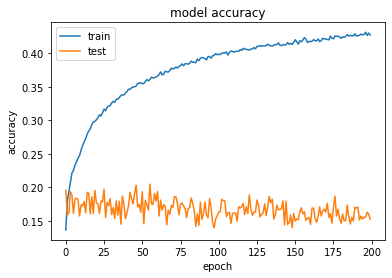

In [9]:
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()